In [4]:
from fish_helpers import *
import time
from functools import partial
from multiprocessing import Pool
import pylab as pl
from IPython import display
import tqdm.notebook as tqdm
import math
import random
import operator


0


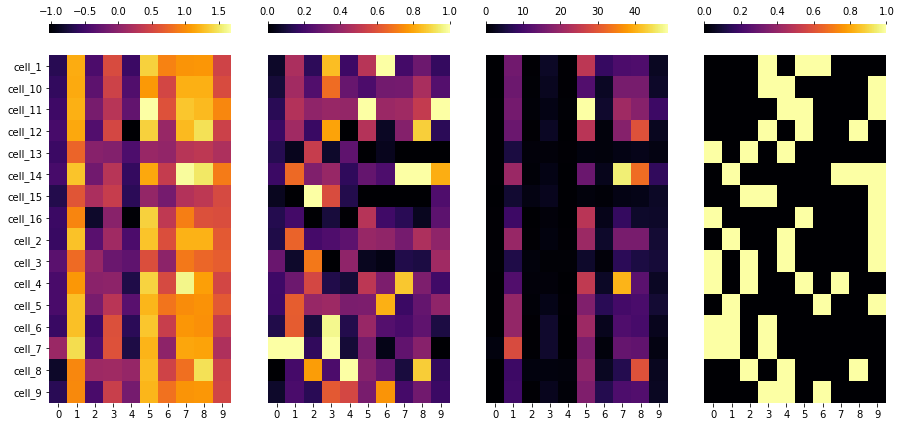

1


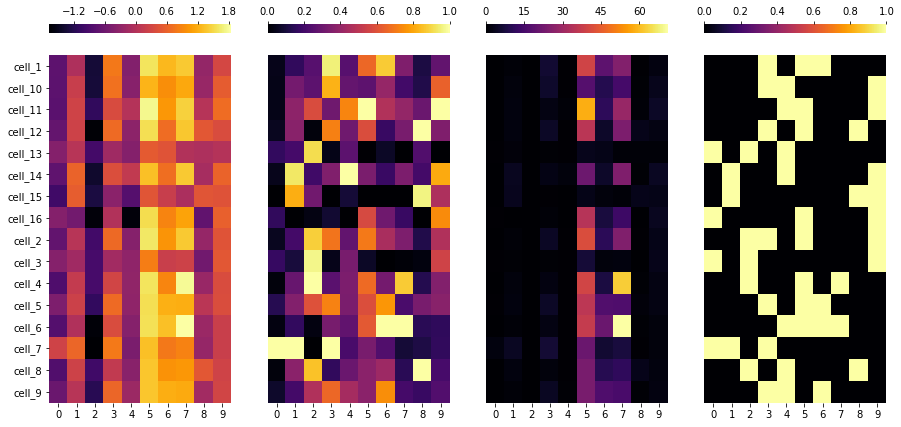

2


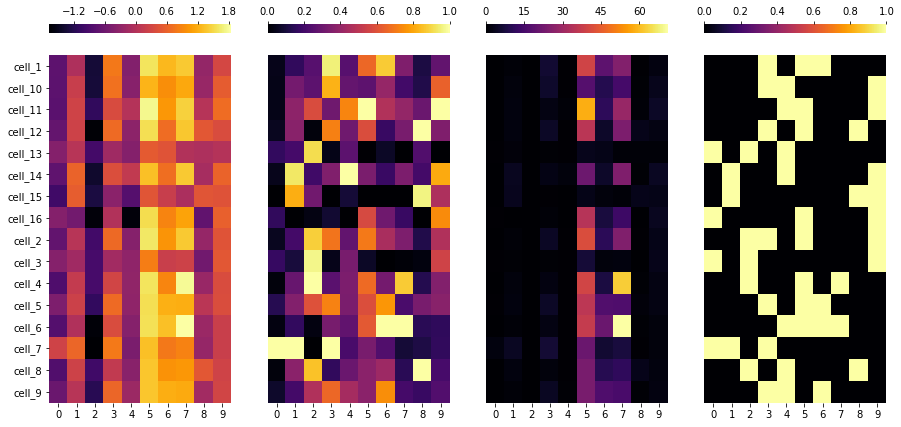

3


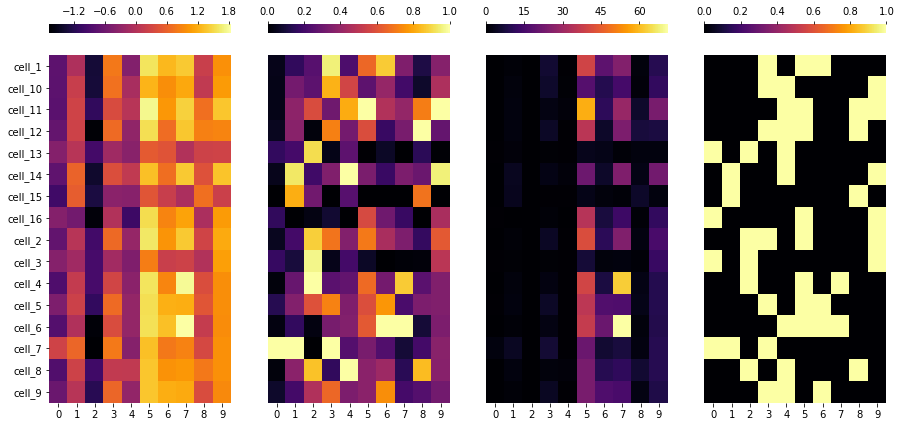

4


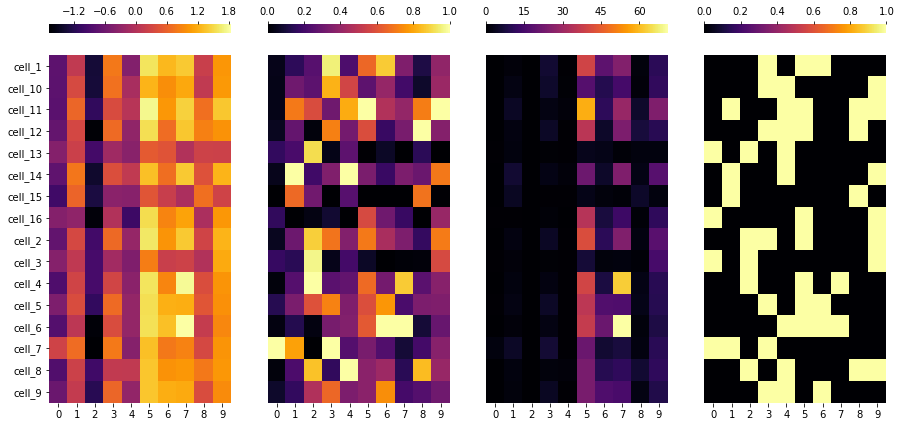

5


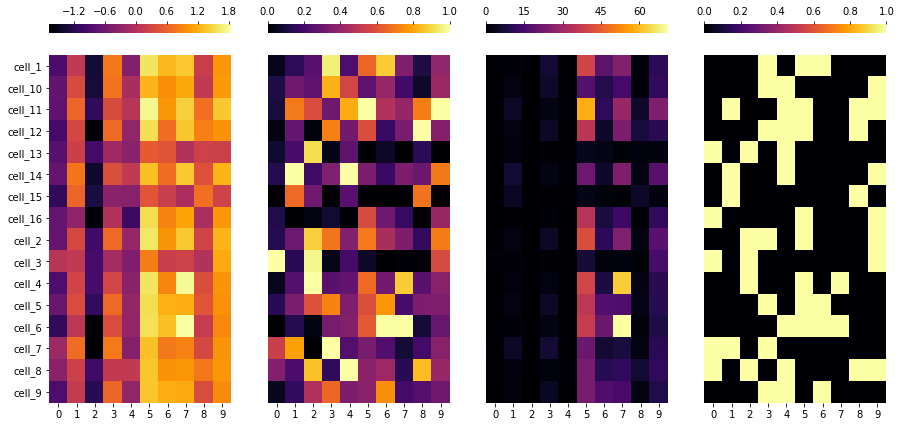

6


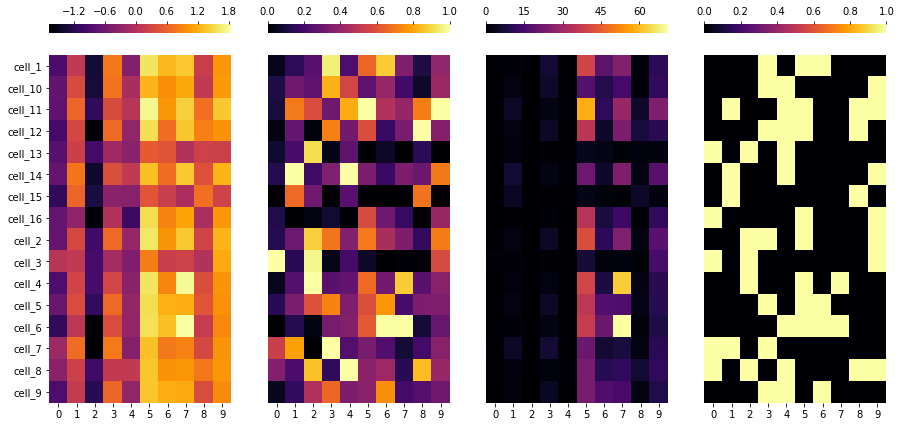

7


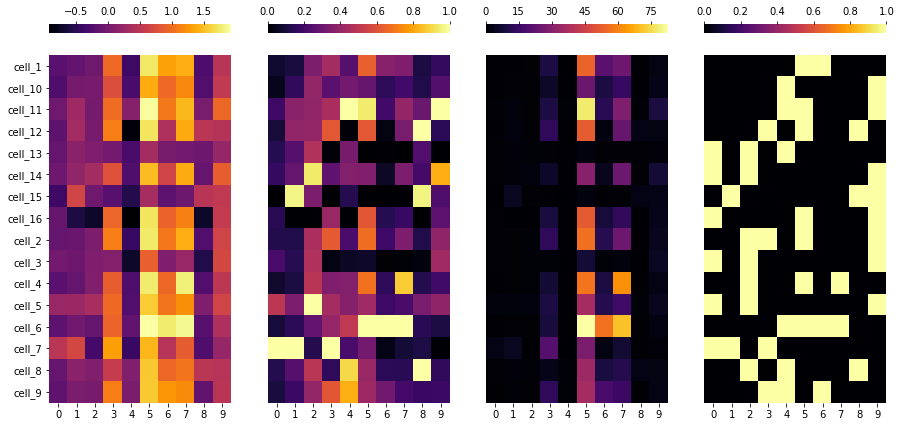

8


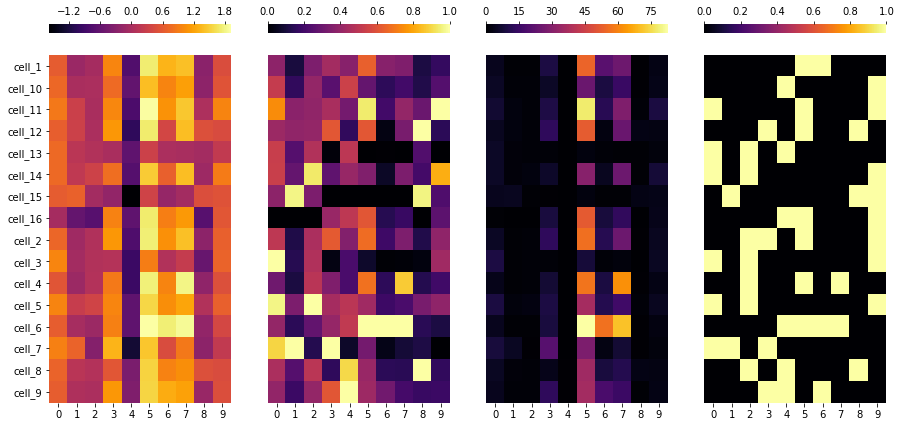

In [8]:
base = os.path.join(base_path,'Neuron_Results3')
for I in range(9):
    print(I)
    elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
    survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
    readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
    readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))

    Readout_df = readouts[0].drop(index='blank').copy()
    codebook_df = survivors[0].drop(index='blank').copy()
    norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
    norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
    fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
    ax1,ax2,ax3,ax4 = axes
    im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
    im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
    plt.show()

0


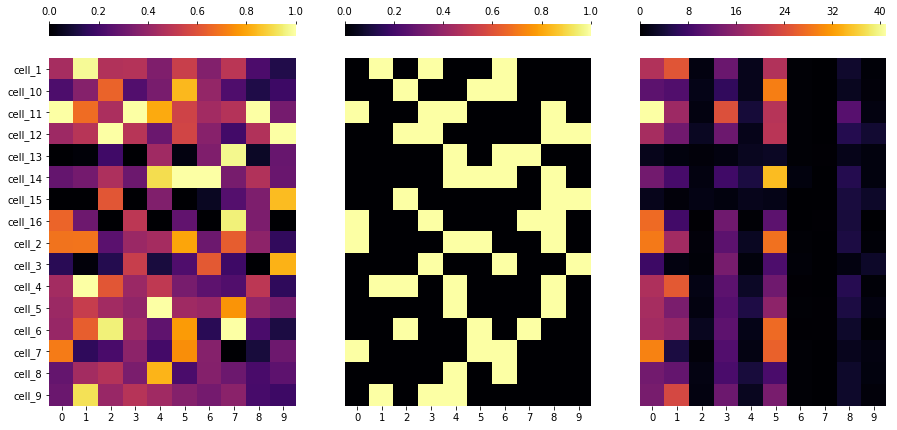

1


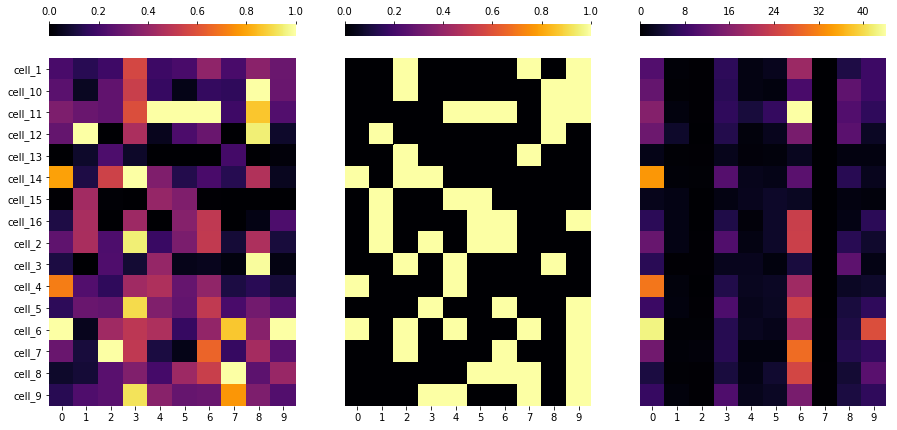

2


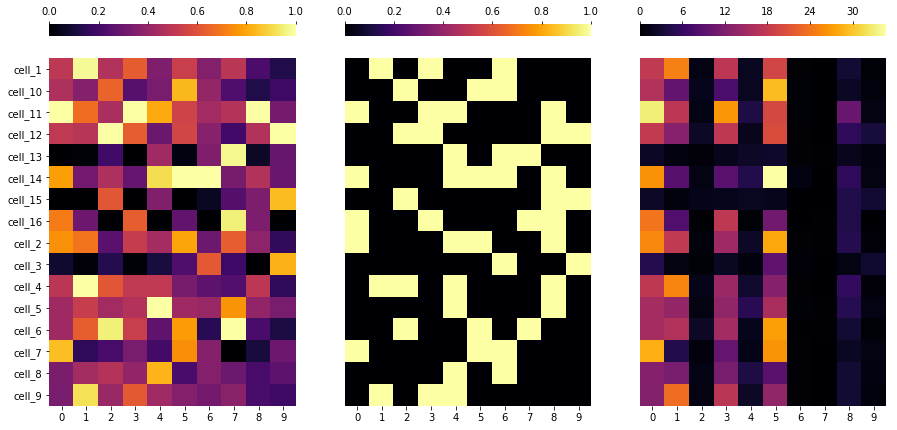

3


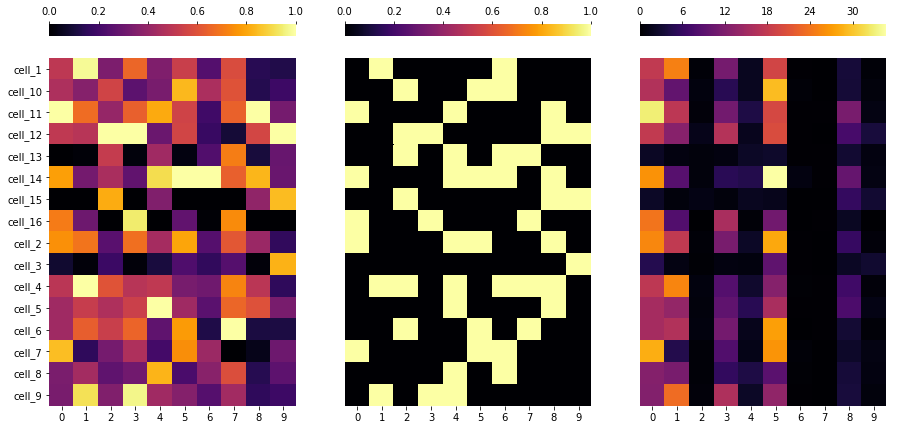

4


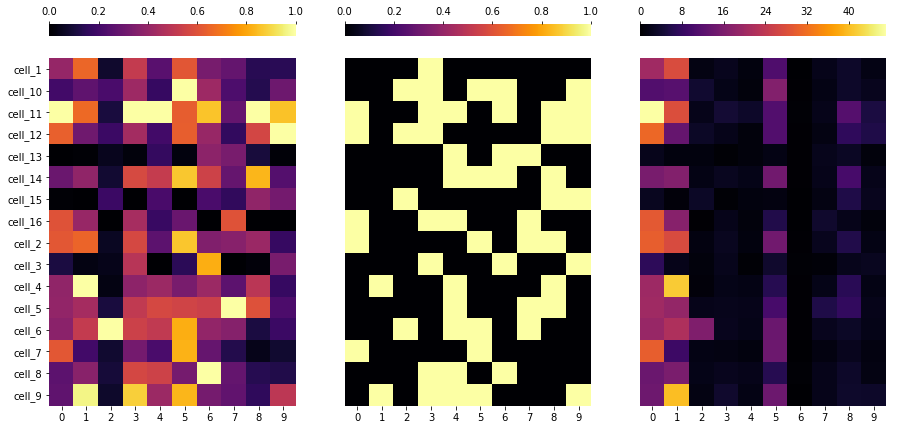

5


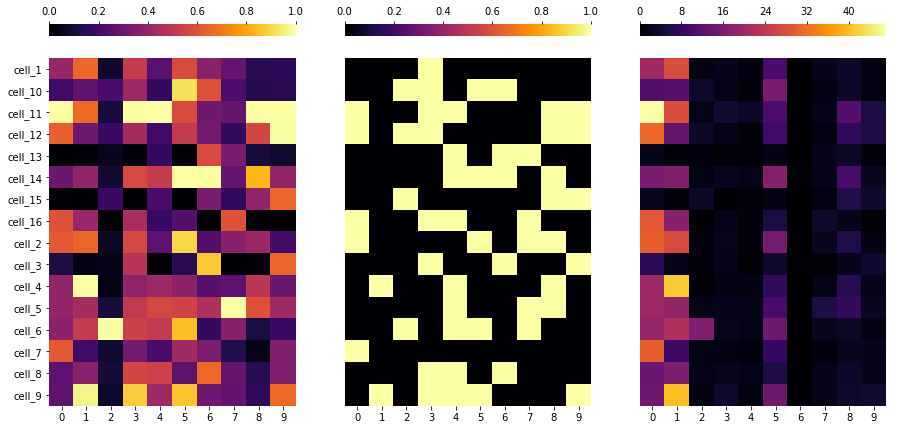

6


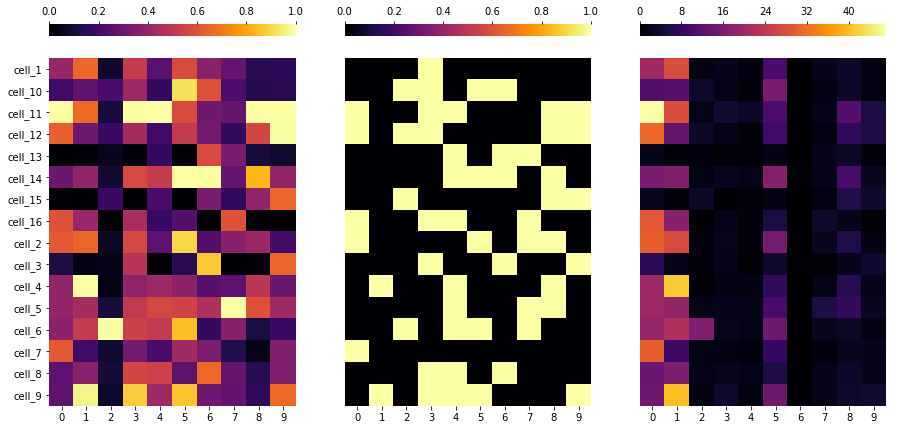

In [18]:
base = os.path.join(base_path,'Neuron_Results4')
for I in range(10):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[0].drop(index='blank').copy()
        codebook_df = survivors[0].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
        plt.show()
    except:
        break

In [19]:
Gene_Matrix_Avg = pickle.load(open(os.path.join(base_path,'Gene_Matrix_Avg_Neuron.pkl'),'rb'))
Gene_Matrix_std = pickle.load(open(os.path.join(base_path,'Gene_Matrix_std_Neuron.pkl'),'rb'))
Gene_Matrix_Avg.columns = ['cell_'+str(i) for i in Gene_Matrix_Avg.columns]
Gene_Matrix_std.columns = ['cell_'+str(i) for i in Gene_Matrix_std.columns]

In [48]:
for cell in Gene_Matrix_Avg.columns:
    pos_cells = [cell]
    neg_cells = [i for i in Gene_Matrix_Avg.columns if i not in pos_cells]
    signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index,columns=['Pos','Neg','Pos_std','Neg_std','Difference',
                                                                               'Fold','sq_sum_std','value'])
    if len(pos_cells)>1:
        signal_df['Pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
        signal_df['Pos_std'] = np.sum(Gene_Matrix_std[pos_cells],axis=1)
    else:
        signal_df['Pos'] = Gene_Matrix_Avg[pos_cells]
        signal_df['Pos_std'] = Gene_Matrix_std[pos_cells]

    signal_df['Neg'] = np.average(Gene_Matrix_Avg[neg_cells],axis=1)
    signal_df['Neg_std'] = np.sum(Gene_Matrix_std[neg_cells],axis=1)
    signal_df['Difference'] = signal_df['Pos']-signal_df['Neg']
    signal_df['Fold'] = signal_df['Pos']/signal_df['Neg']
    signal_df['sq_sum_std'] = np.sqrt(signal_df['Pos_std']+signal_df['Neg_std'])
    signal_df['value'] = signal_df['Difference']/signal_df['sq_sum_std']
    print(cell)
    print(len(signal_df[(signal_df['Pos']>0)]))
    print(len(signal_df[(signal_df['Fold']>2)]))
    print(len(signal_df[(signal_df['Difference']>0)]))
    print(len(signal_df[(signal_df['Pos']>0)&(signal_df['Fold']>1)&(signal_df['Difference']>1)]))
# signal_df.sort_values(by='value',ascending=False)

cell_1
3681
136
1399
22
cell_2
3654
273
1643
30
cell_3
3155
89
336
6
cell_4
3411
334
1395
49
cell_5
3499
1022
2492
18
cell_6
3214
299
1491
34
cell_7
3019
859
1772
54
cell_8
3101
488
1658
37
cell_9
3224
635
1722
19
cell_10
3657
249
1092
6
cell_11
3314
1605
2768
146
cell_12
2390
988
1674
71
cell_13
3473
89
368
1
cell_14
3159
812
1769
41
cell_15
1479
176
373
0
cell_16
1938
131
471
12


In [25]:
pos_cells

'cell_1'

In [21]:
MeA_Neurons_DGE_cluster_data = pd.read_csv(os.path.join(base_path,'MeA_Neurons_DGE_cluster_data.csv'))
index = list(MeA_Neurons_DGE_cluster_data['Unnamed: 0'])
MeA_Neurons_DGE_cluster_data.index = index
MeA_Neurons_DGE_cluster_data=MeA_Neurons_DGE_cluster_data.drop(columns=['Unnamed: 0'])
MeA_Neurons_DGE_cluster_data.head()

E40_GGATAGTCCAGA  E40_TAACGACATTCG  E40_CGTTCGTTCGAC  \
Npffr2                        0                 0                 0   
Ibsp                          0                 0                 0   
Tnmd                          0                 0                 0   
D830015G02Rik                 1                 0                 0   
Neurod1                       0                 0                 0   

               E40_CTGCAGTATTTT  E40_CCTATGGGGATA  E40_TAGCGATTCTTG  \
Npffr2                        0                 0                 0   
Ibsp                          0                 0                 0   
Tnmd                          0                 1                 0   
D830015G02Rik                 0                 0                 0   
Neurod1                       0                 0                 0   

               E40_AATGACGTATAG  E40_AGTATCTTTATT  E40_GCTAGAACTTCG  \
Npffr2                        0                 0                 0   
Ibsp                          0                 0                 2   
Tnmd                          1                 0                 0   
D830015G02Rik                 0                 0                 0   
Neurod1                       0                 0                 0   

               E40_CTGCACGACACA        ...         E51_ACGGGCAGGTCA  \
Npffr2                        0        ...                        0   
Ibsp                          0        ...                        0   
Tnmd                          0        ...                        0   
D830015G02Rik                 0        ...                        0   
Neurod1                       0        ...                        0   

               E51_ATTGACCCTCGA  E51_TGCAATCATTTA  E51_TGAAGCGGGCCA  \
Npffr2                        0                 0                 0   
Ibsp                          0                 0                 0   
Tnmd                          0                 0                 0   
D830015G02Rik                 0                 0                 0   
Neurod1                       0                 0                 0   

               E51_GGAGTCGCCTAG  E51_AGATCTCACCTG  E51_GCGGTCGCGTTA  \
Npffr2                        0                 0                 1   
Ibsp                          0                 0                 0   
Tnmd                          0                 0                 0   
D830015G02Rik                 0                 0                 0   
Neurod1                       0                 0                 0   

               E51_GTCTTTGCGAGT  E51_CATGAAGATGCC  E51_CGATCGAGATAA  
Npffr2                        0                 0                 0  
Ibsp                          0                 0                 0  
Tnmd                          0                 0                 0  
D830015G02Rik                 0                 0                 0  
Neurod1                       0                 0                 0  

[5 rows x 10123 columns]

0


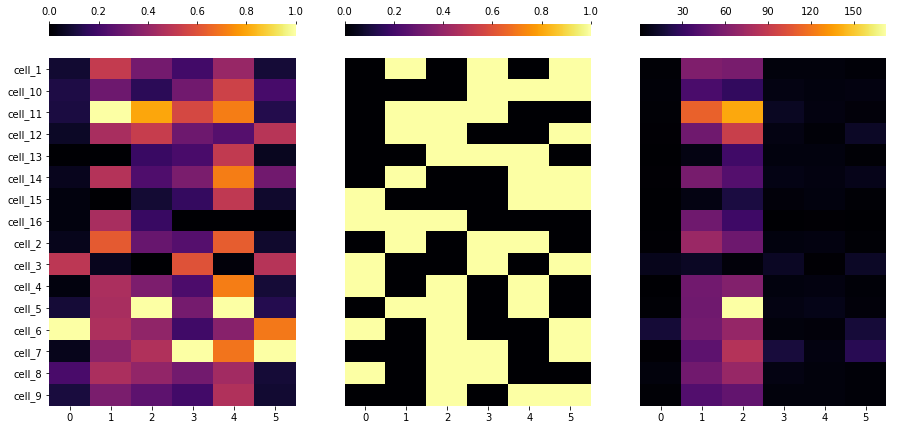

1


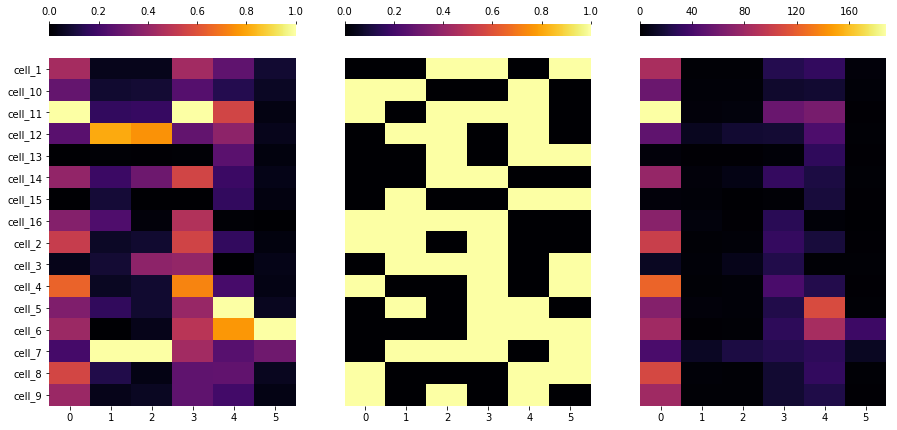

2


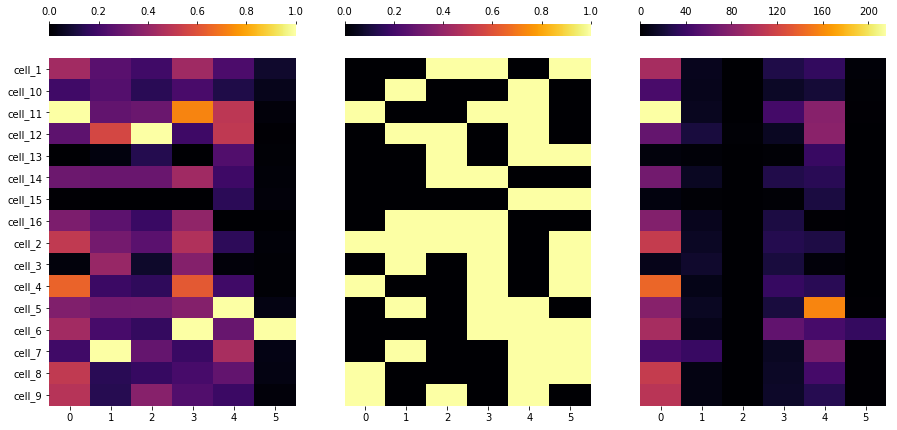

3


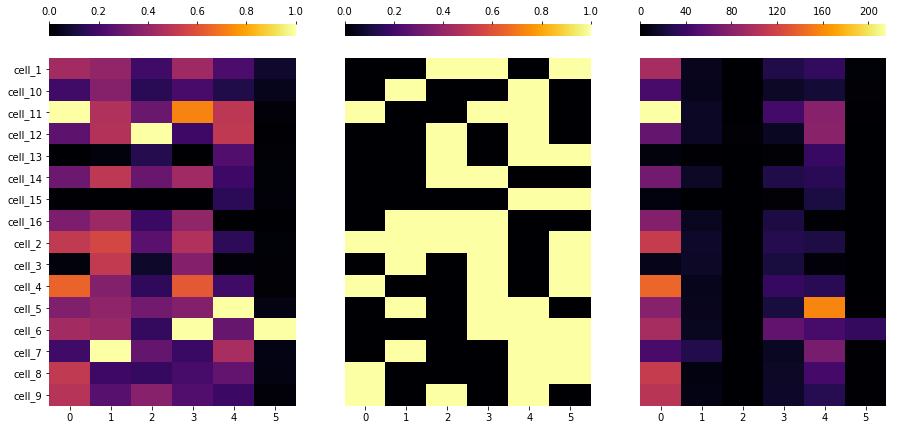

4


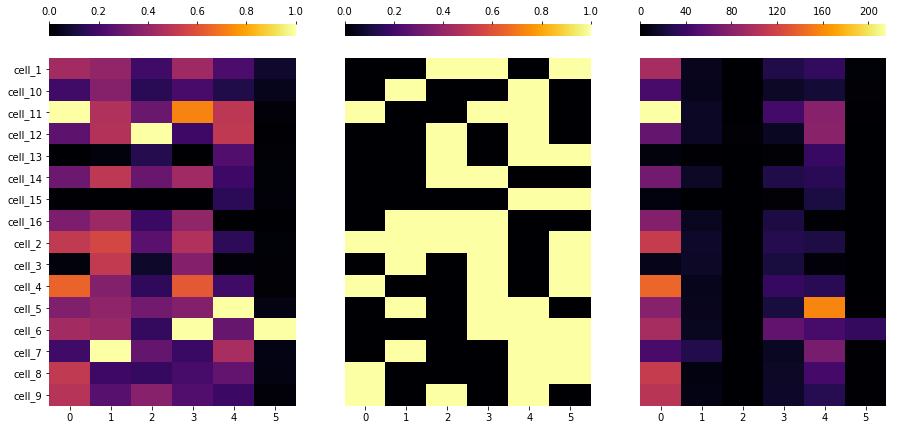

5


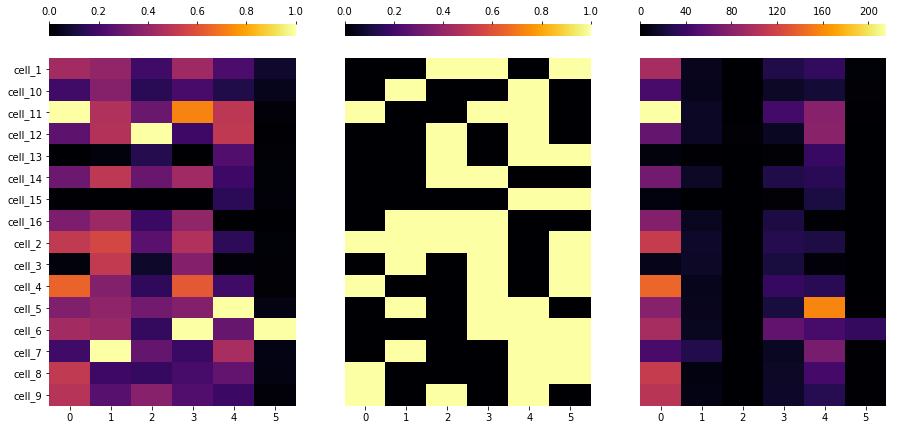

6


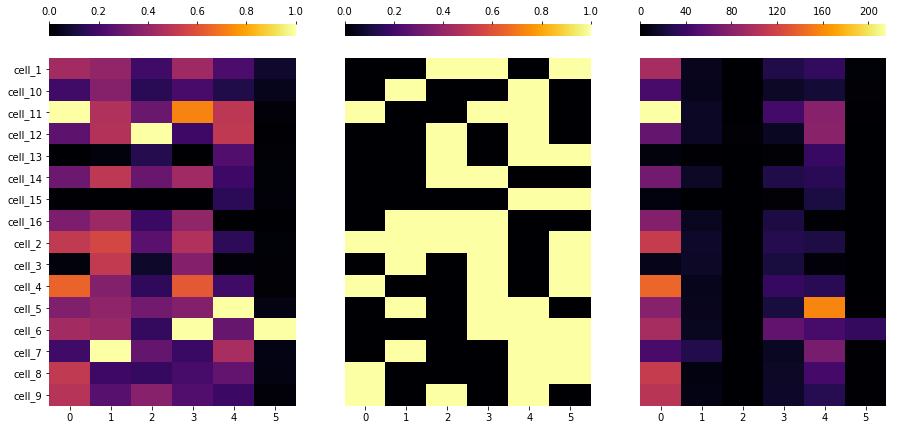

7


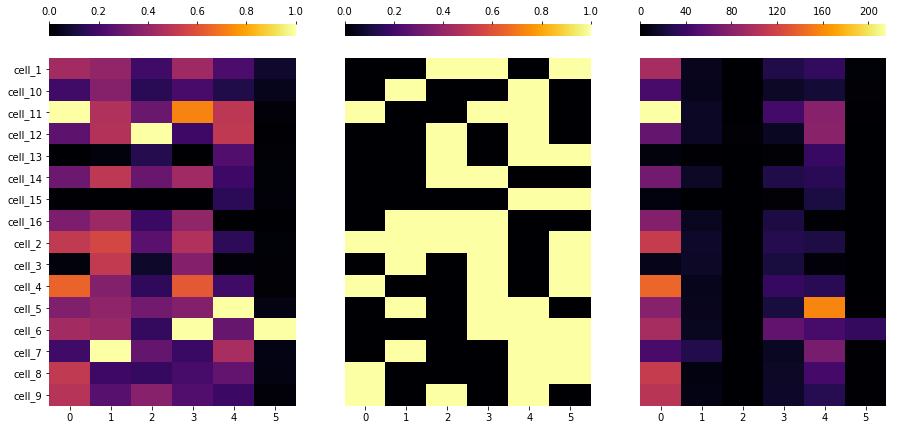

8


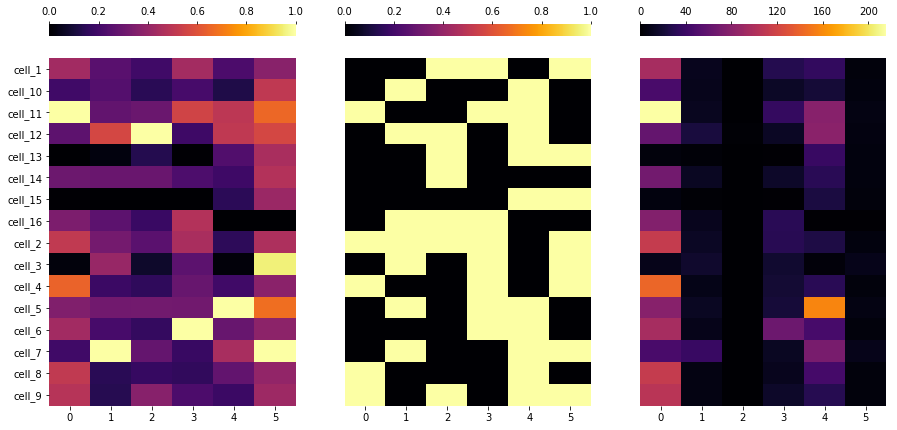

9


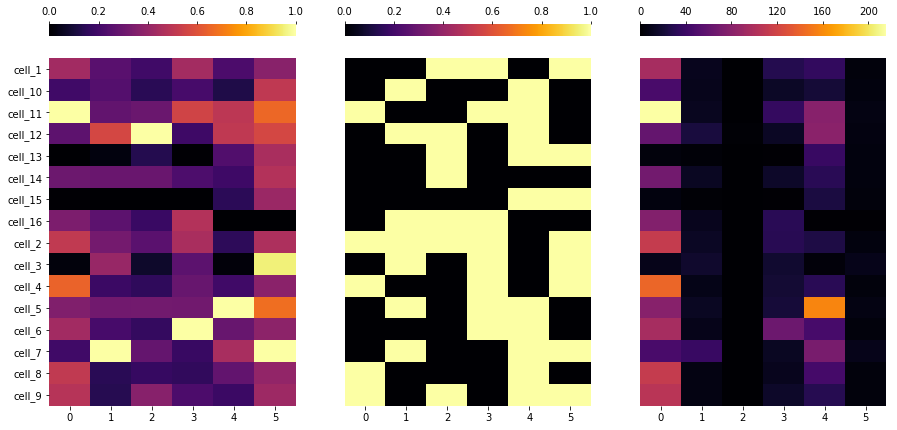

10


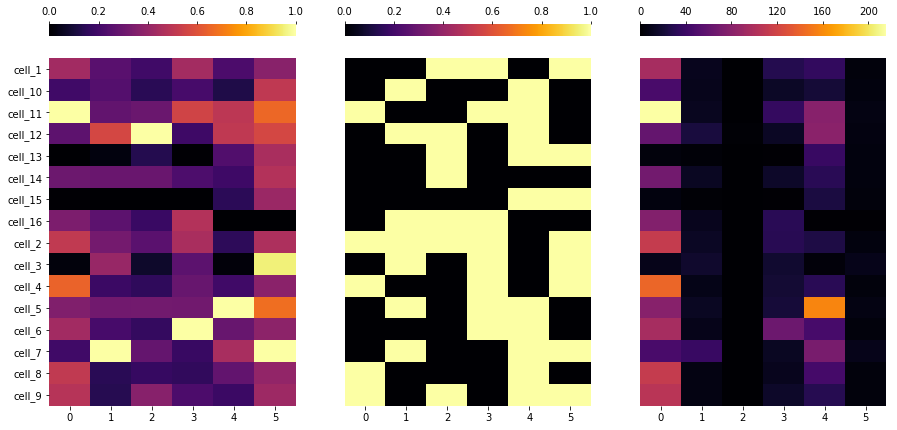

11


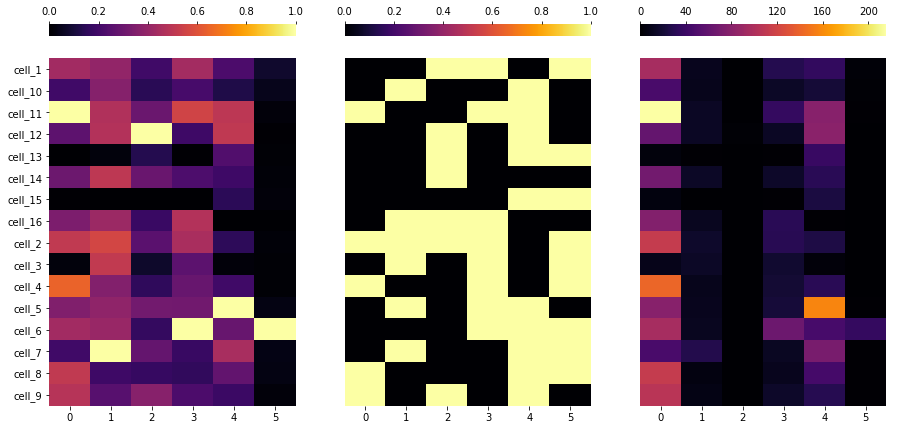

12


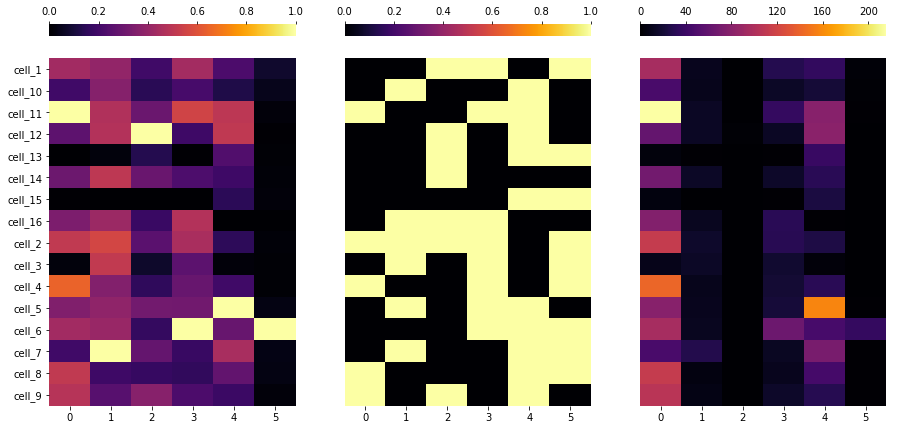

In [52]:
base = os.path.join(base_path,'Neuron_Results_avg')
for I in range(20):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[0].drop(index='blank').copy()
        codebook_df = survivors[0].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)
        plt.show()
    except:
        break

0


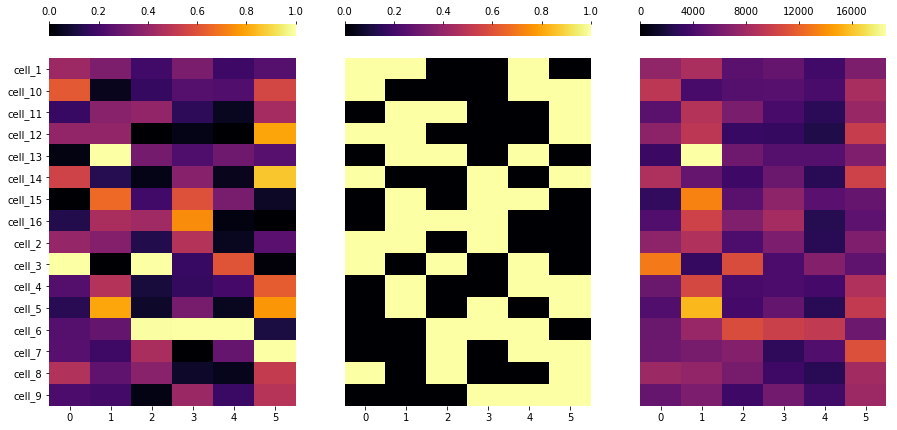

1


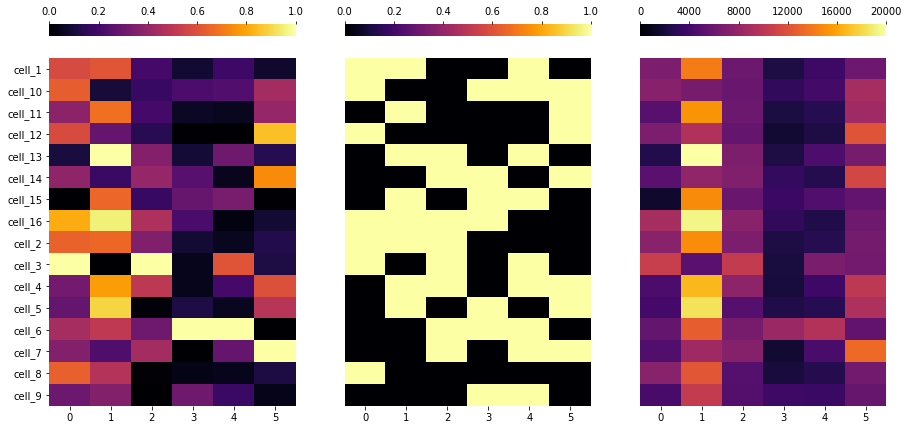

2


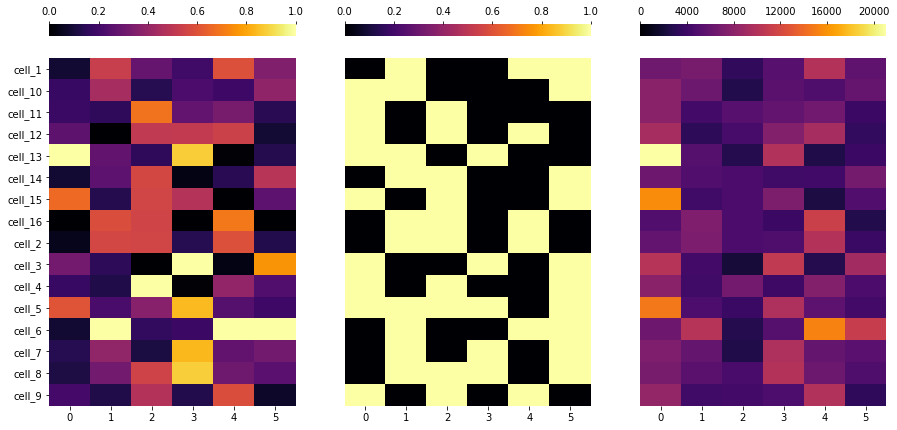

3


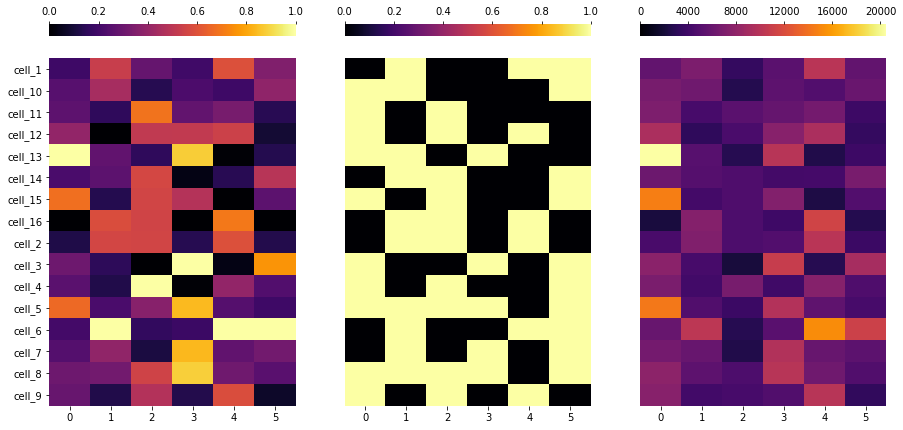

4


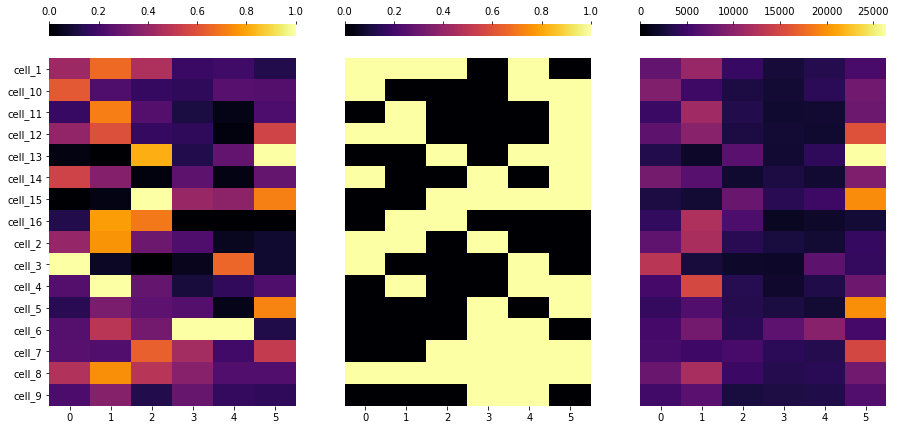

5


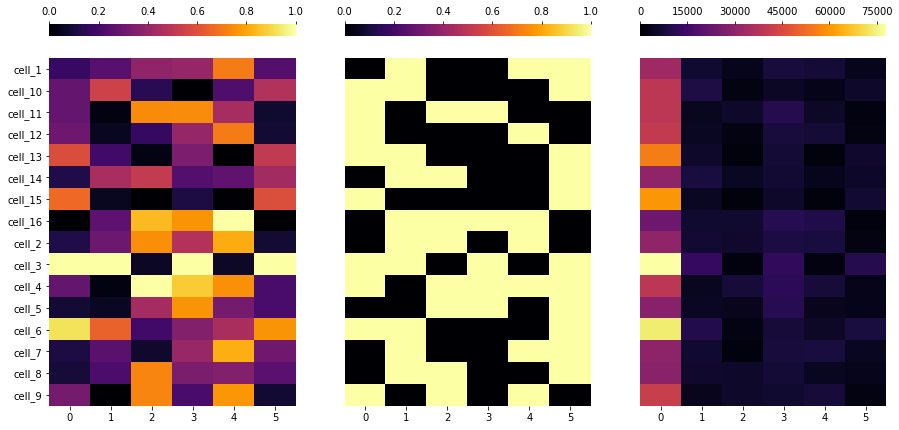

6


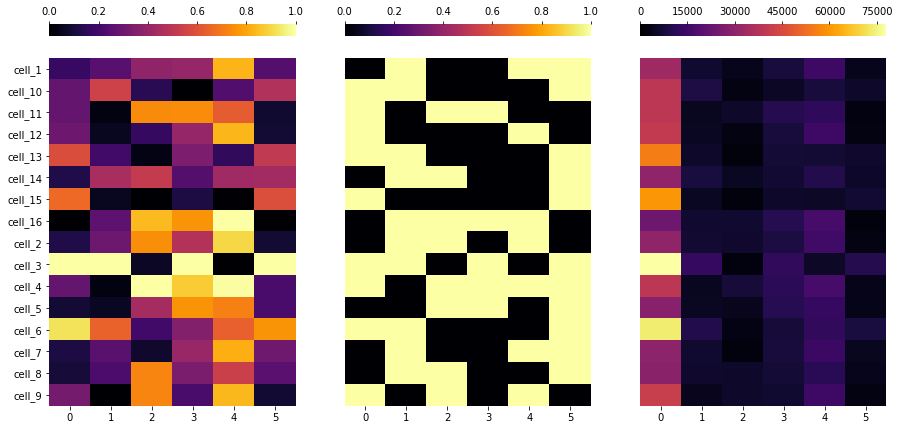

7


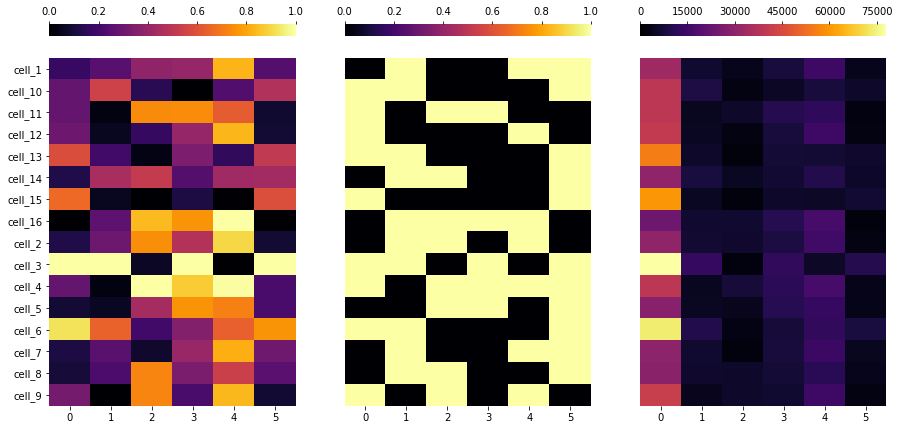

8


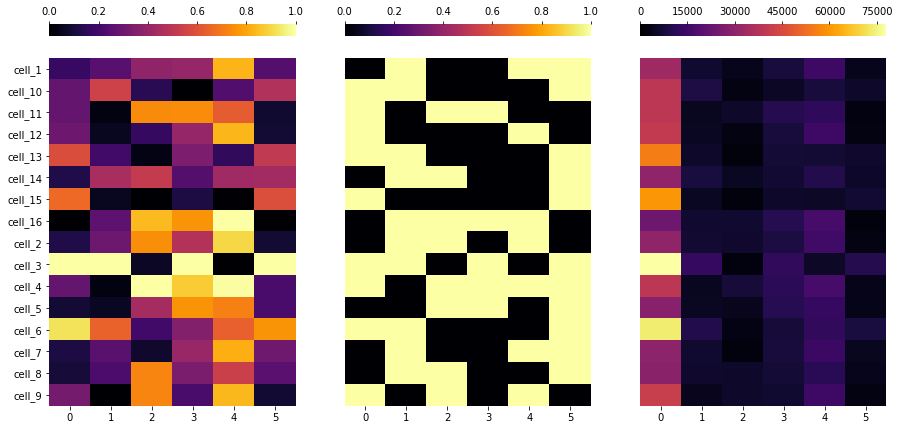

9


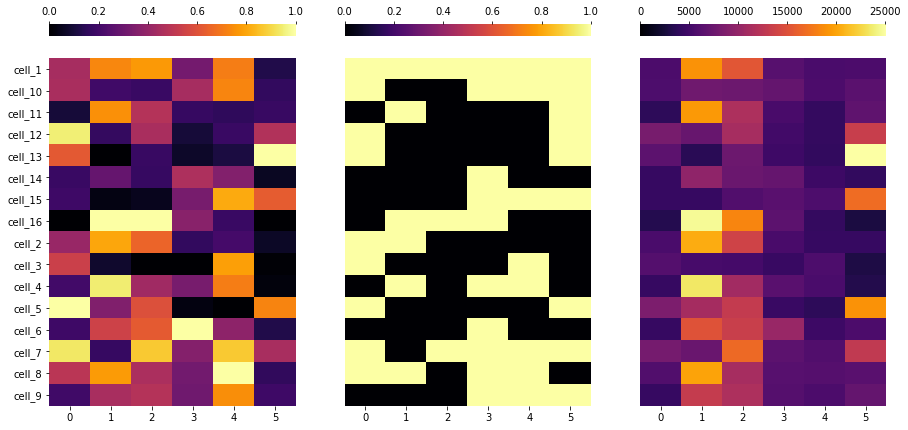

10


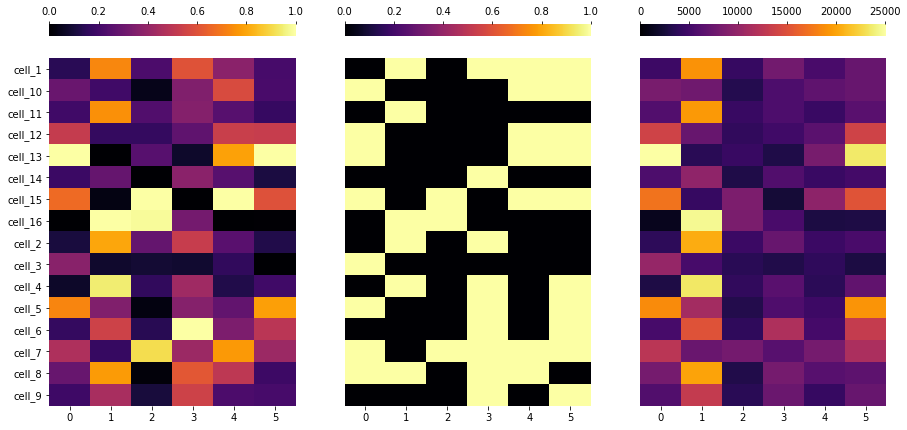

11


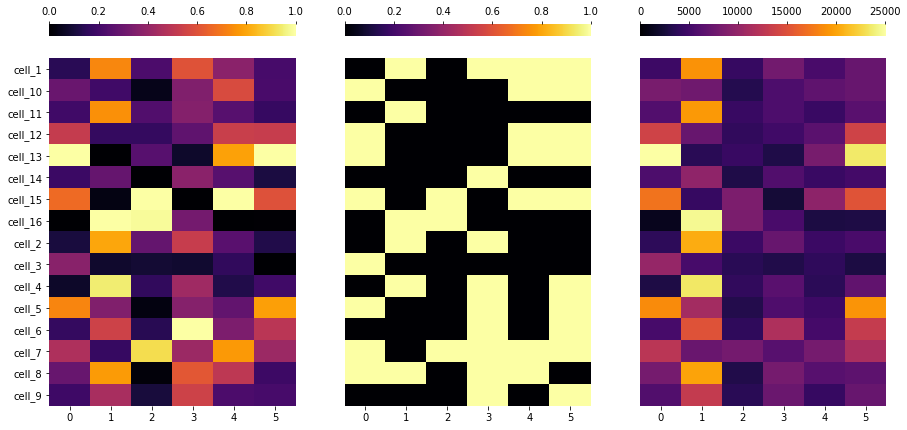

12


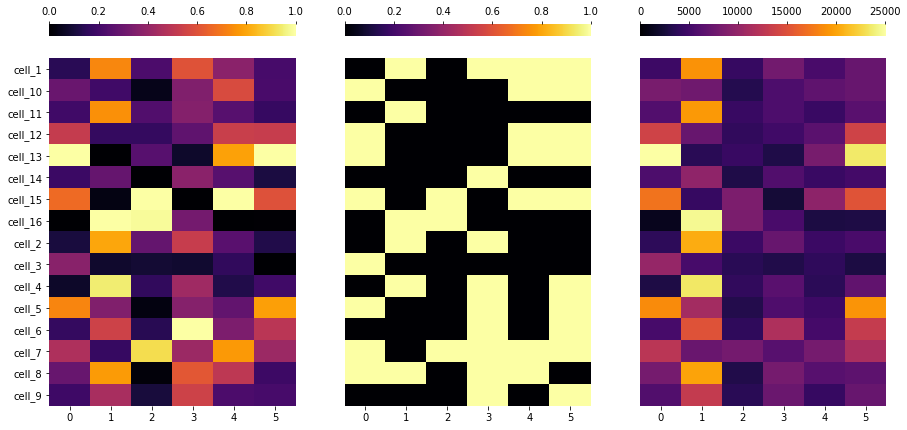

13


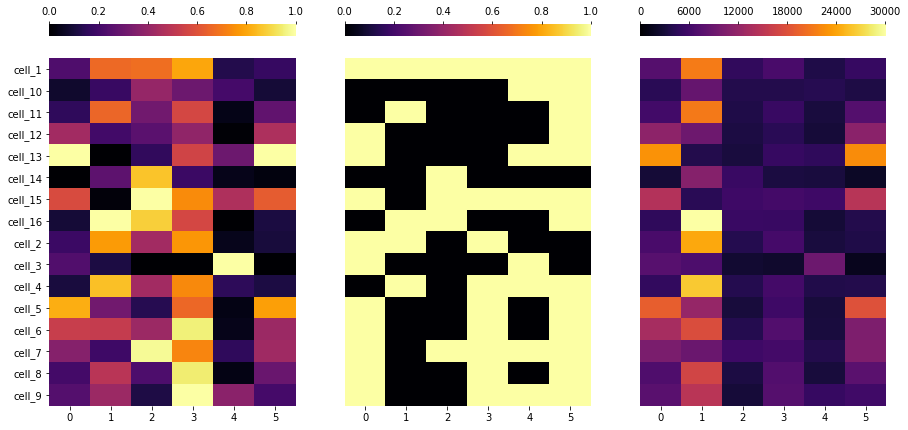

14


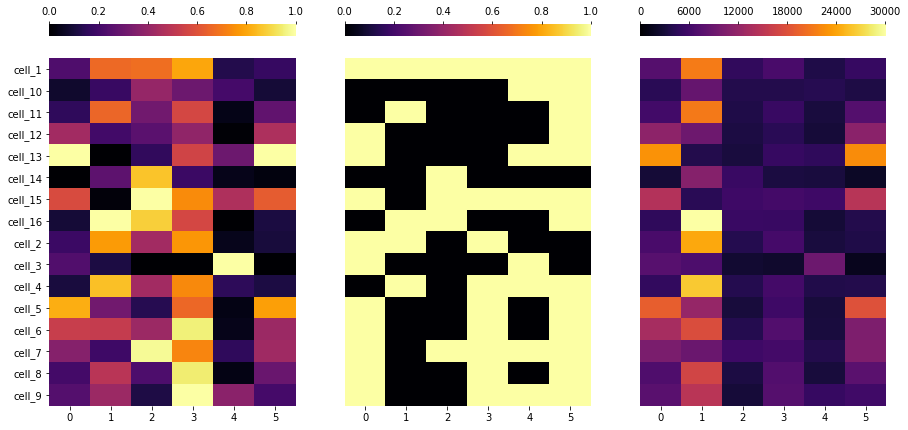

15


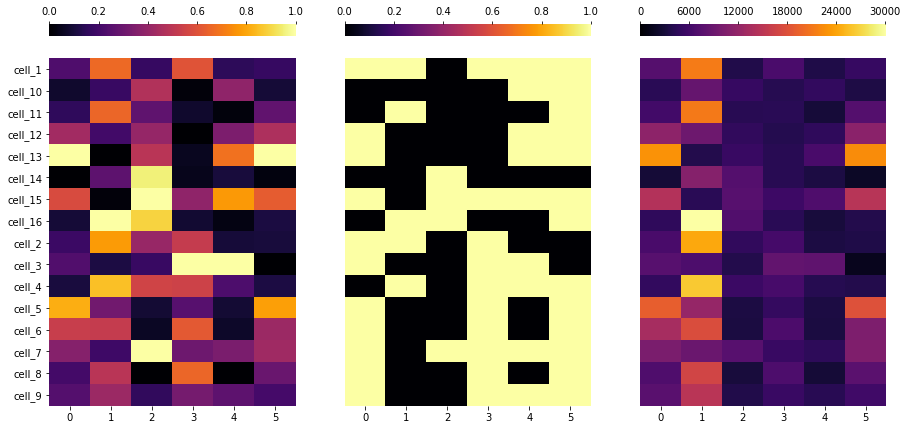

16


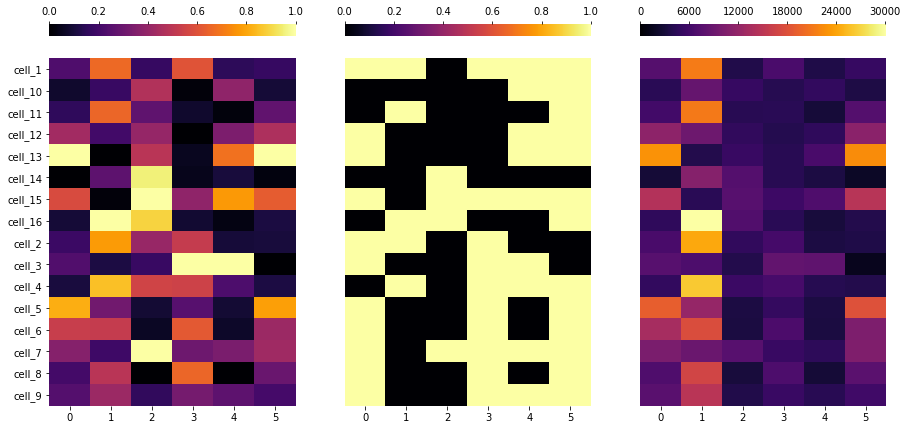

17


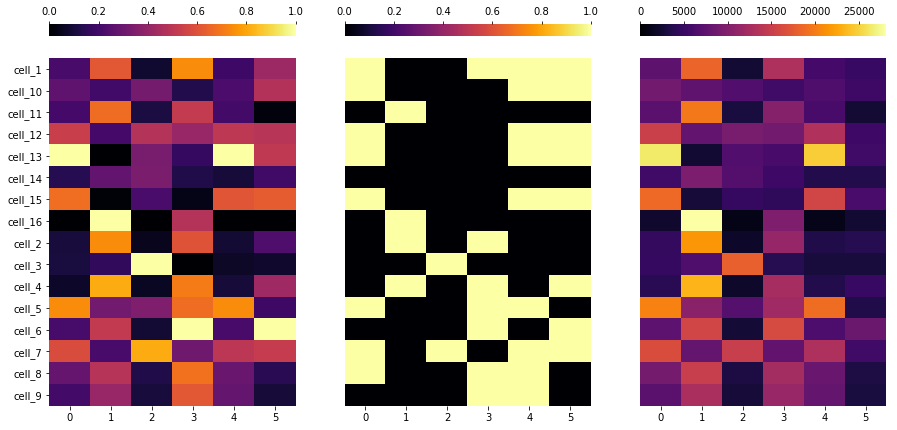

18


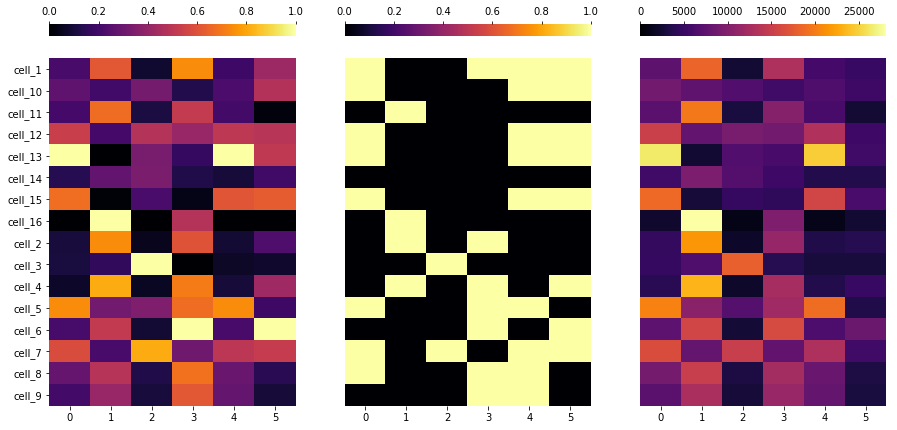

19


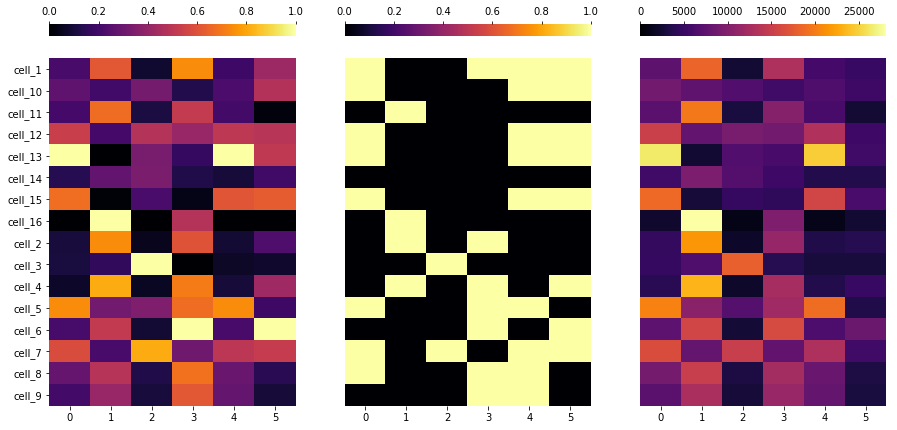

20


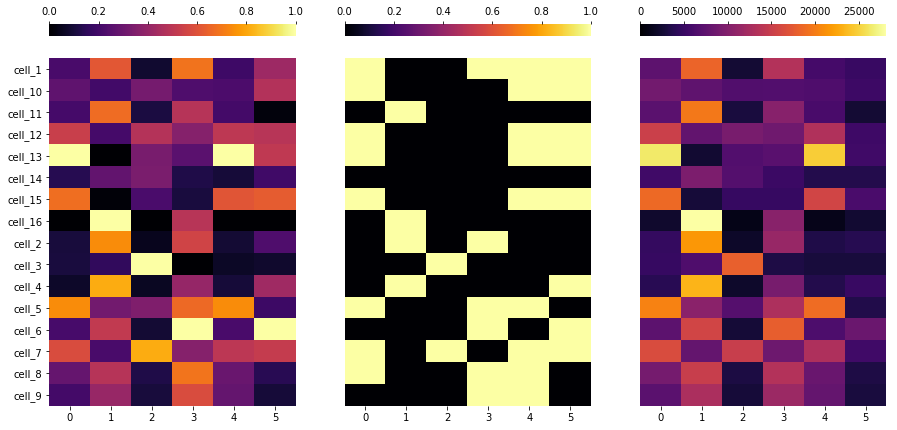

21


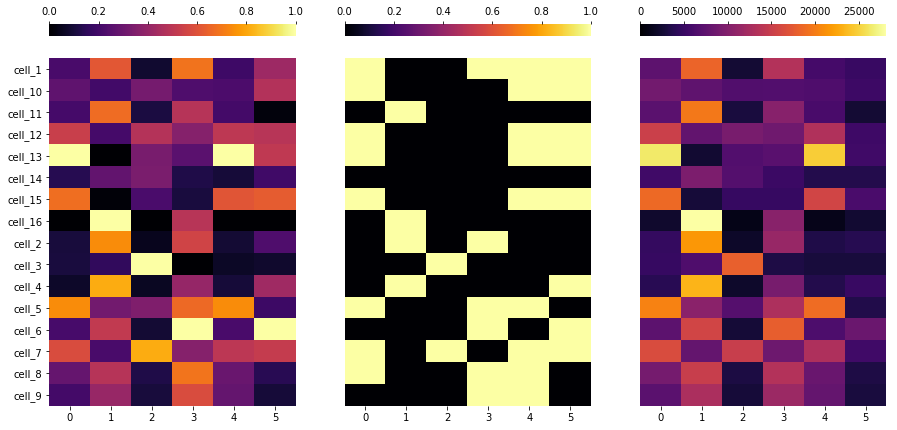

22


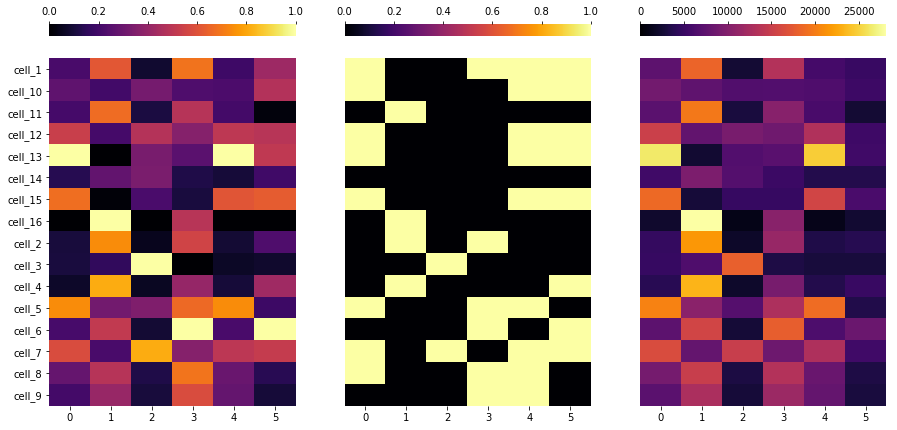

23


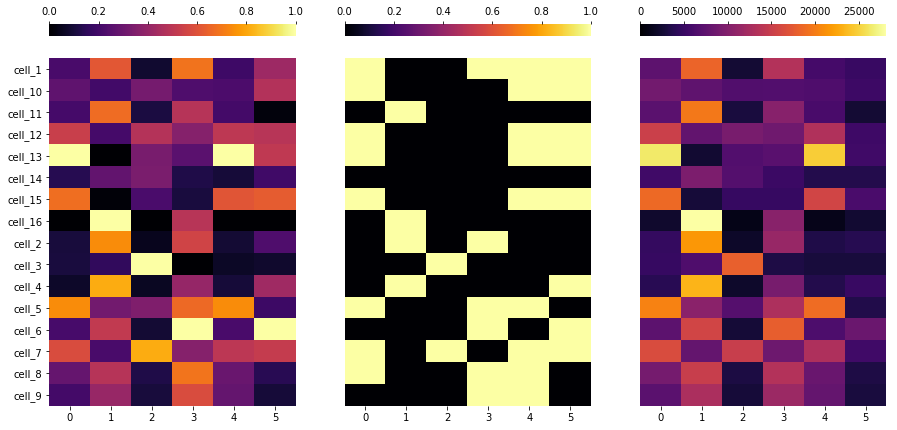

24


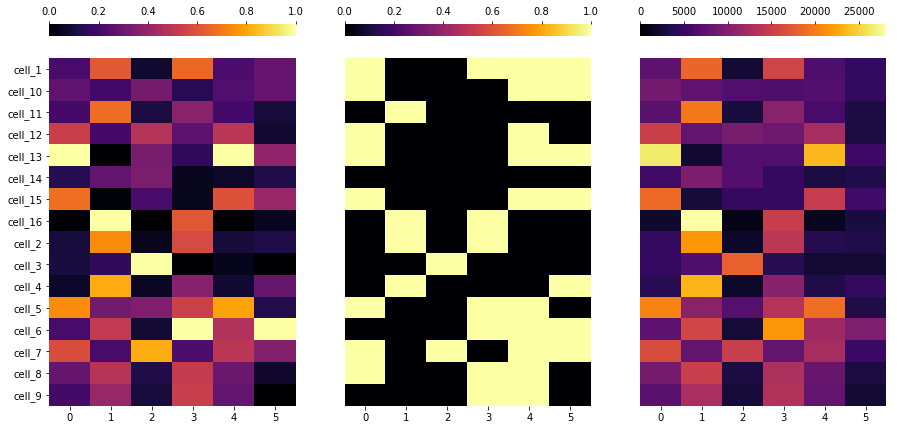

25


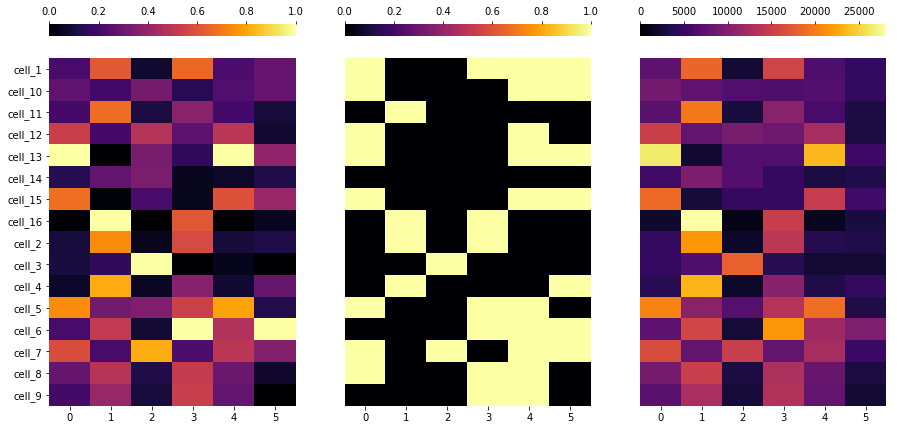

26


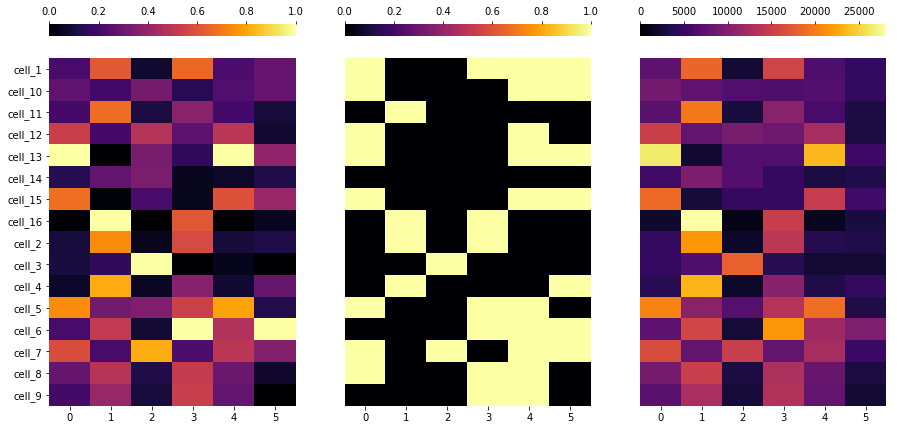

27


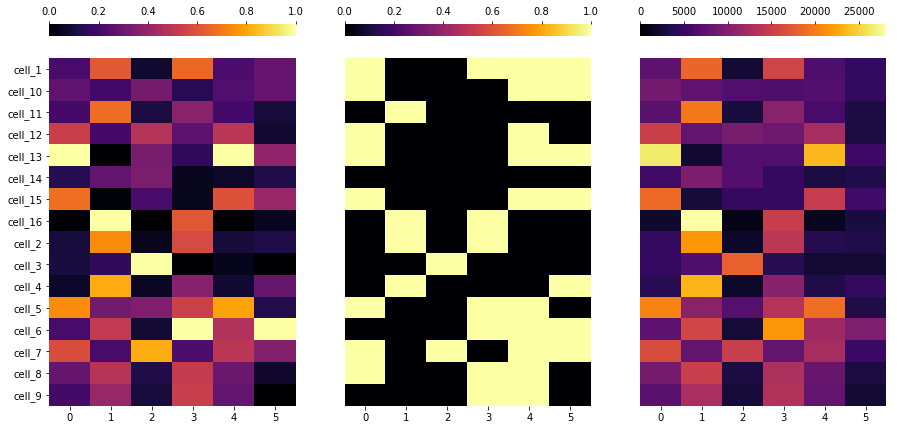

28


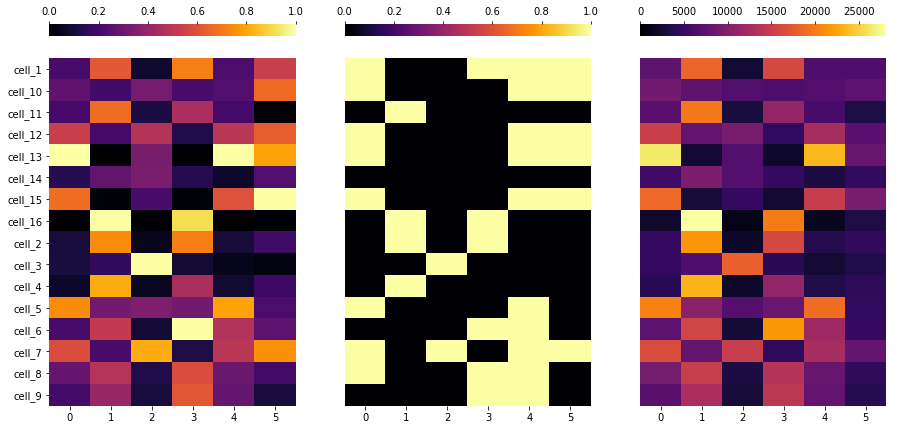

29


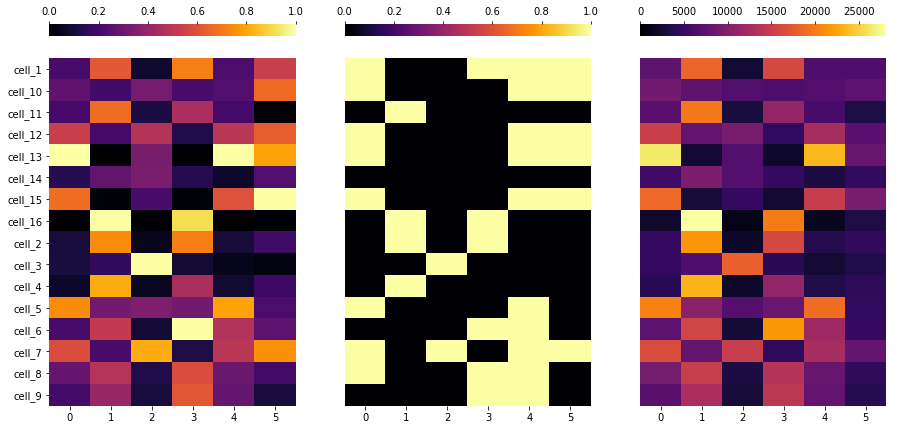

30


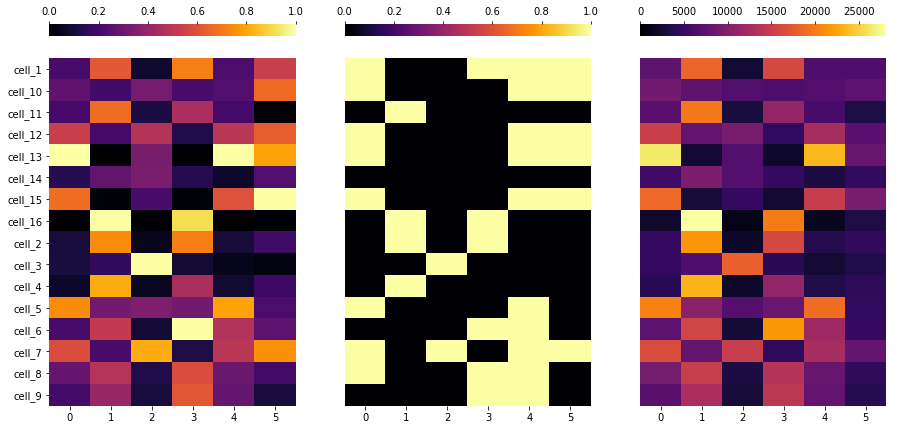

31


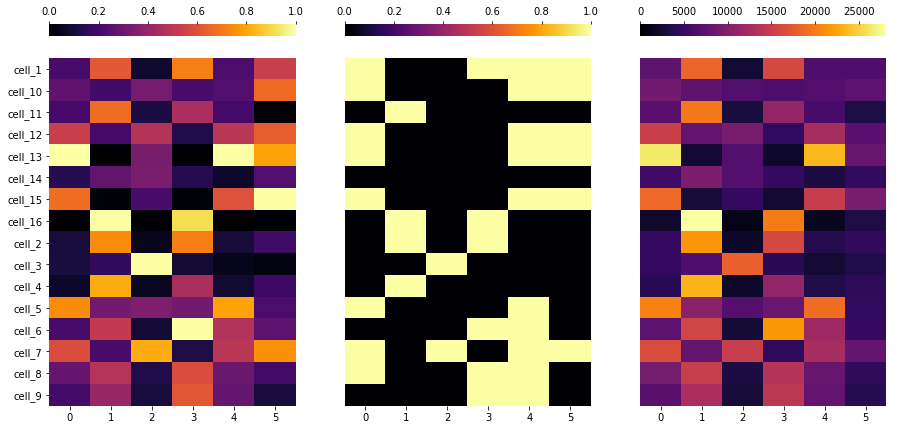

32


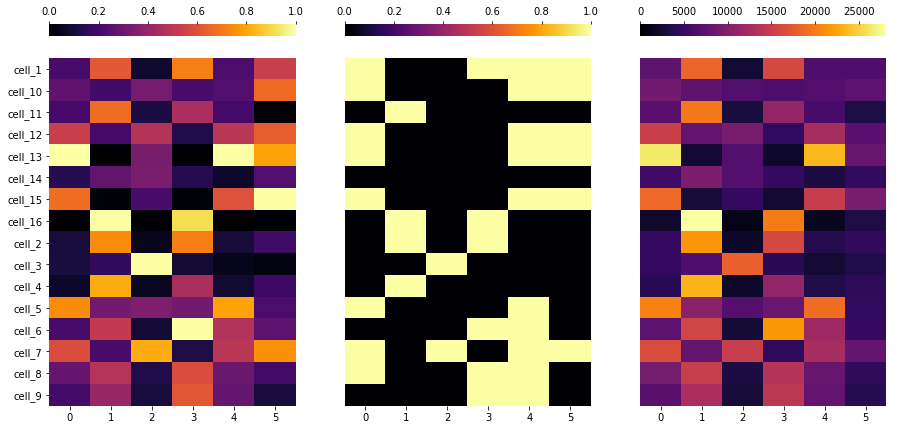

33


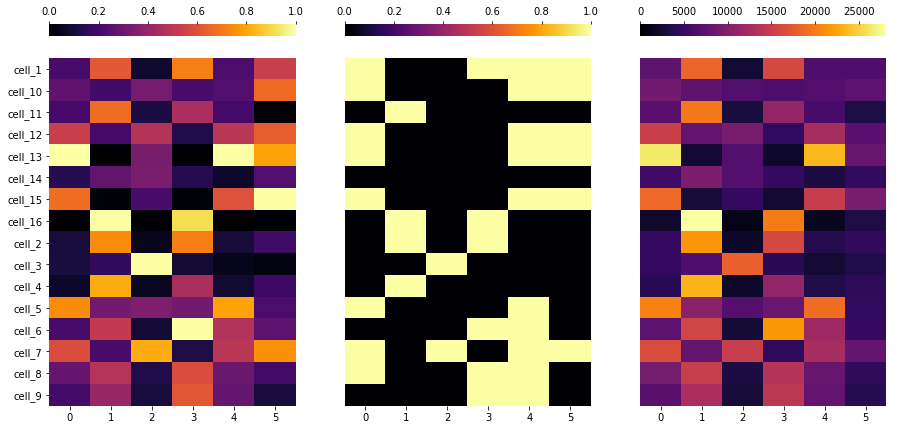

34


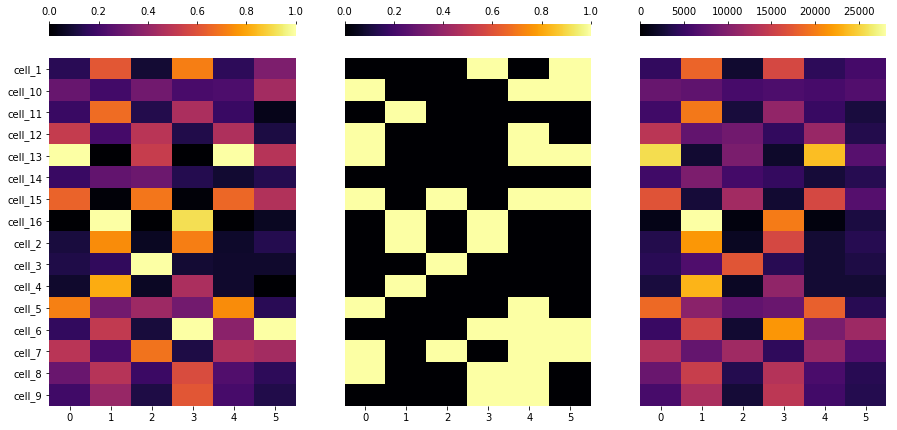

35


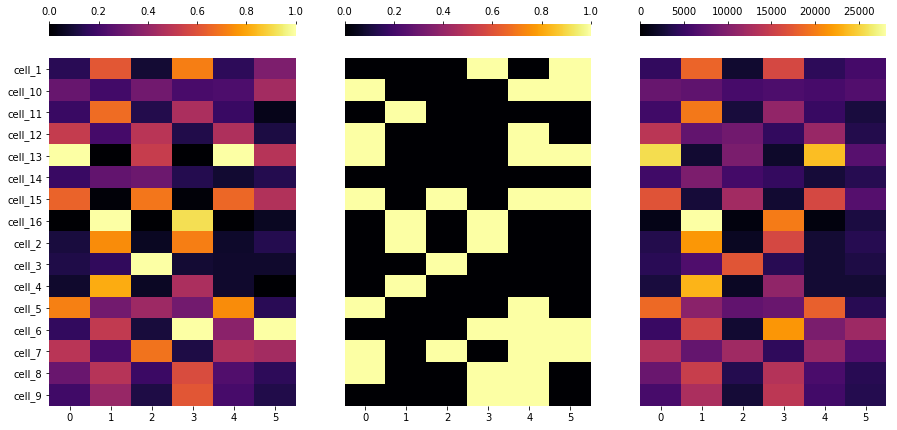

36


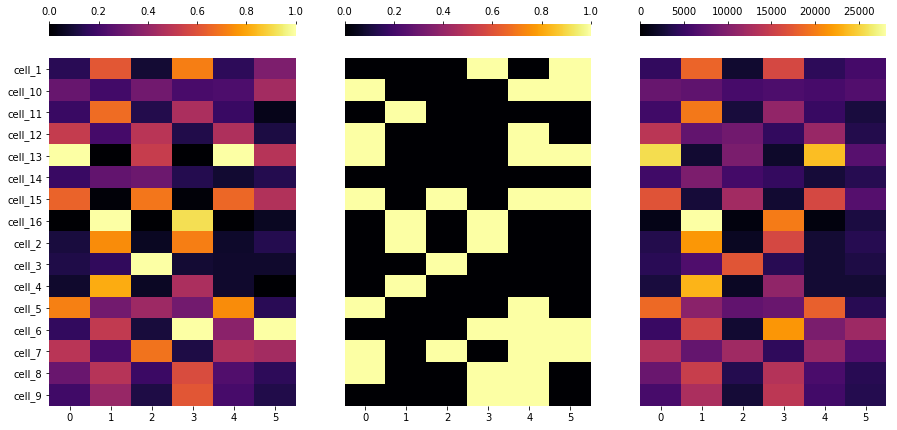

37


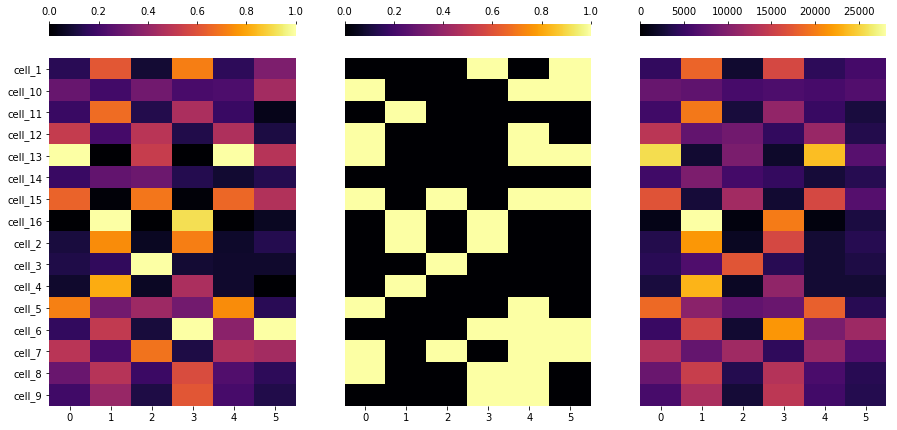

38


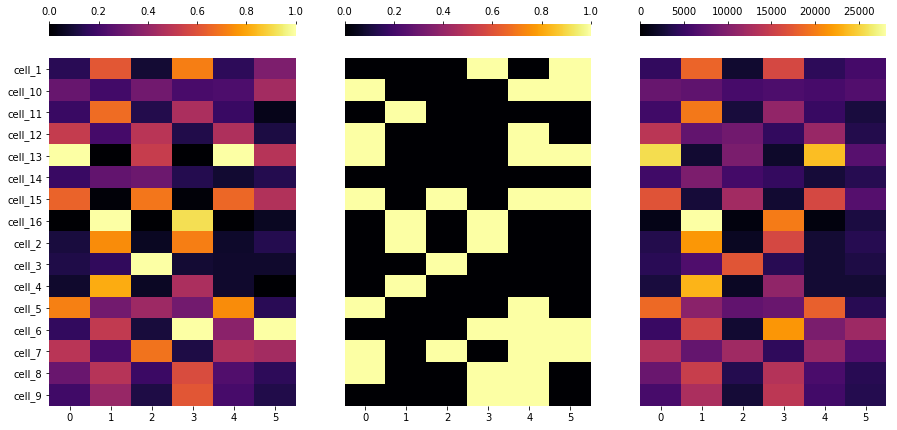

39


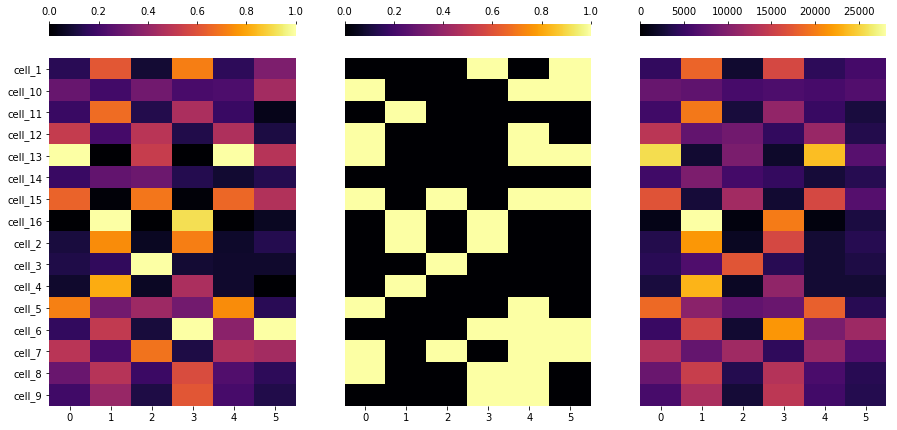

40


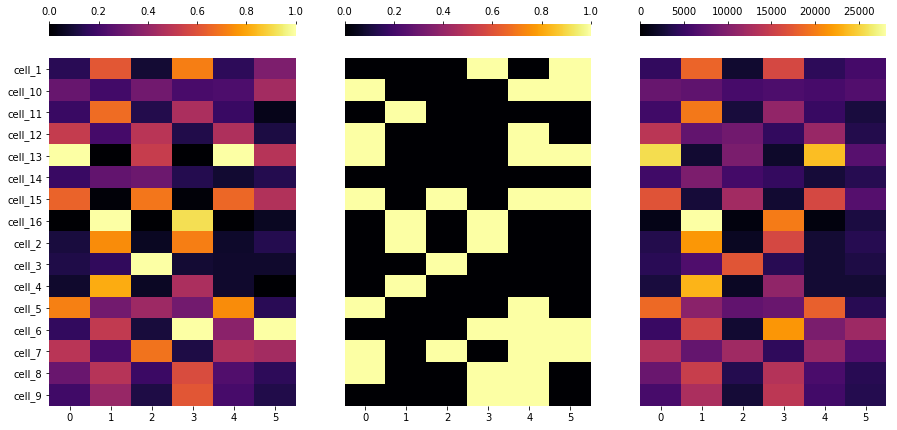

41


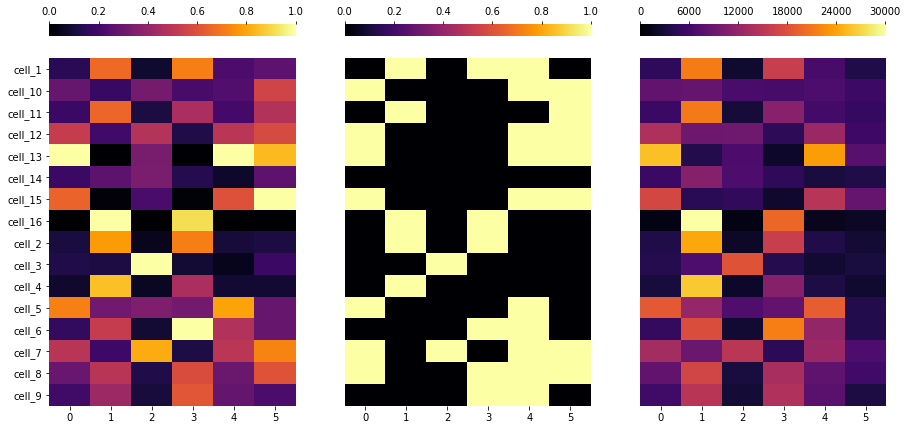

42


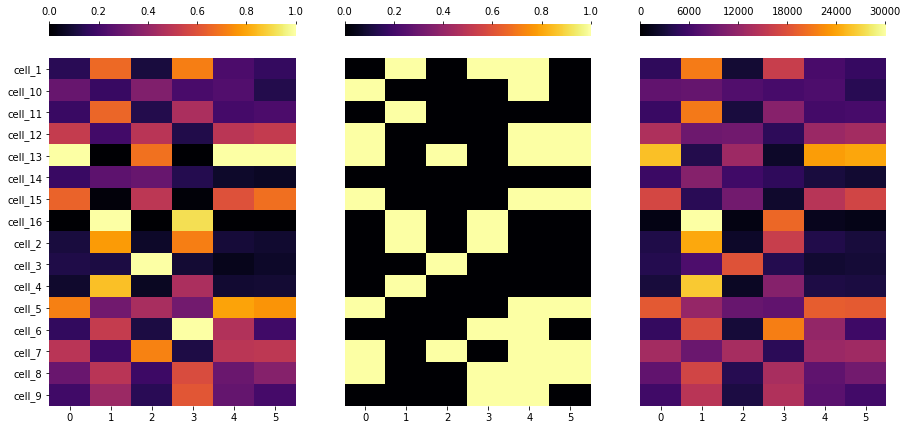

43


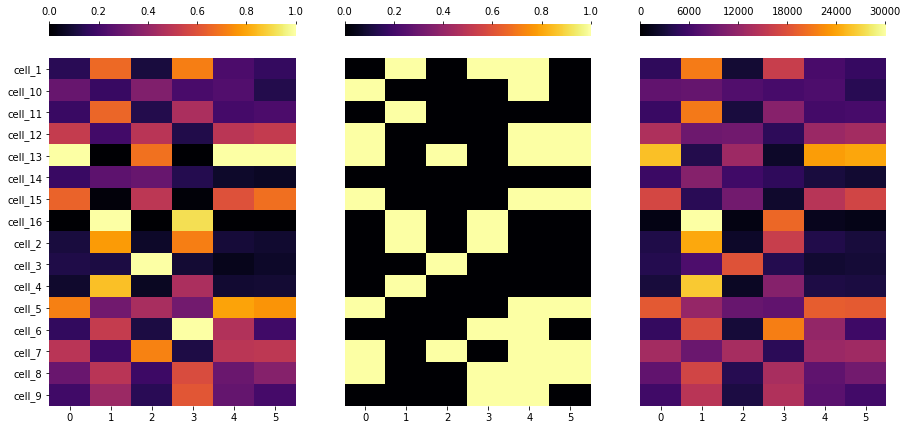

44


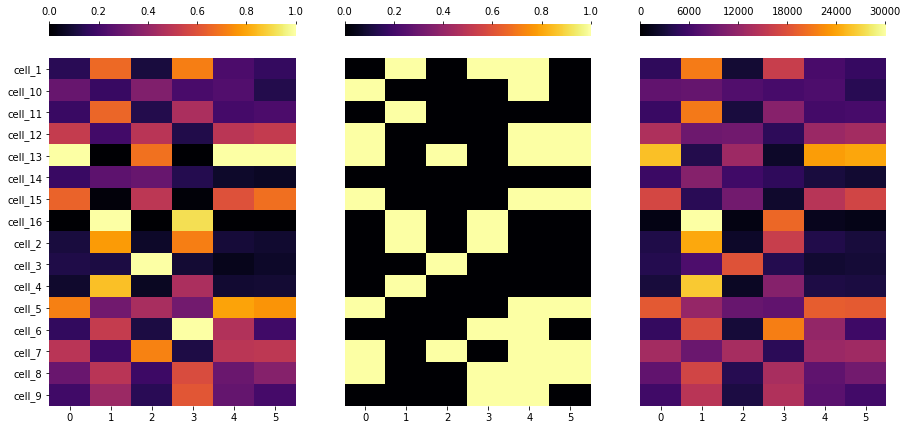

45


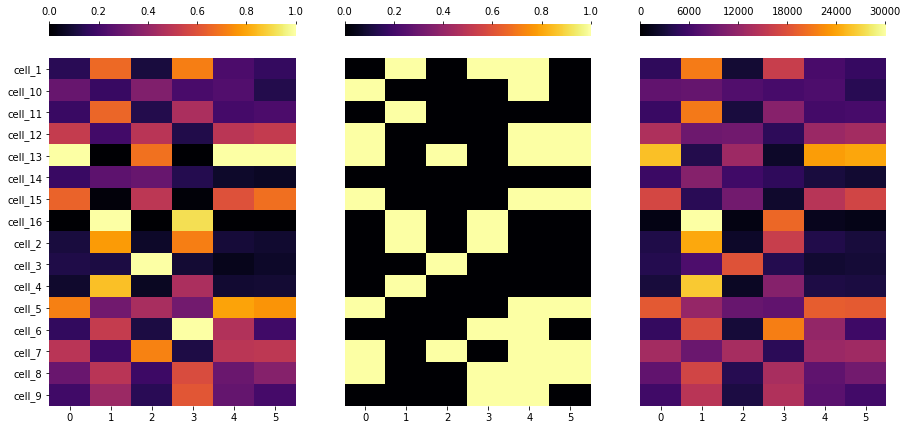

46


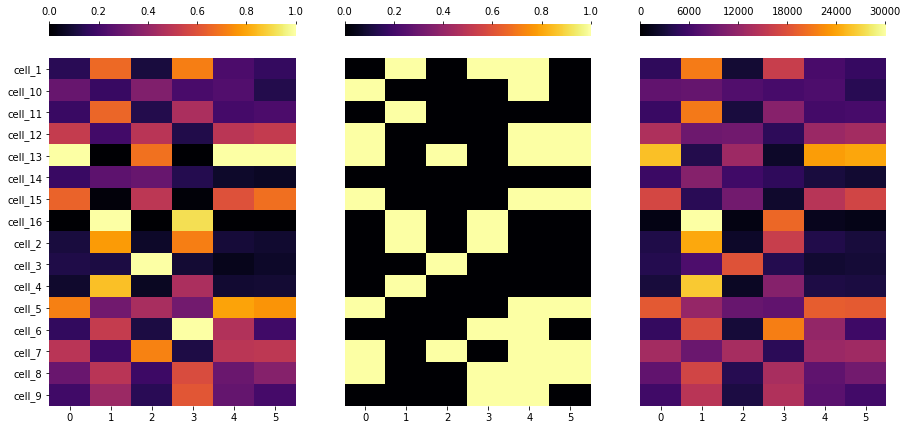

47


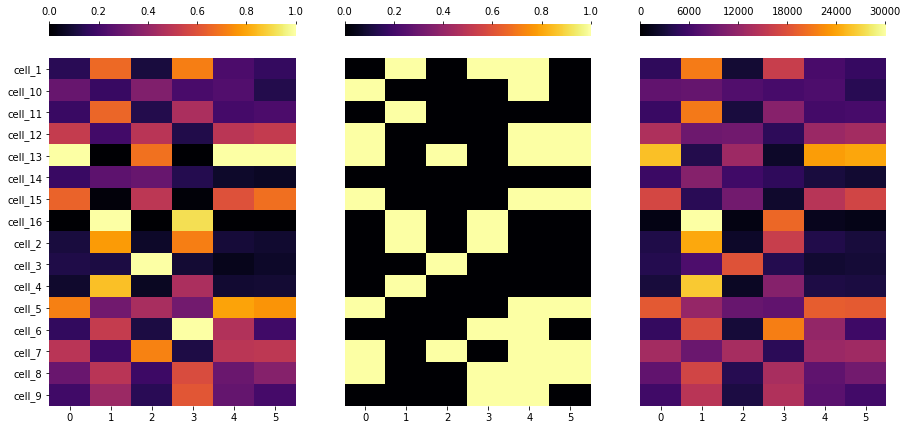

48


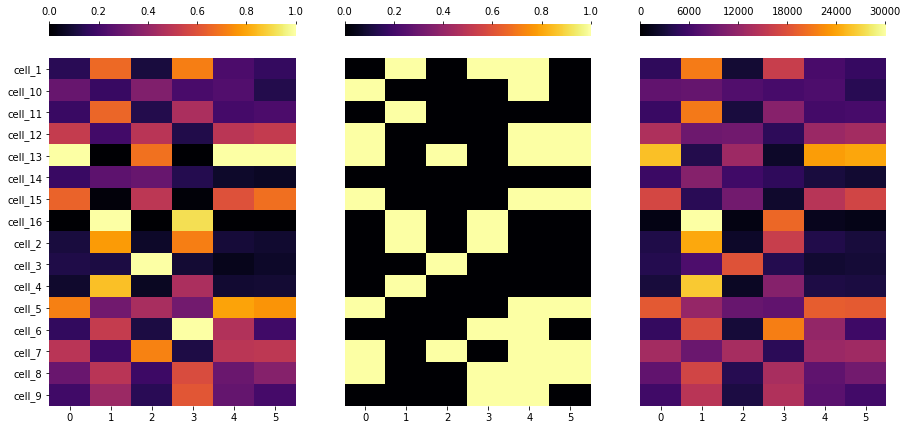

49


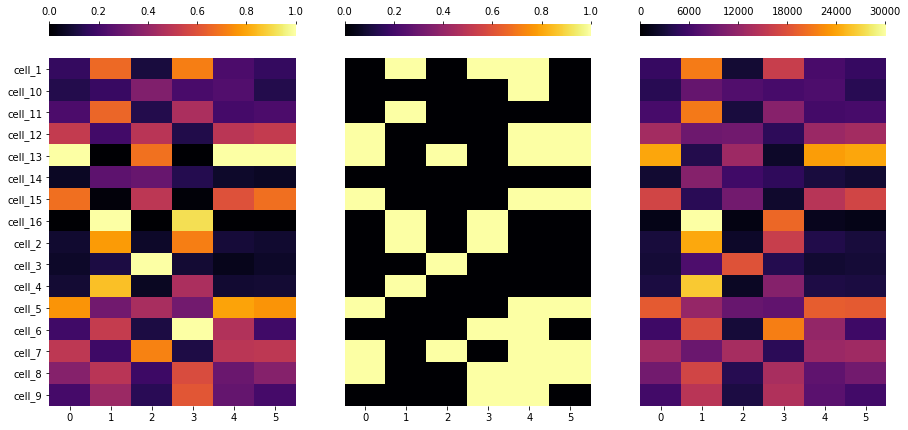

50


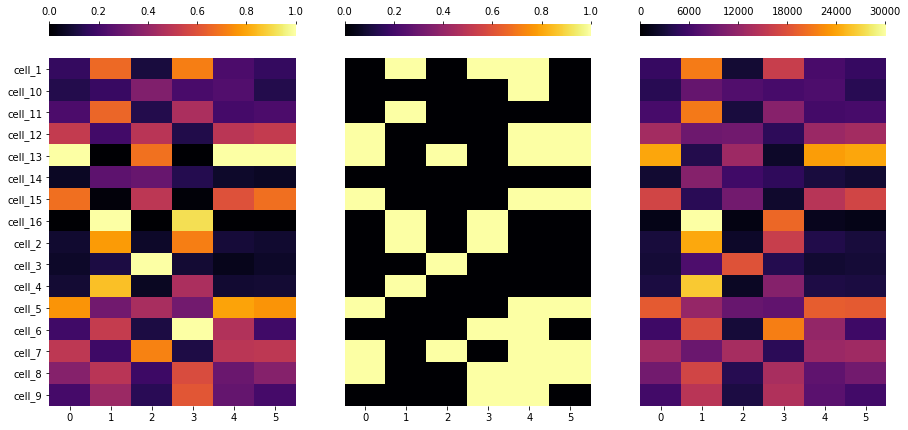

51


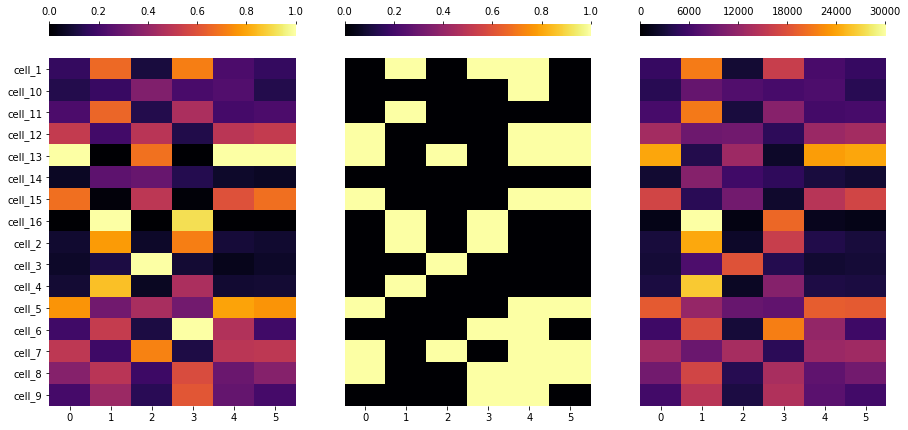

52


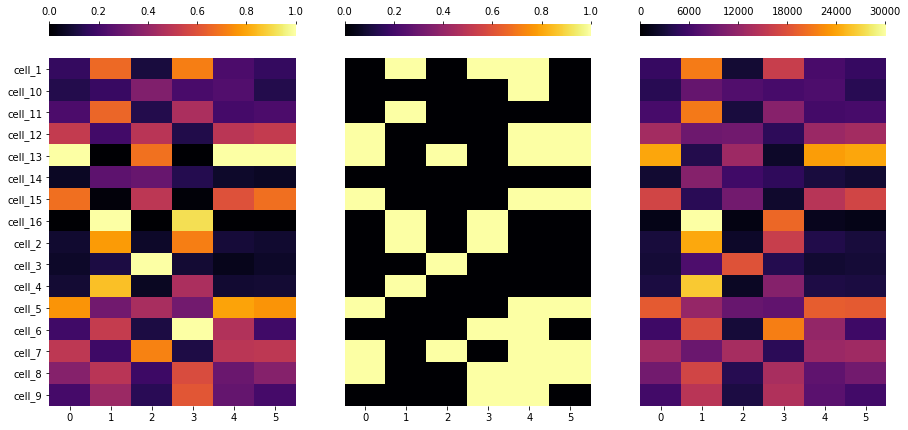

53


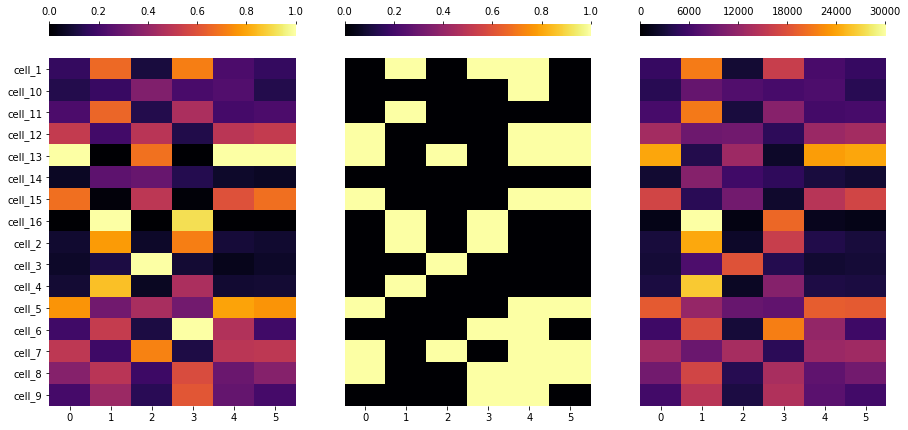

54


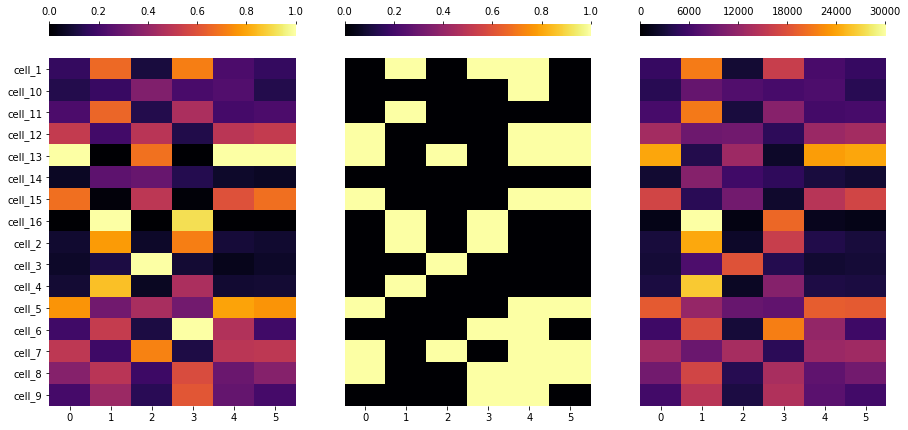

55


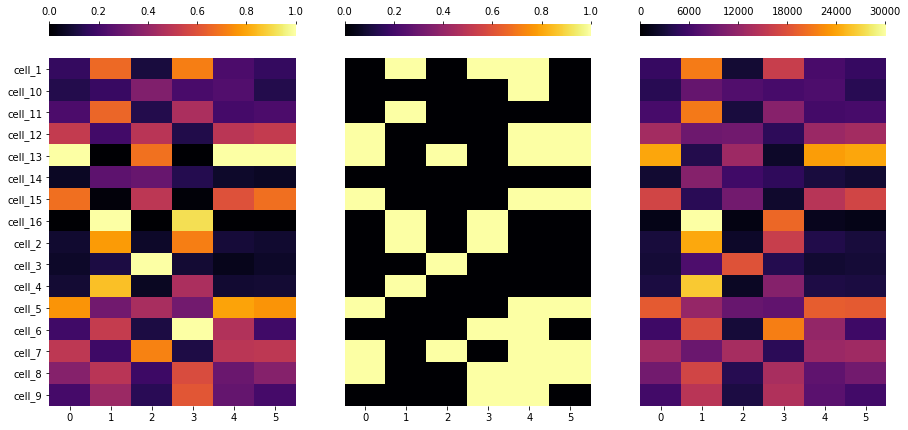

56


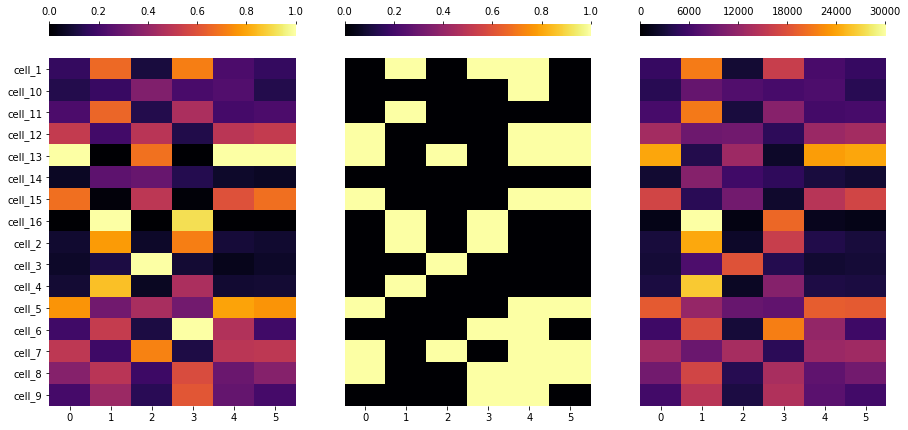

57


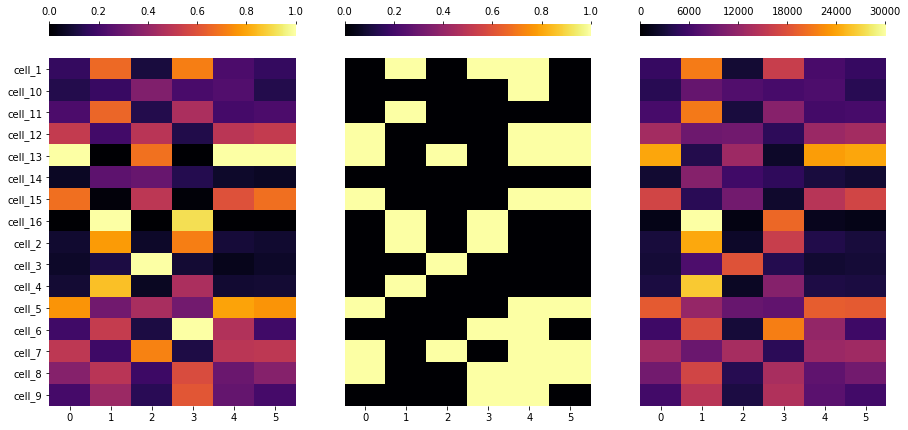

58


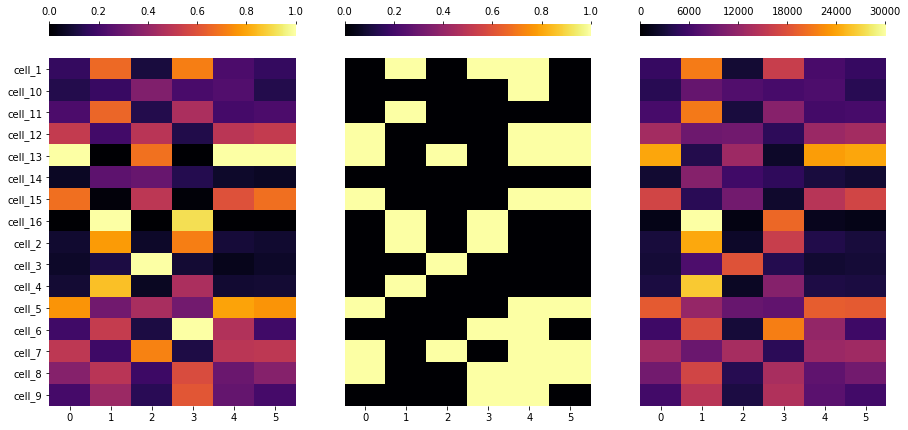

59


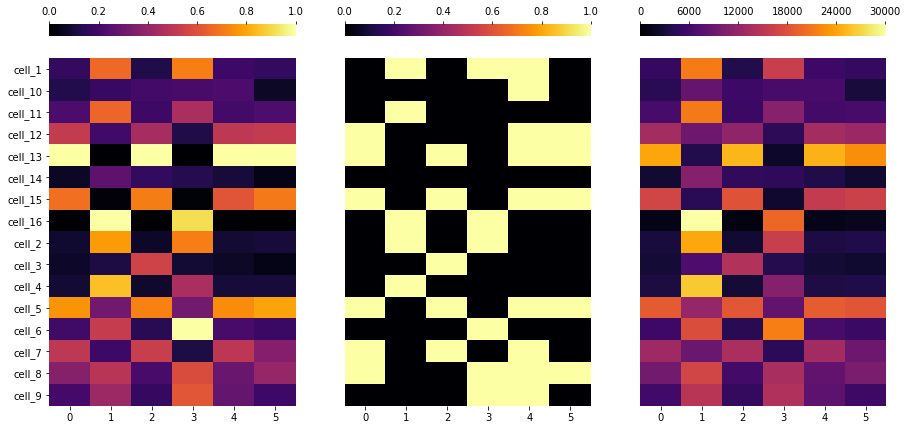

60


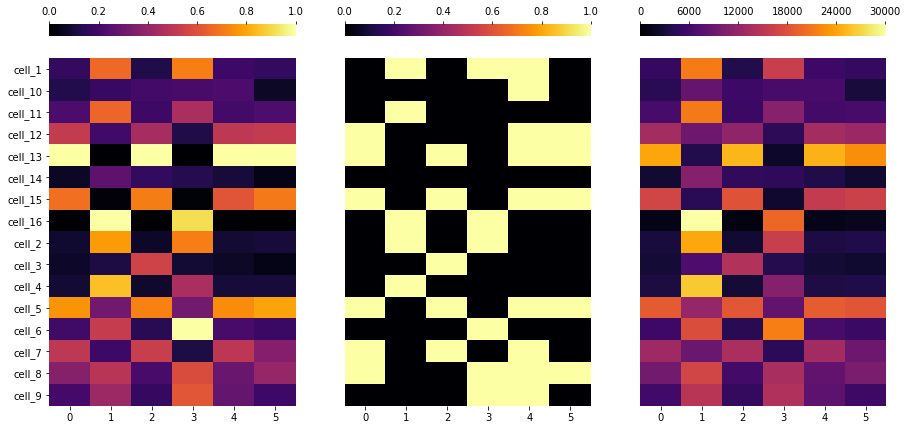

61


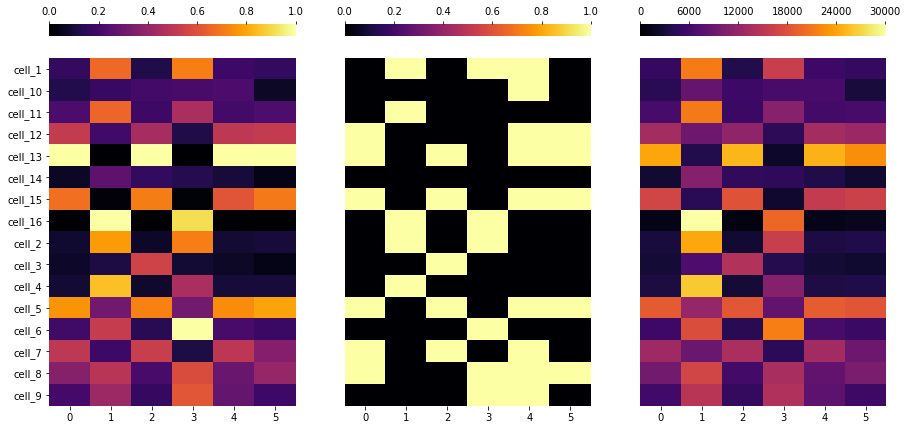

62


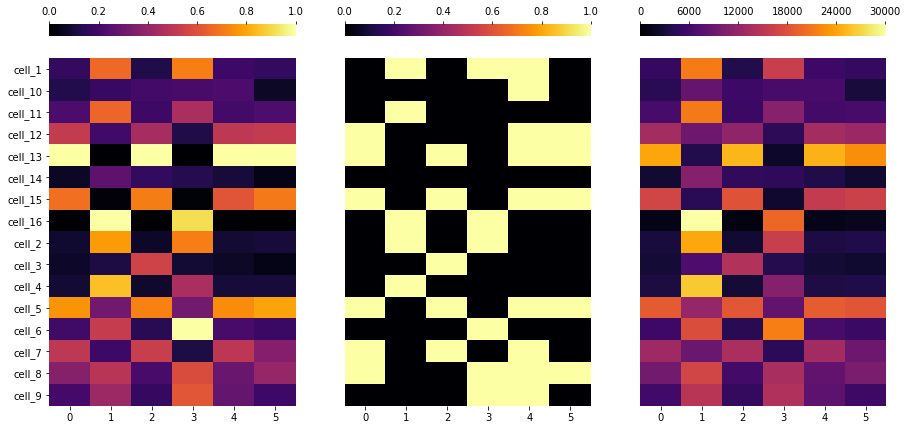

63


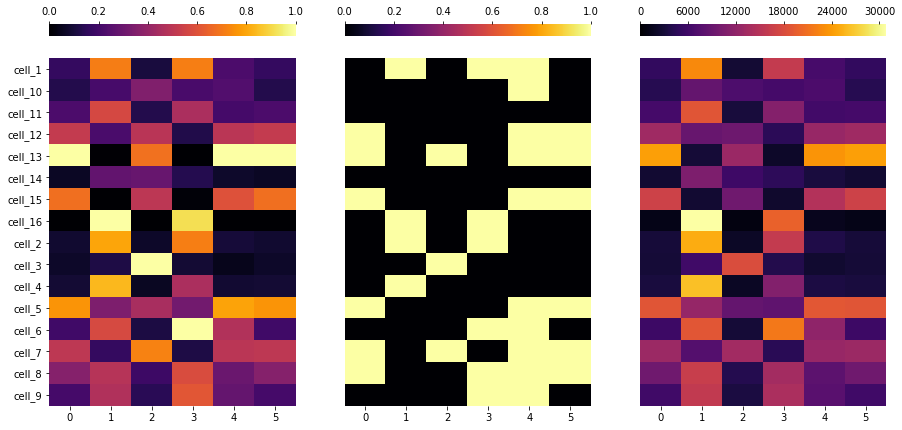

64


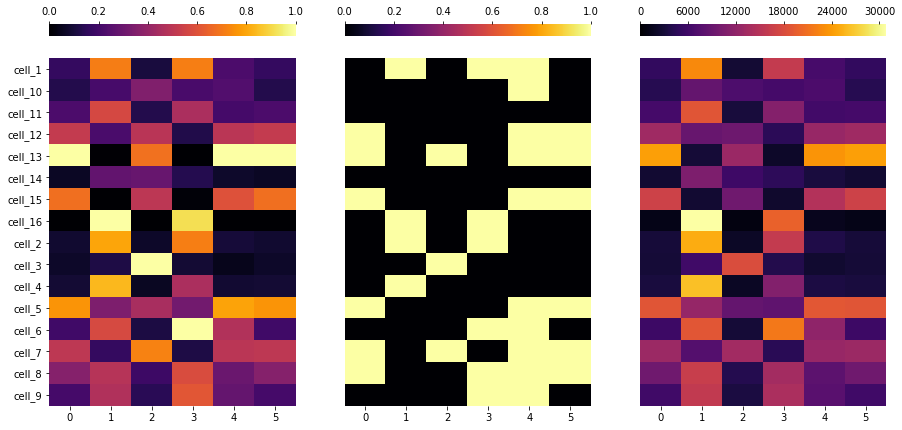

65


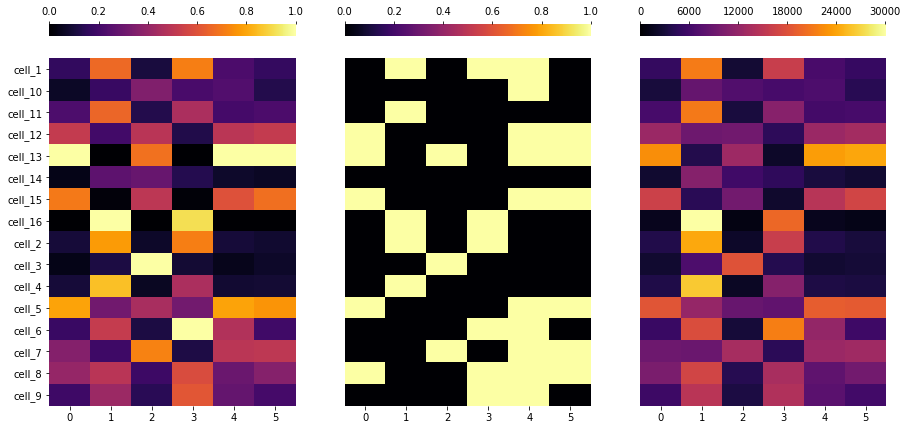

66


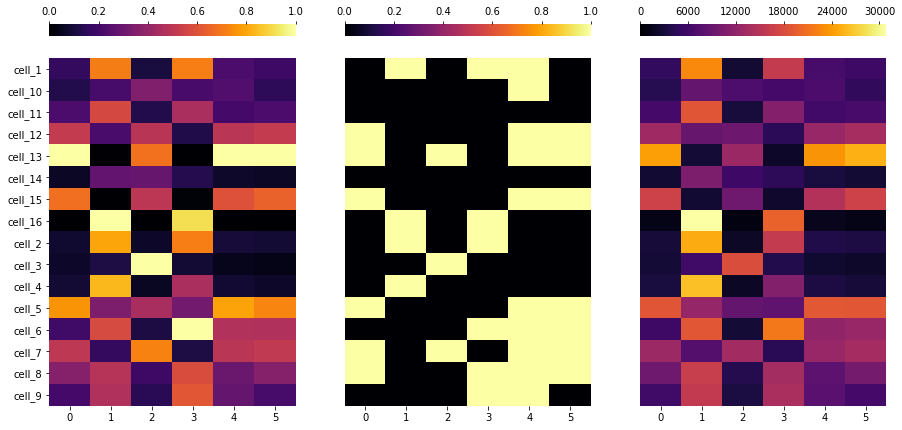

67


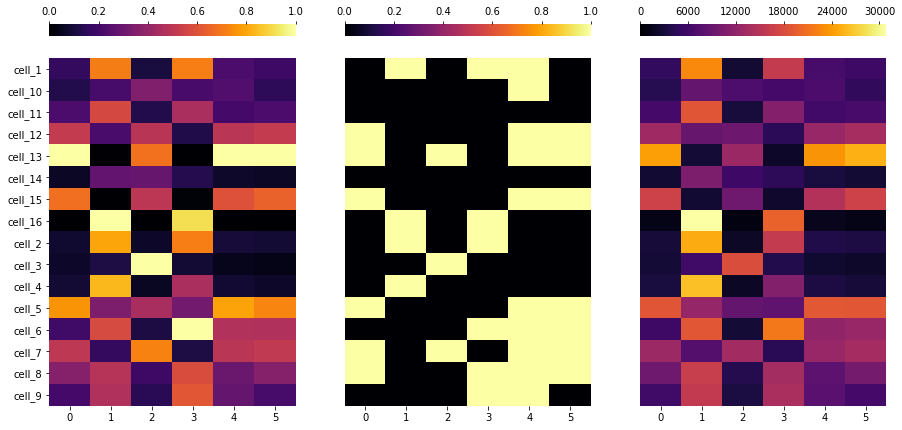

68


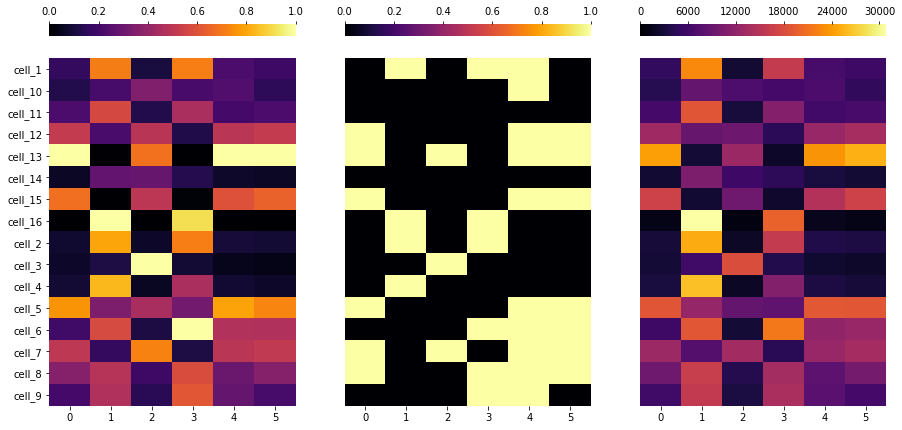

69


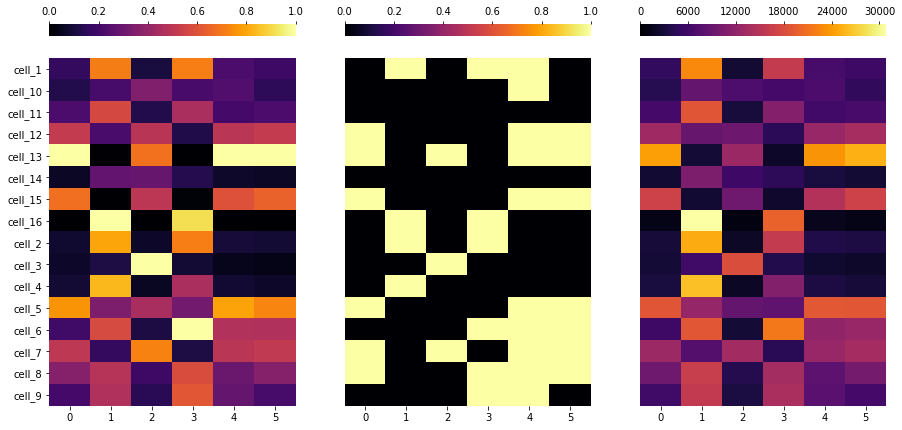

70


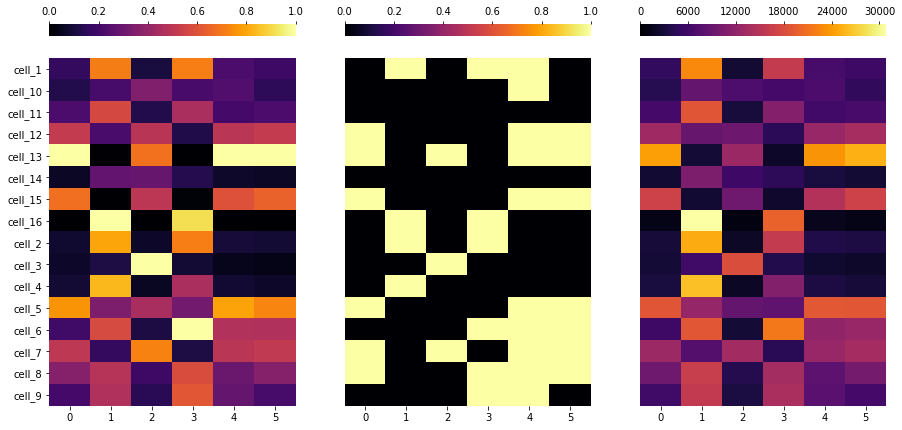

71


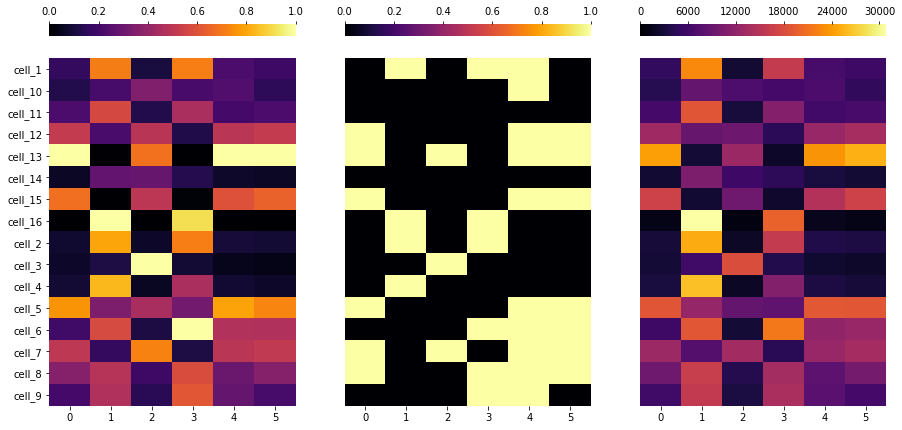

72


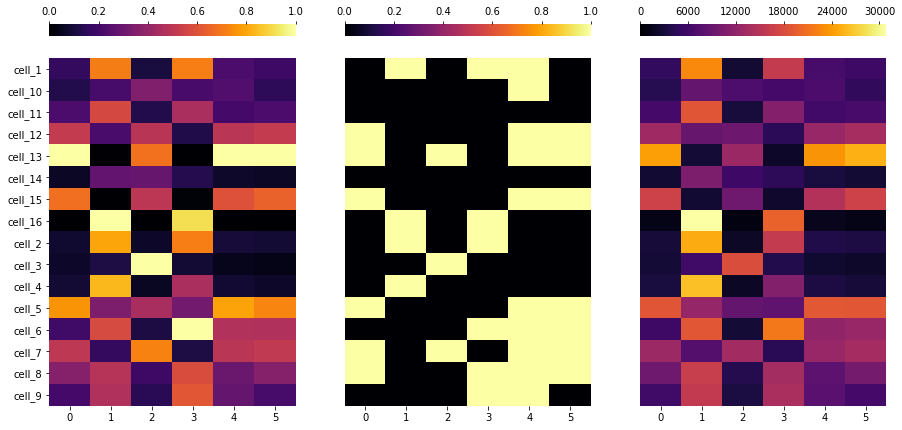

73


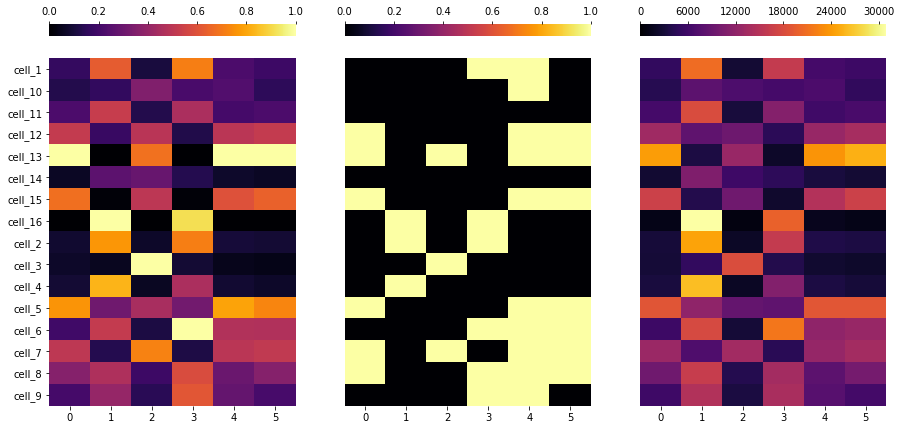

74


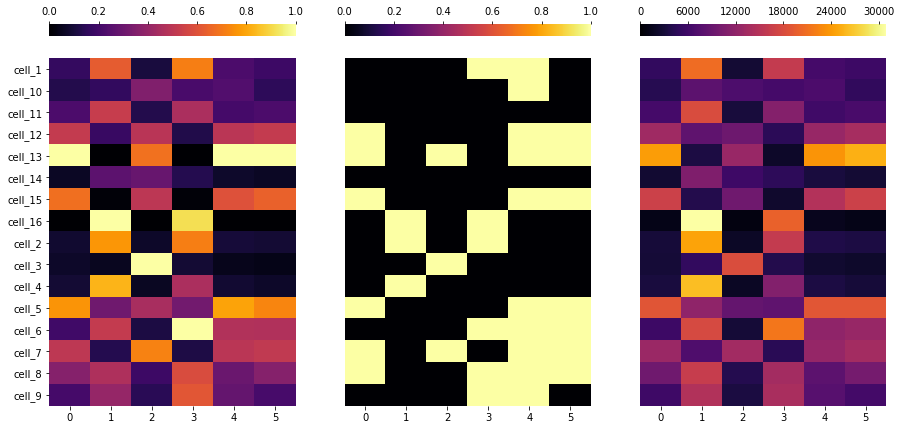

75


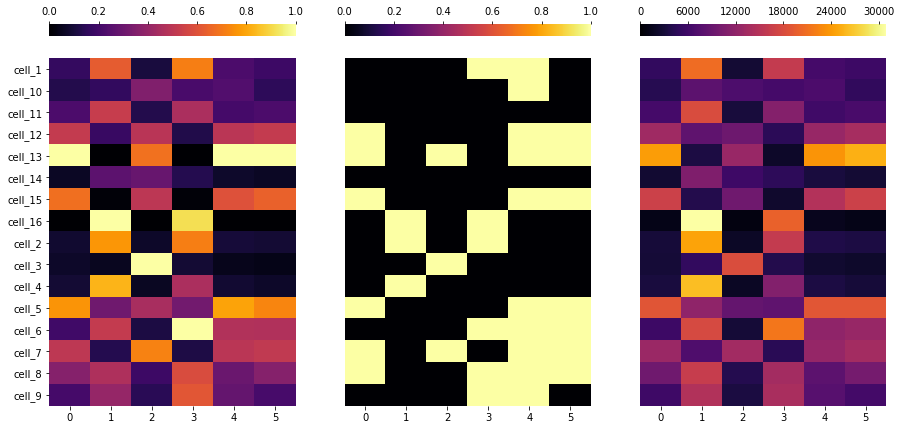

76


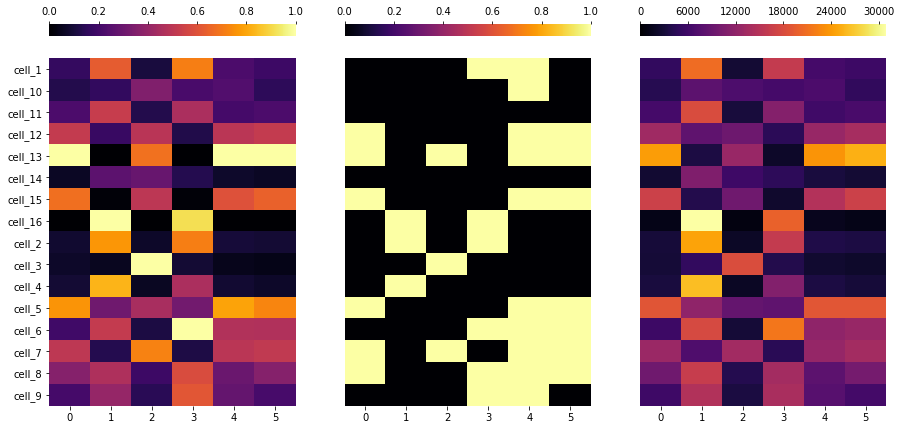

77


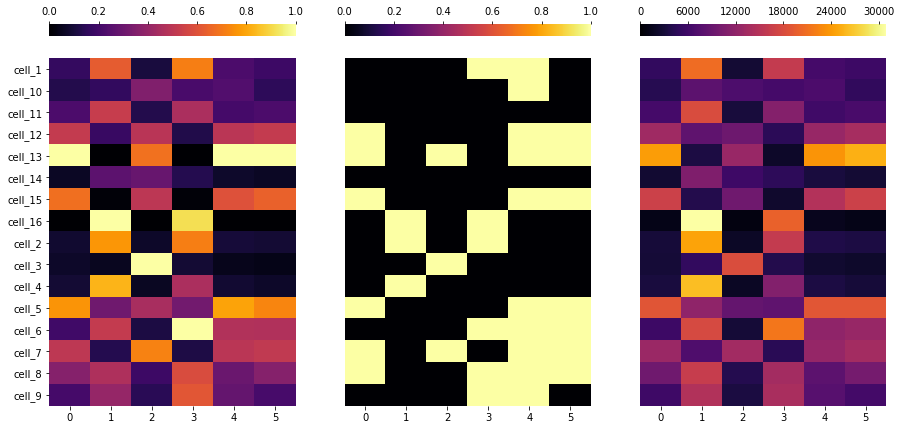

78


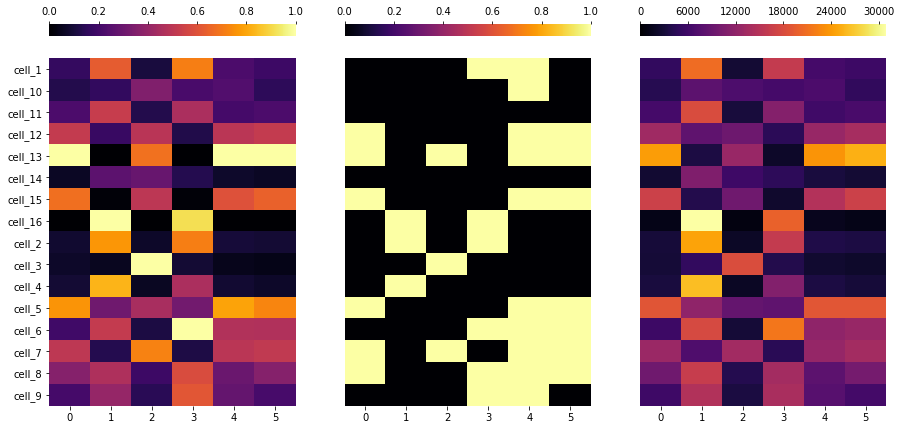

79


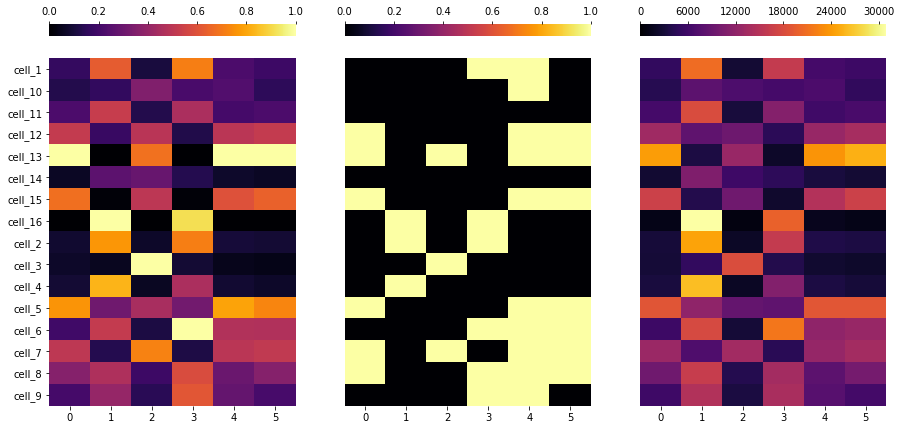

80


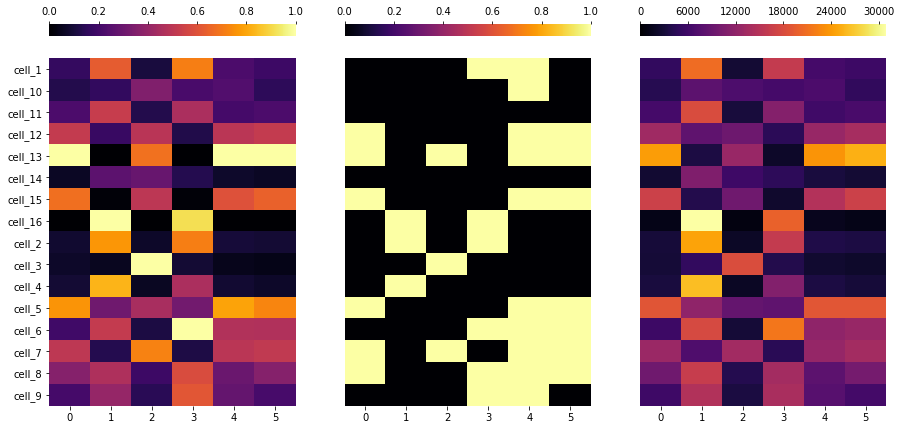

81


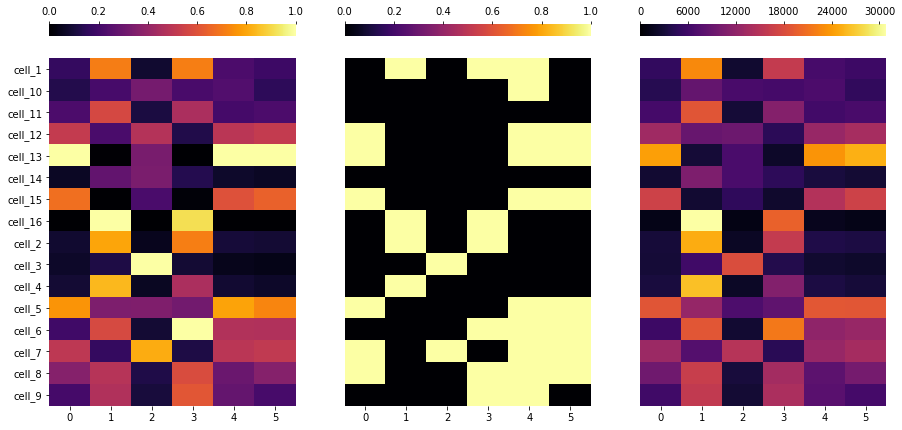

82


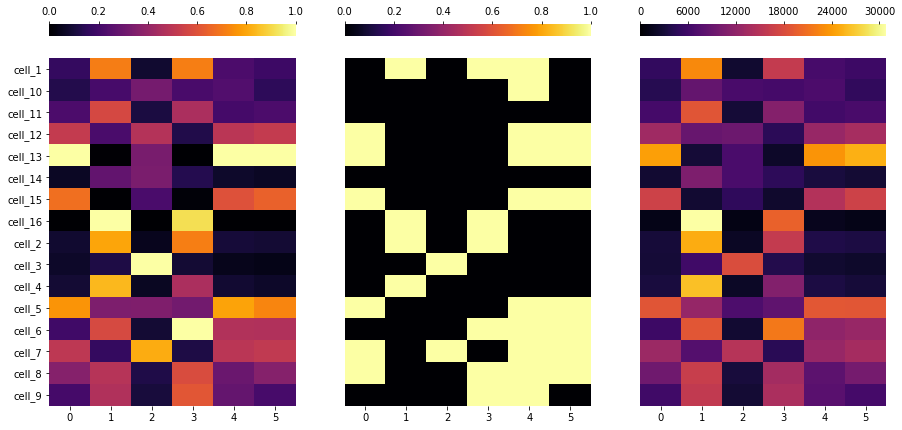

83


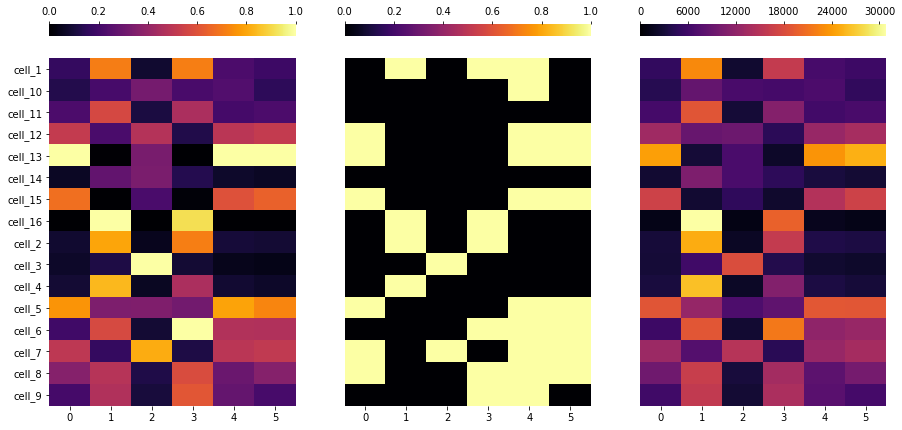

84


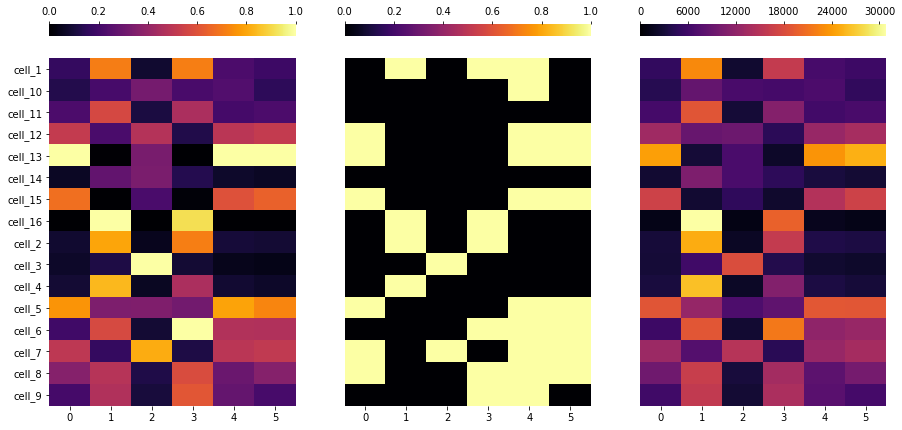

85


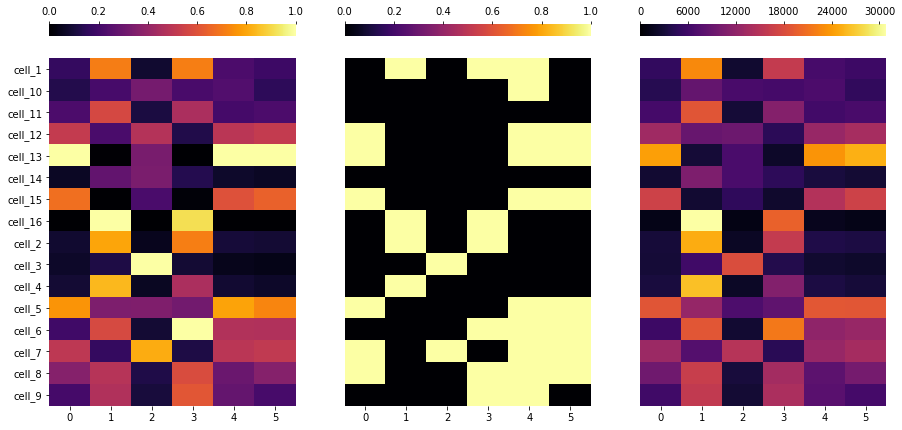

86


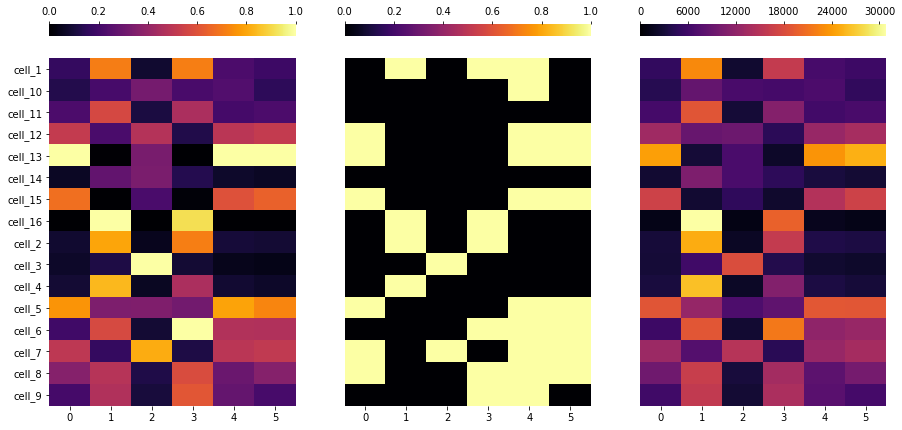

87


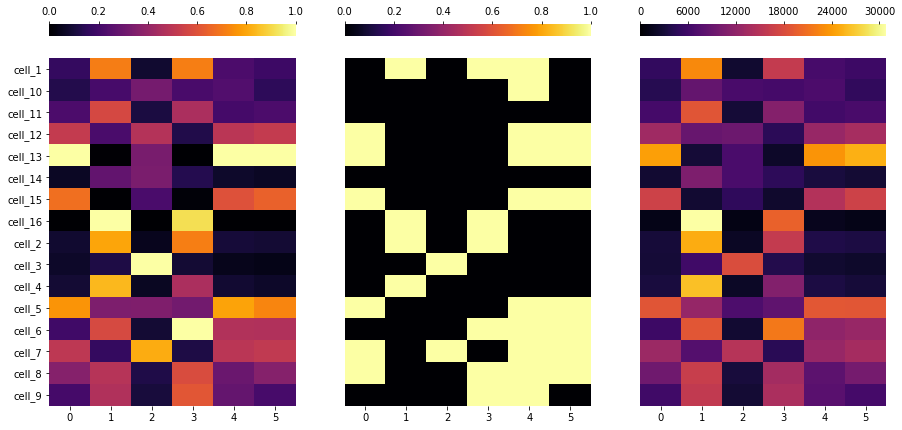

88


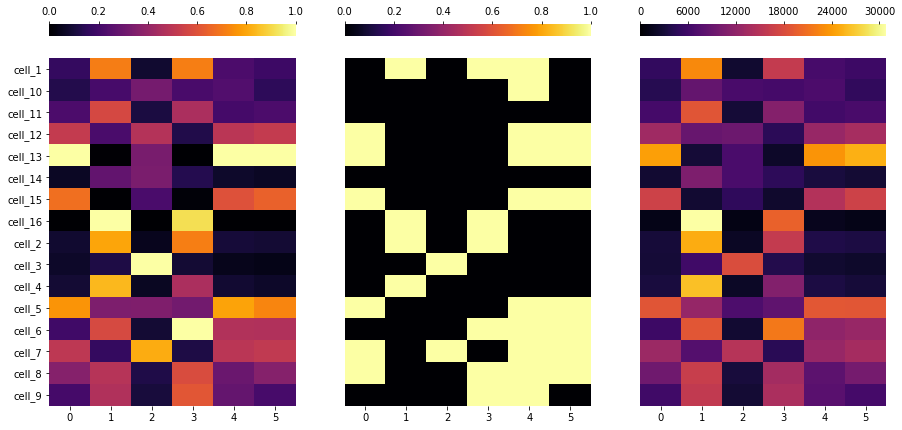

89


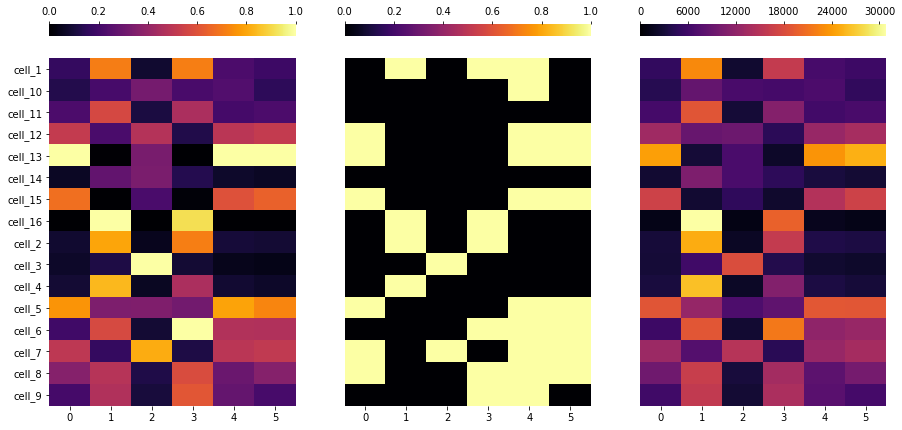

90


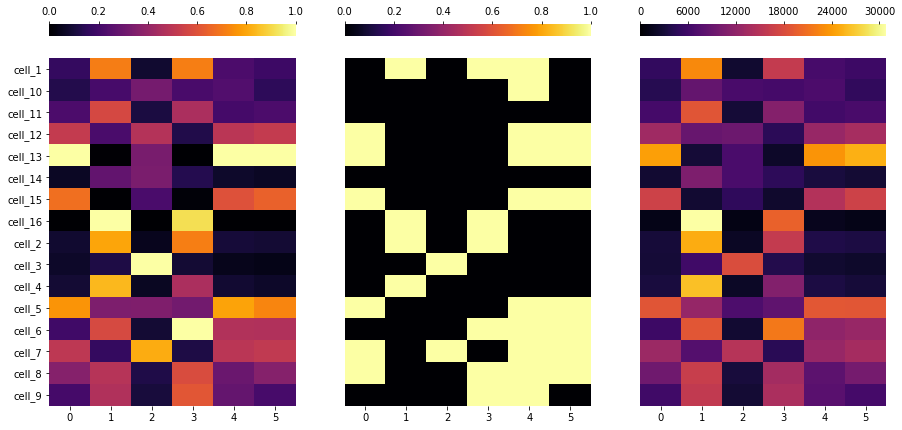

91


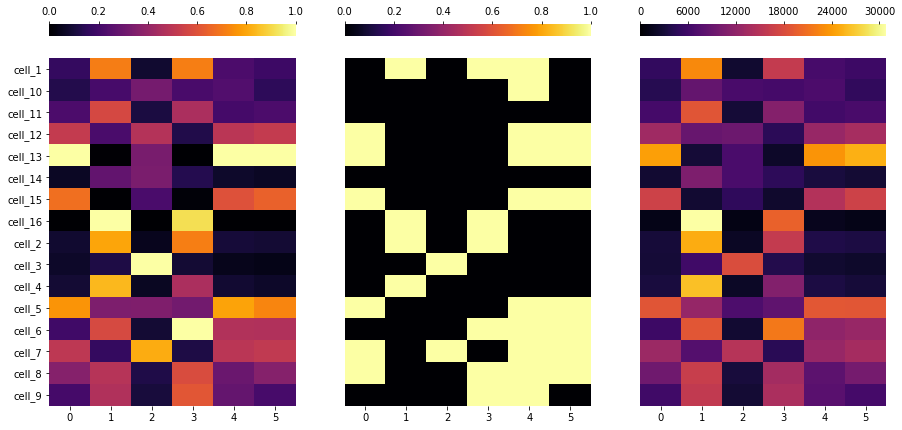

92


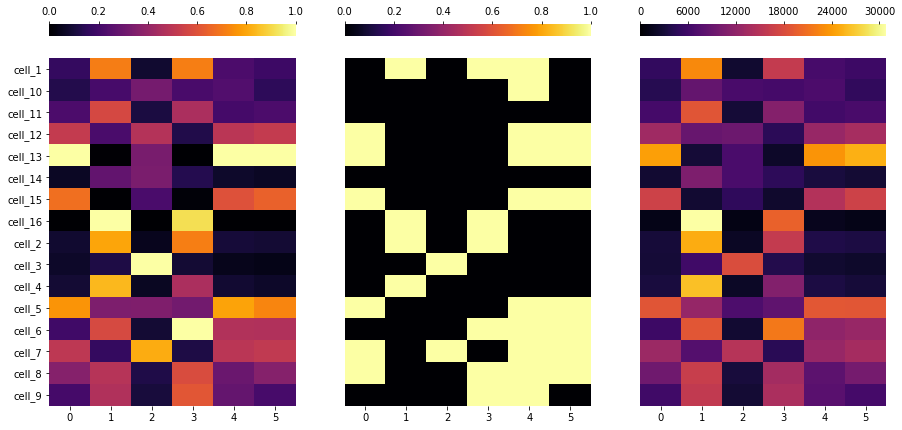

93


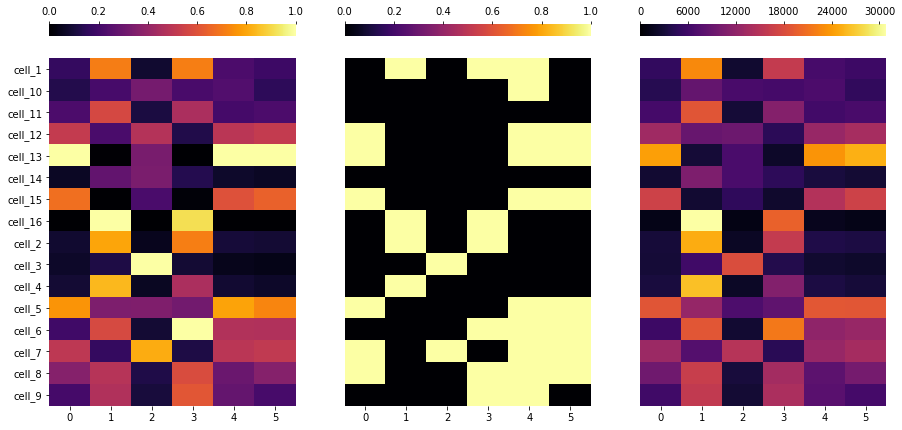

94


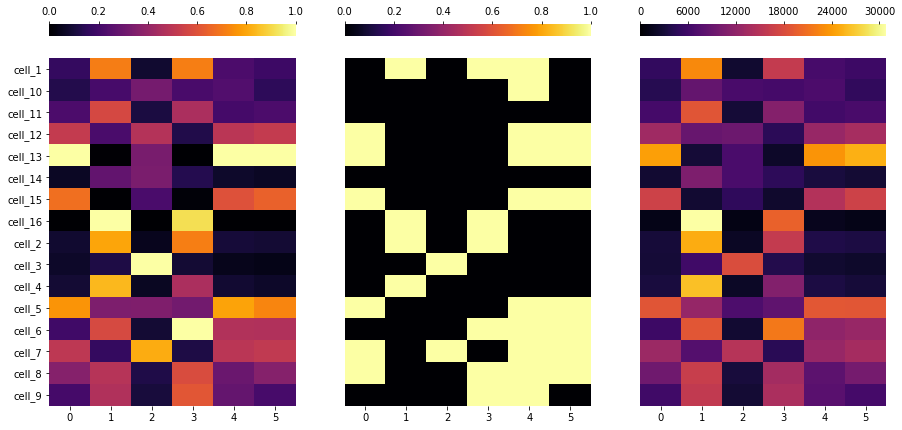

95


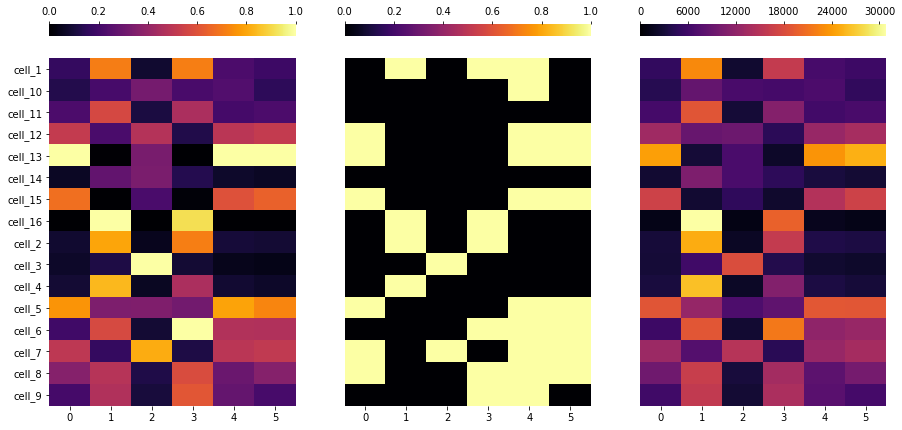

96


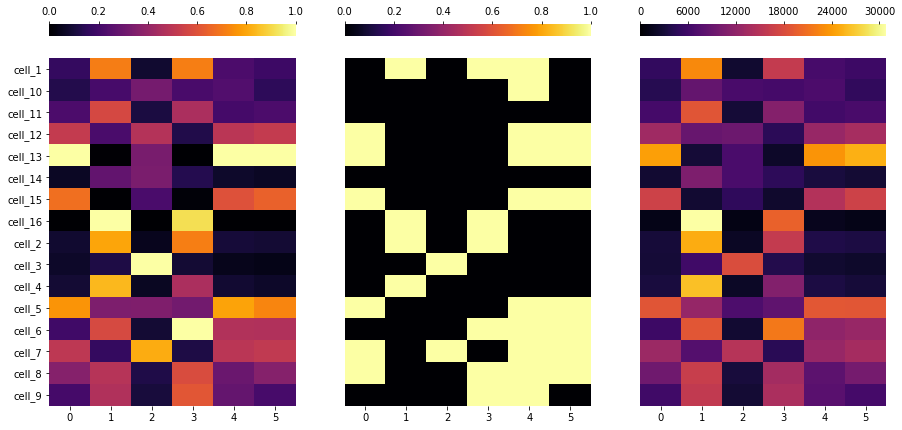

97


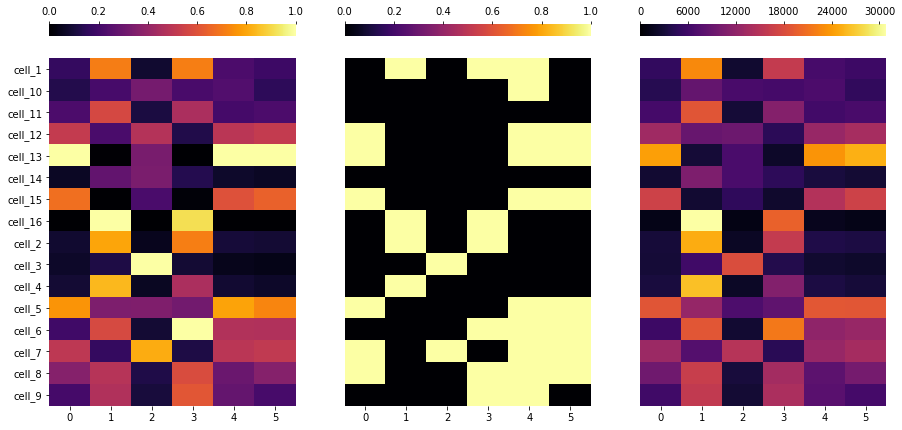

98


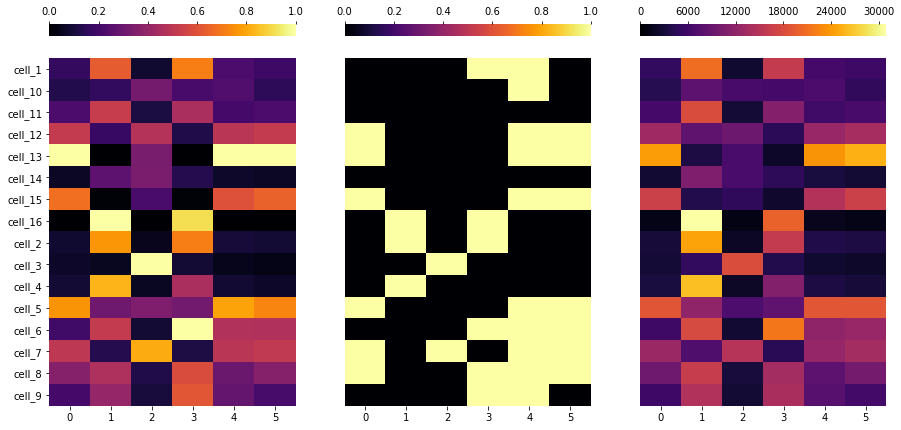

99


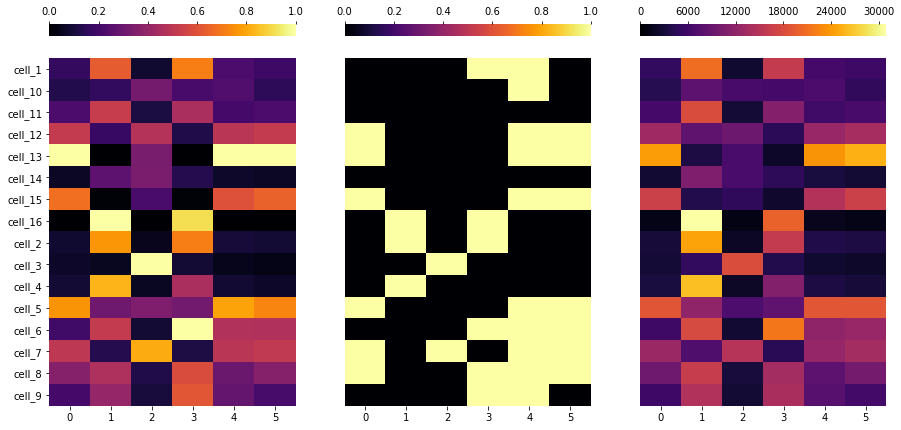

In [170]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
base = os.path.join(base_path,'Neuron_Results_SizeNorm_1','Results_1')
for I in range(100):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[0].drop(index='blank').copy()
        codebook_df = survivors[0].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True,vmin=0,vmax=1)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False,vmin=0)#,vmax=50)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False,vmin=0,vmax=1)
        plt.show()
    except:
        break

270


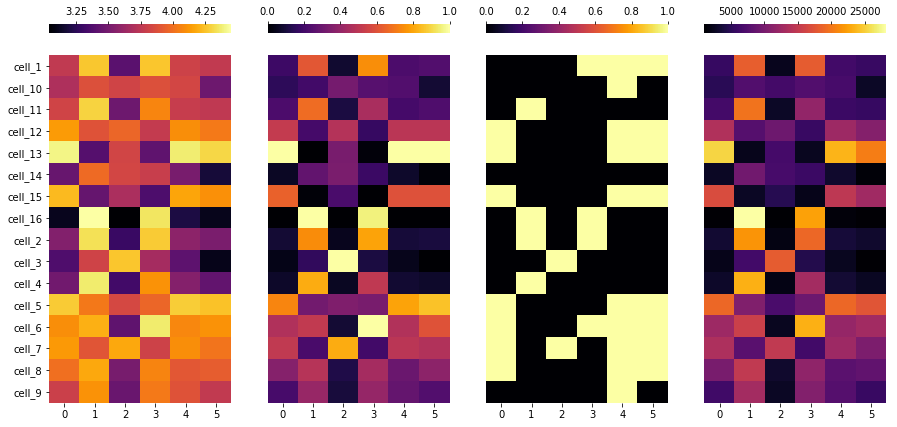

In [188]:
I=270
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
base = os.path.join(base_path,'Neuron_Results_SizeNorm_1','Results_1')
elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
print(I)
Readout_df = readouts[0].drop(index='blank').copy()
codebook_df = survivors[0].drop(index='blank').copy()
norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
fig, axes = plt.subplots(ncols=4, figsize=(15, 8))
ax1,ax2,ax3,ax4 = axes
im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0,vmax=1)
im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0)#,vmax=50)
im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0,vmax=1)
plt.show()

0


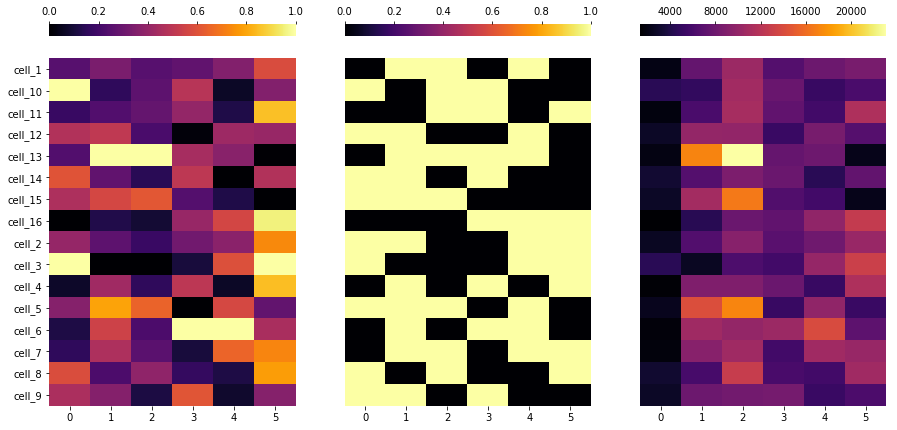

1


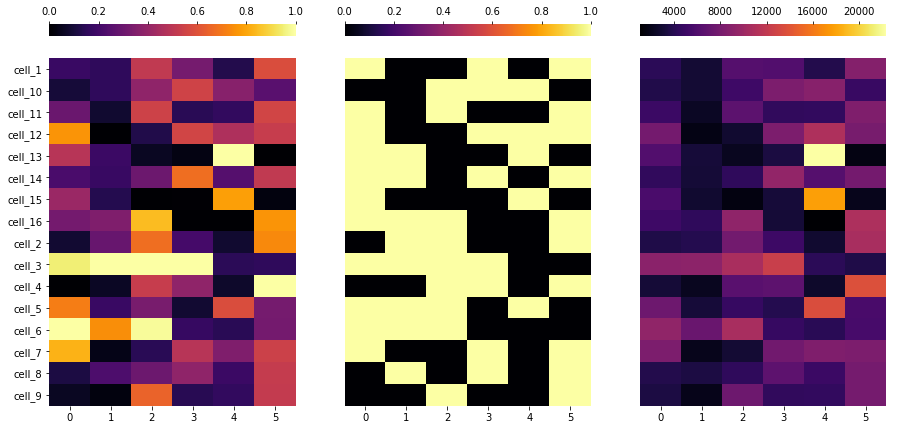

2


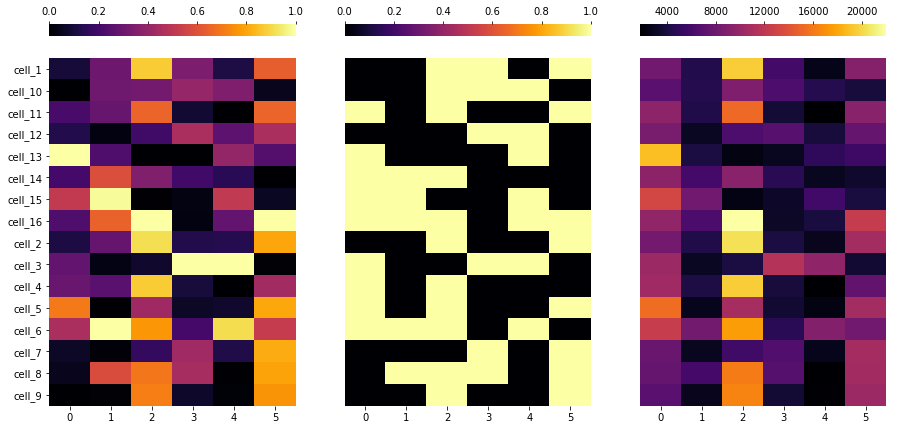

3


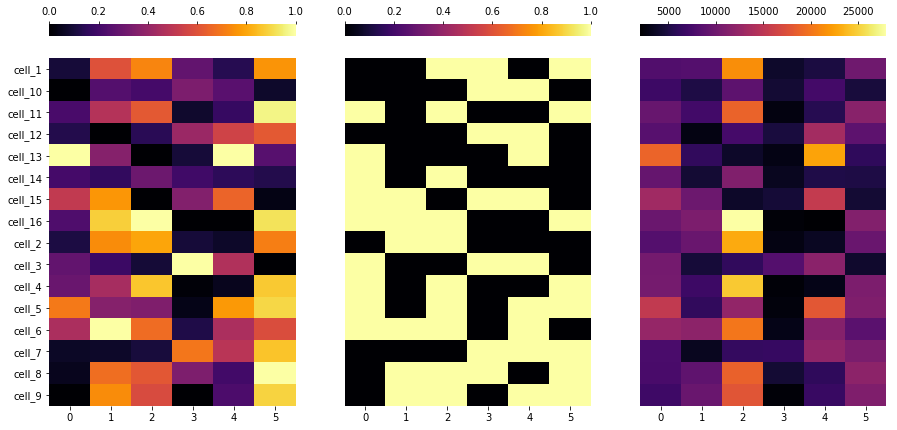

4


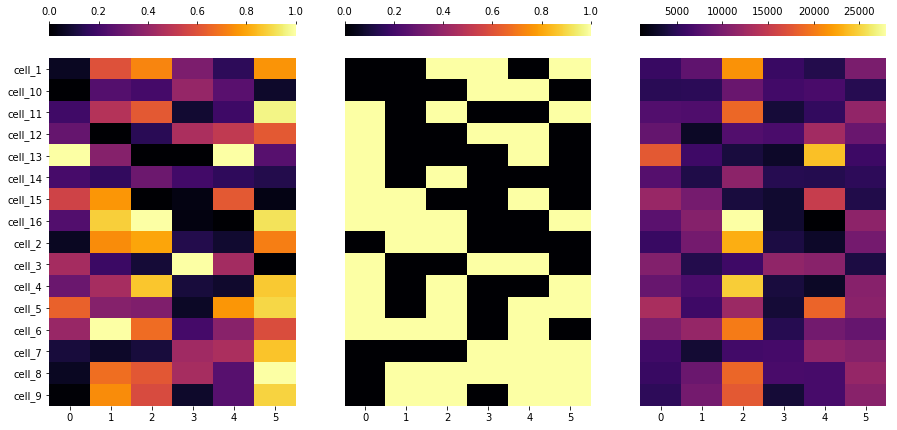

5


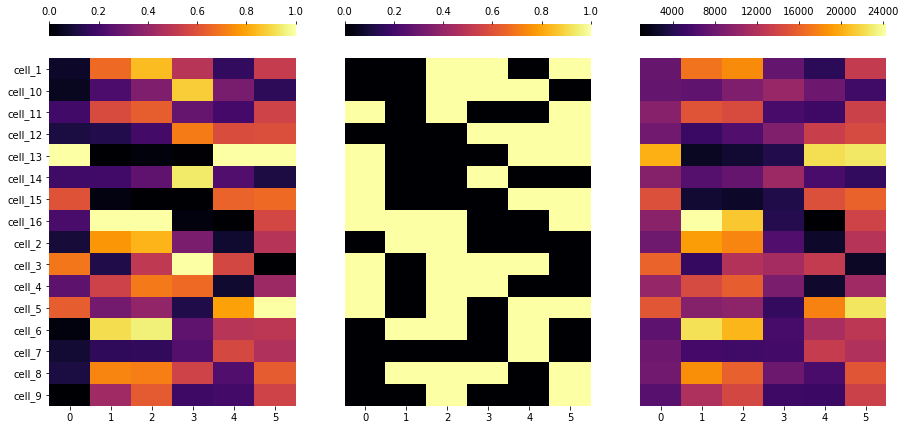

6


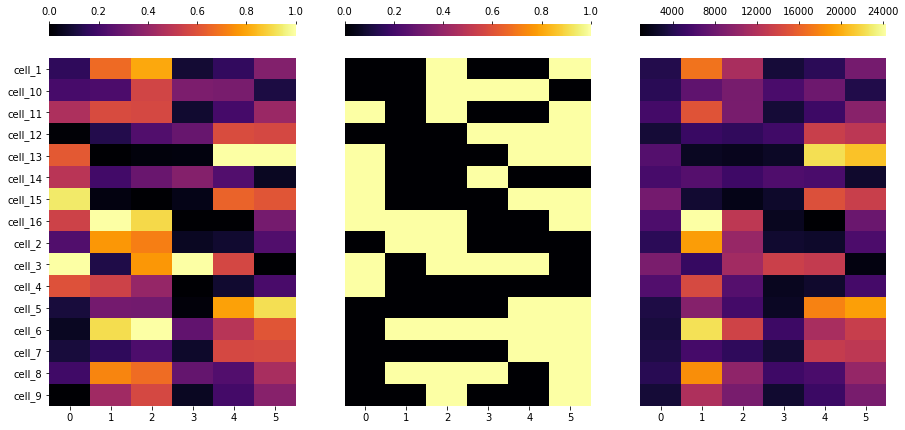

7


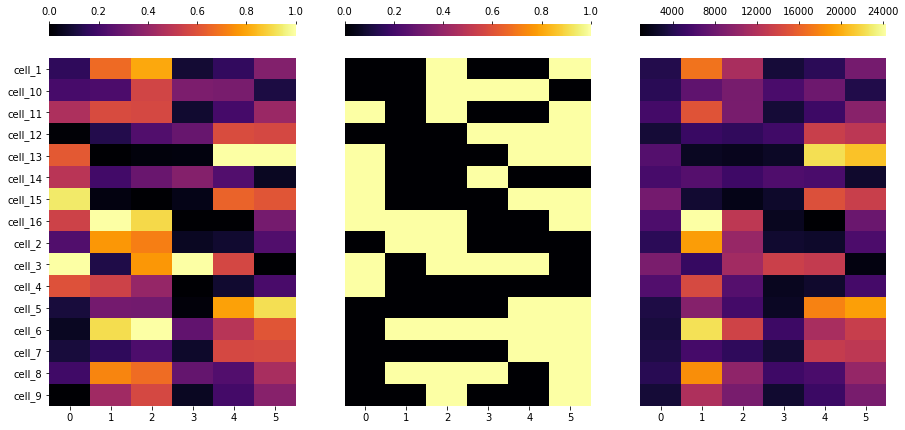

In [200]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
base = os.path.join(base_path,'Neuron_Results_SizeNorm_1','Results_4')
i=1
for I in range(100):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[i].drop(index='blank').copy()
        codebook_df = survivors[i].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)#,vmin=0,vmax=1)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0)#,vmax=50)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0,vmax=1)
        plt.show()
    except:
        break

0


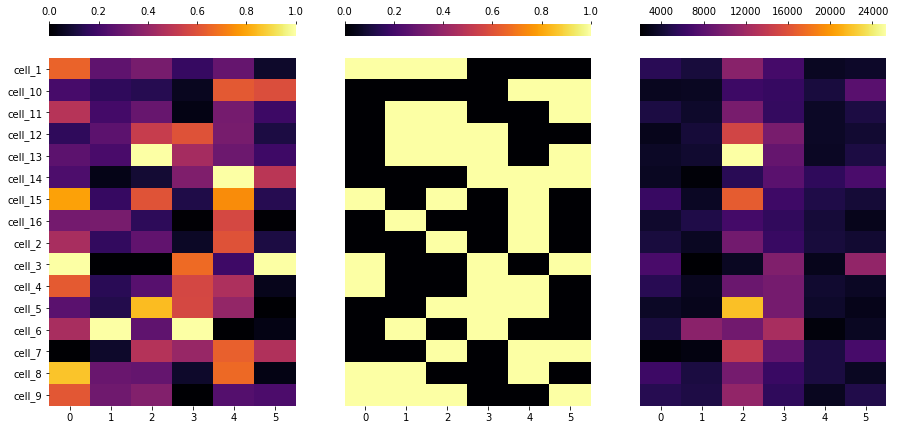

1


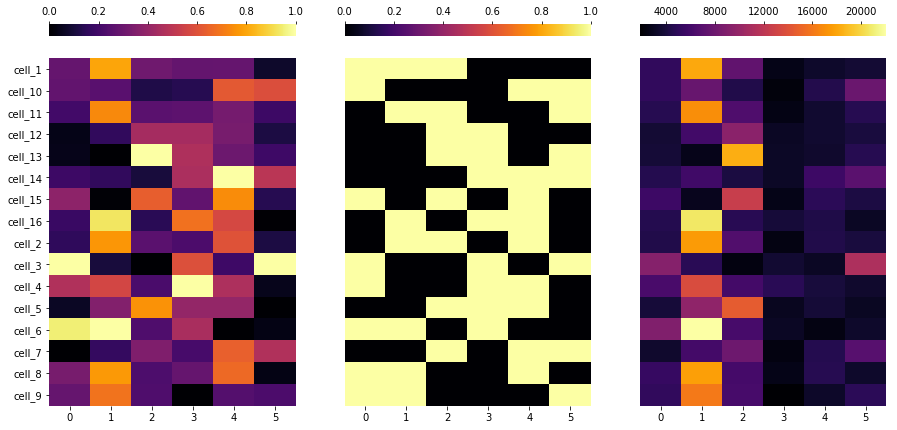

2


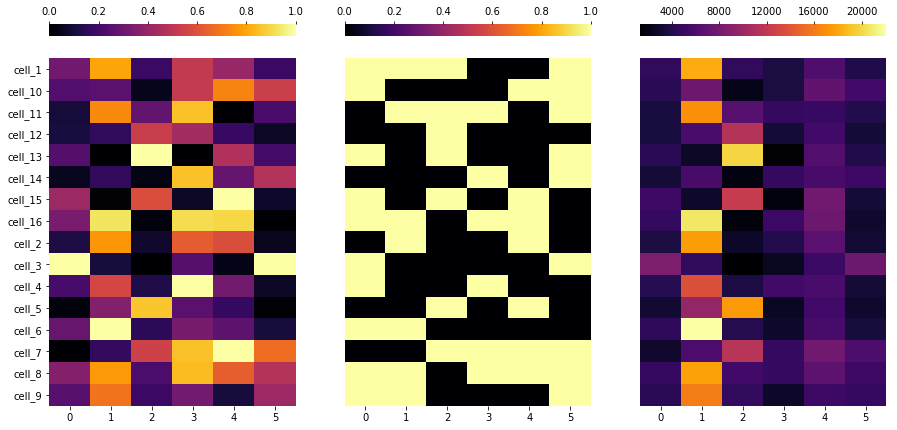

3


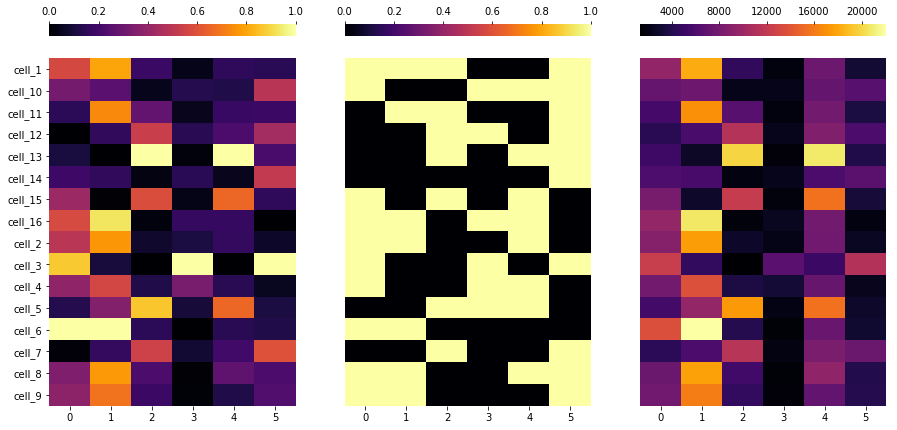

4


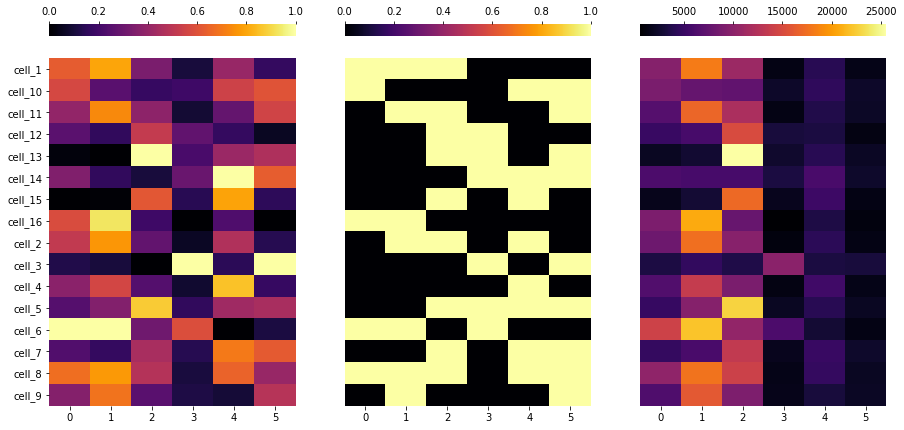

5


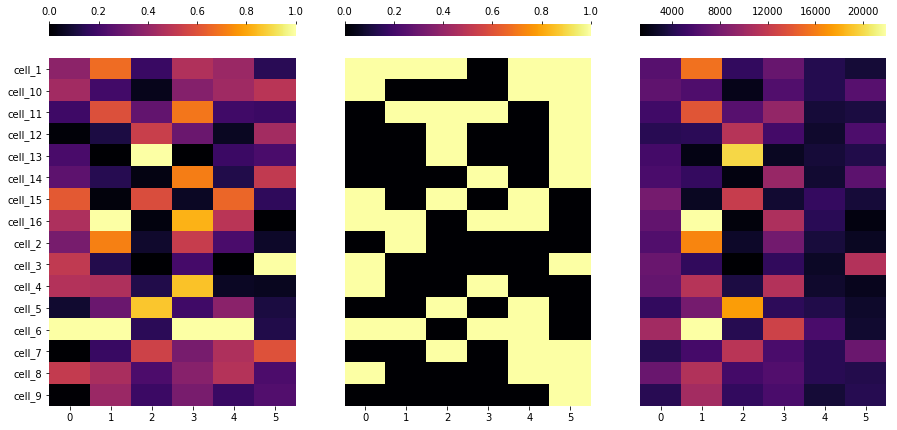

6


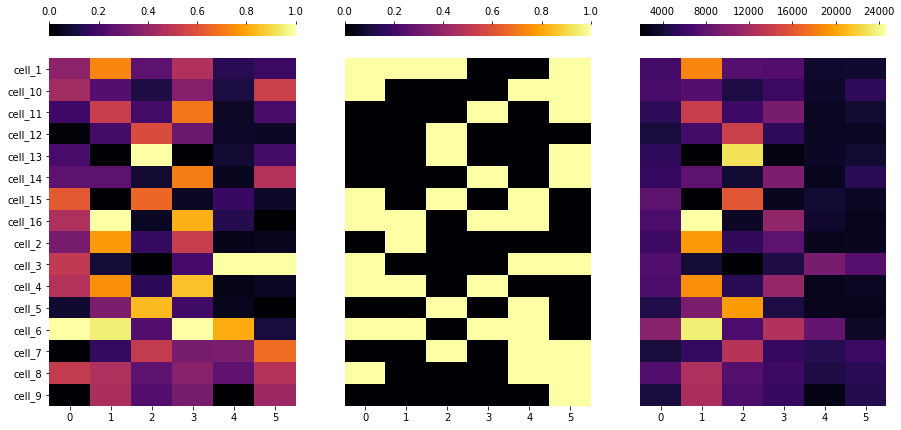

7


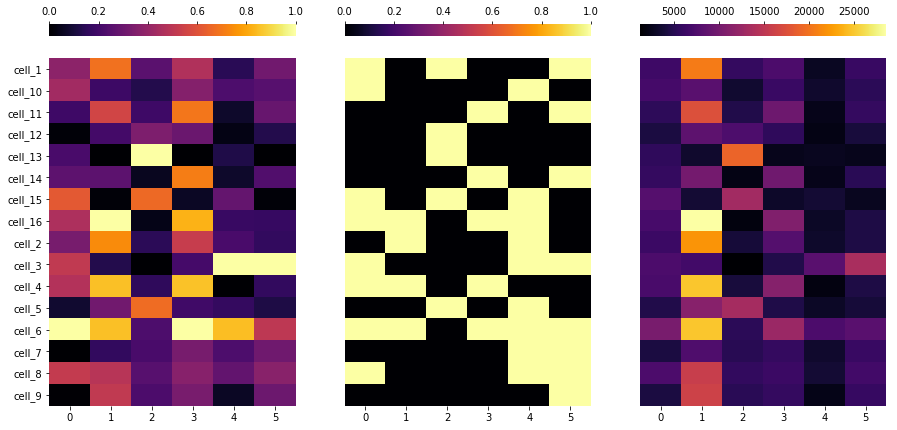

8


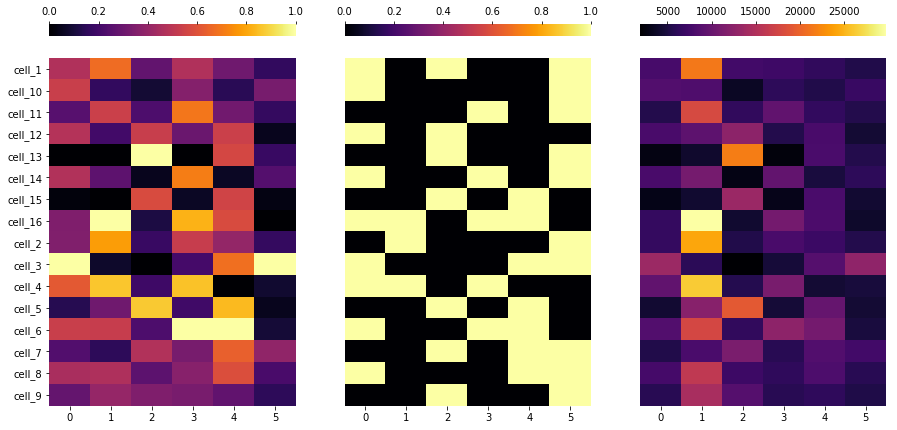

9


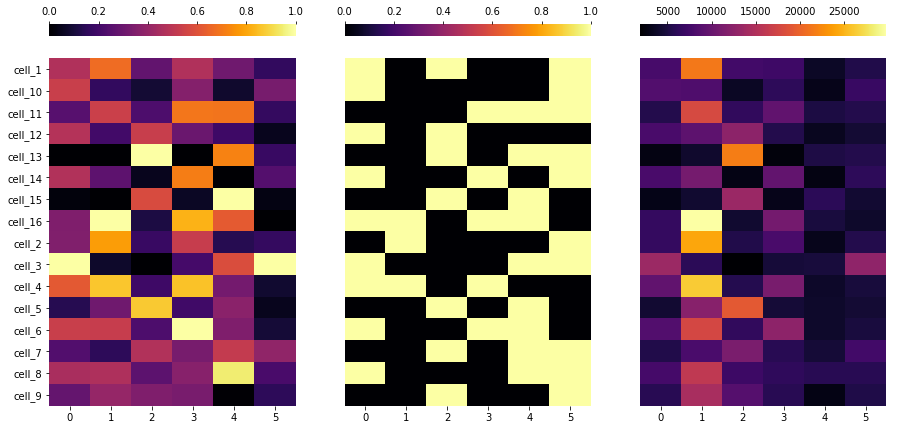

10


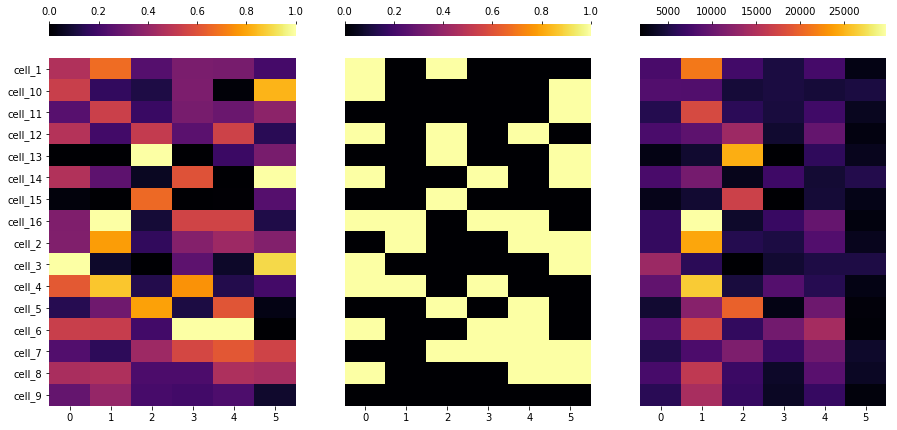

11


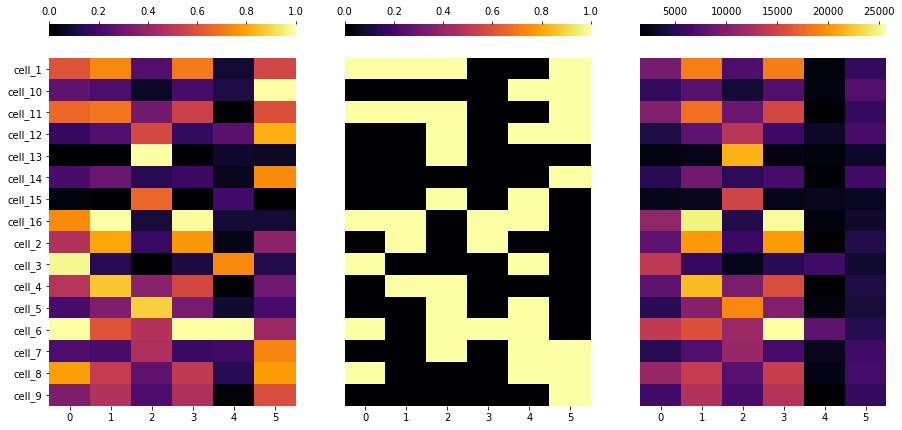

12


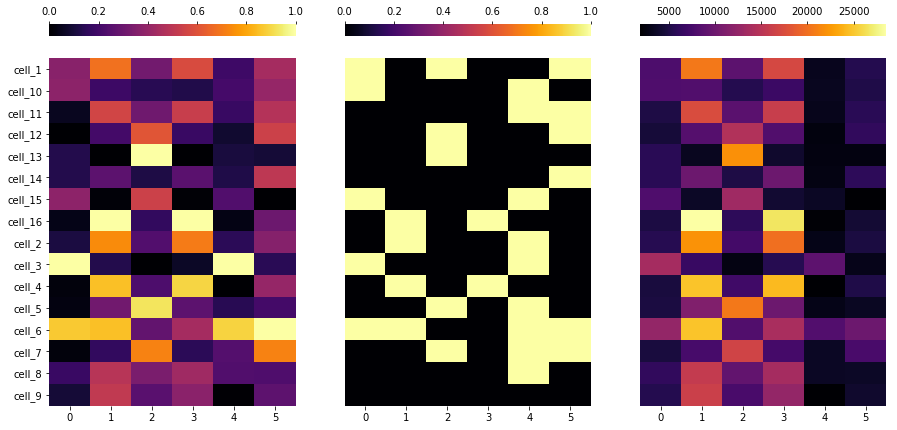

13


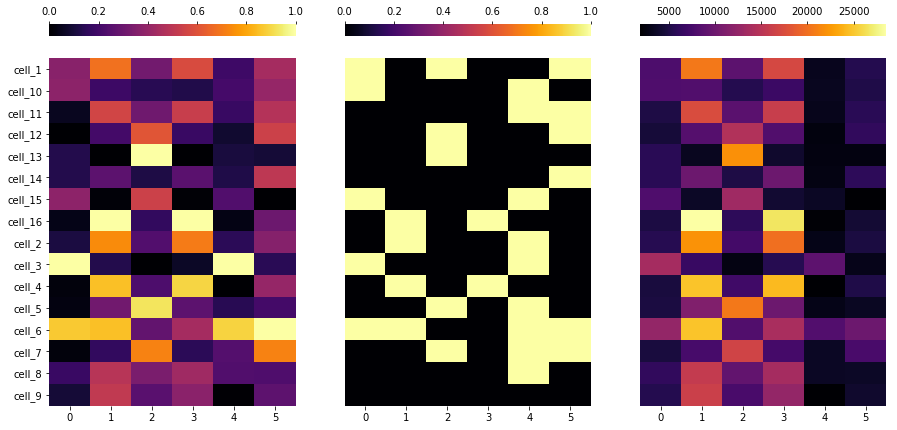

14


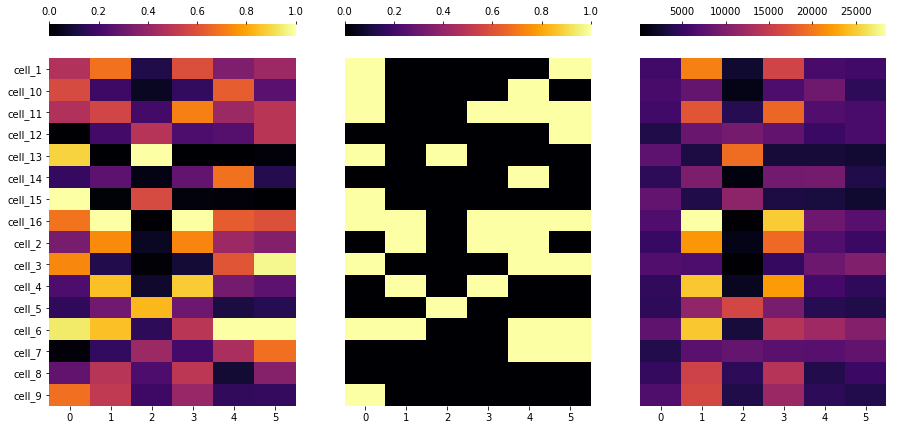

15


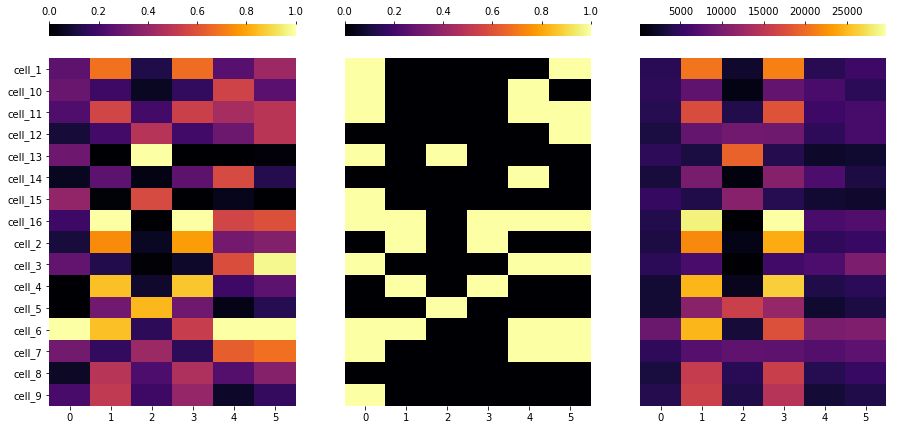

16


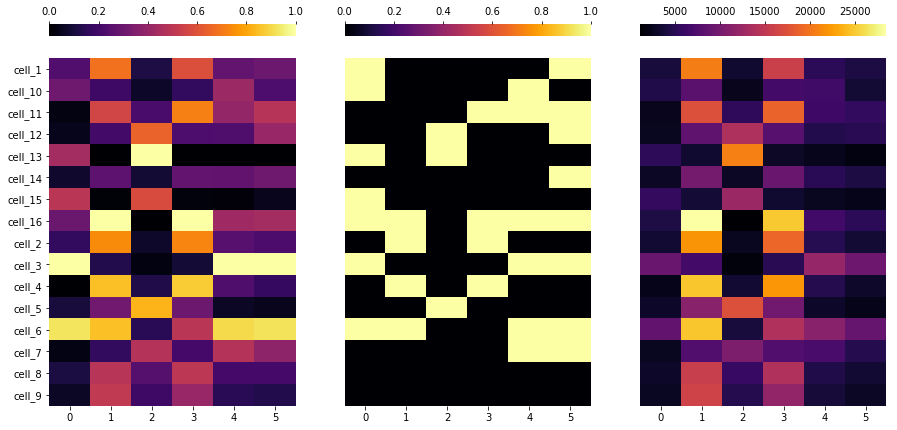

17


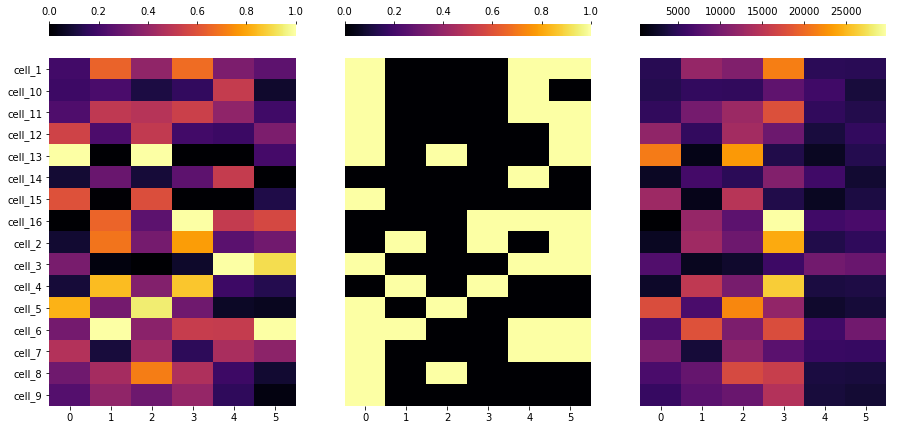

18


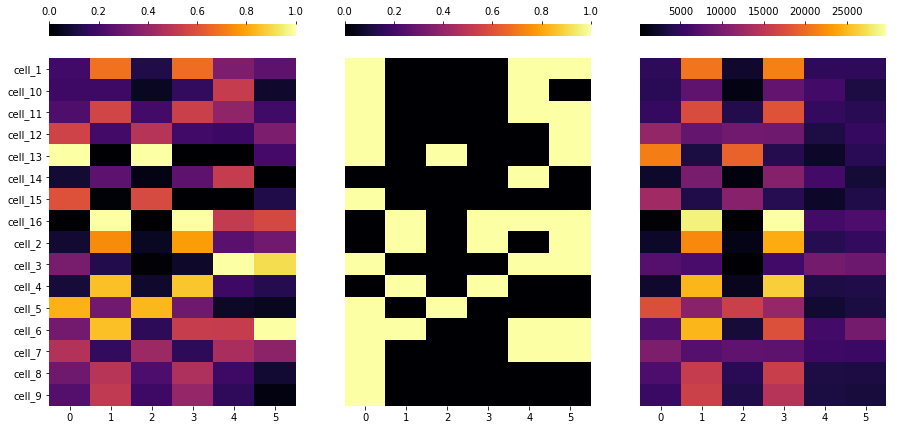

19


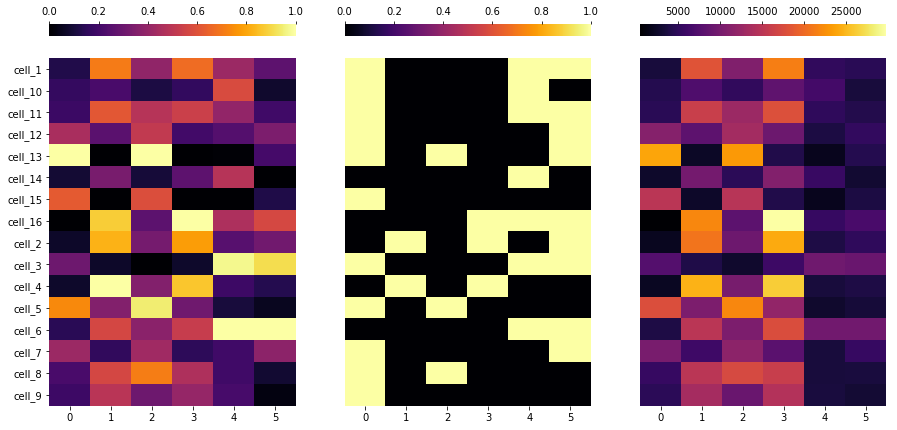

20


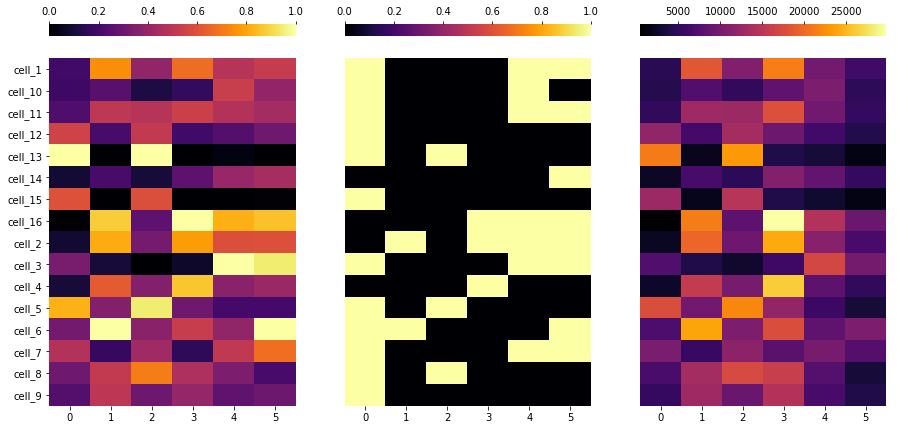

21


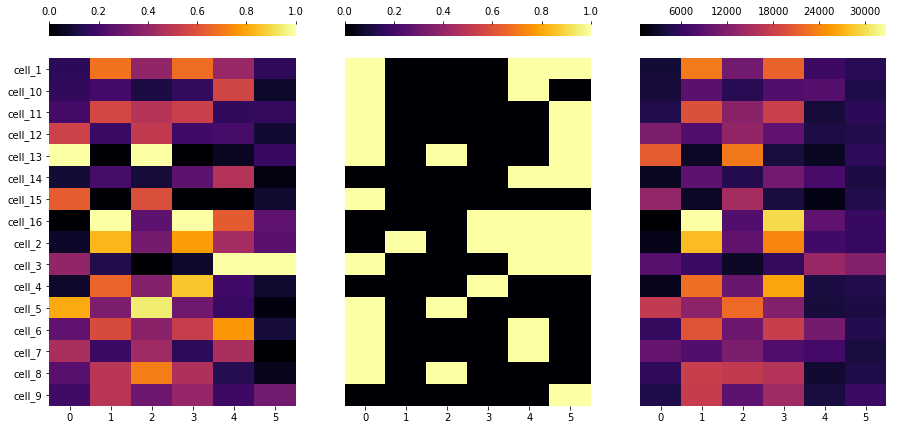

22


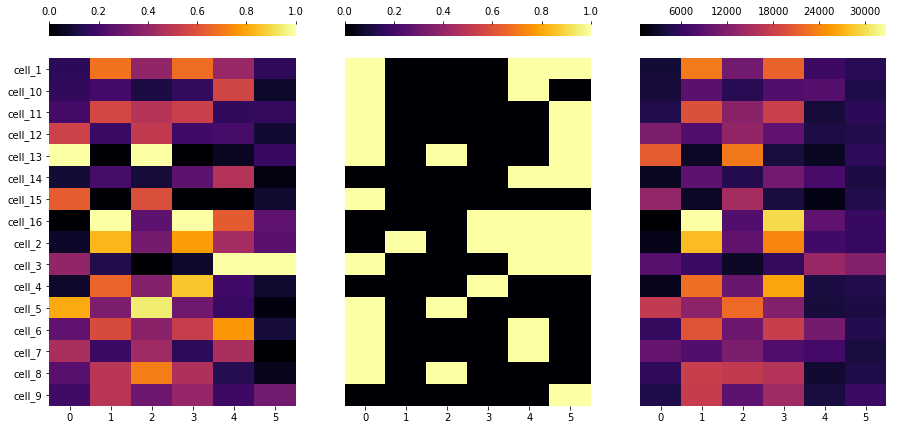

23


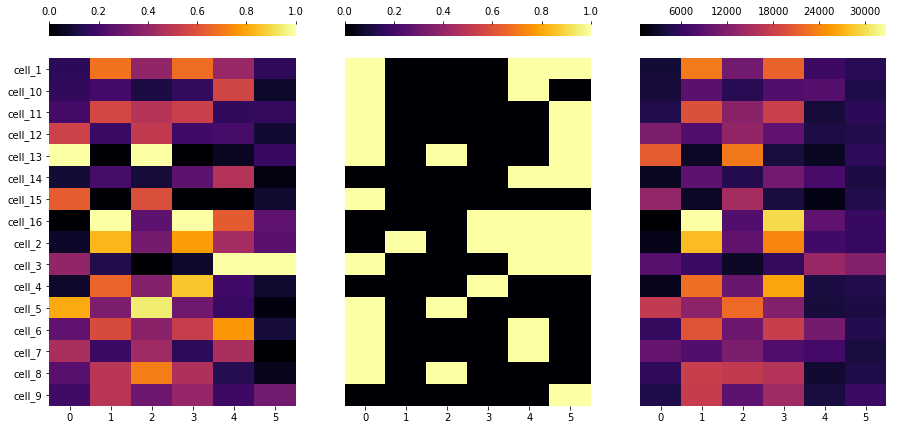

In [206]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
base = os.path.join(base_path,'Neuron_Results_SizeNorm_2','Results_1')
i=1
for I in range(100):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[i].drop(index='blank').copy()
        codebook_df = survivors[i].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)#,vmin=0,vmax=1)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0)#,vmax=50)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0,vmax=1)
        plt.show()
    except:
        break

0


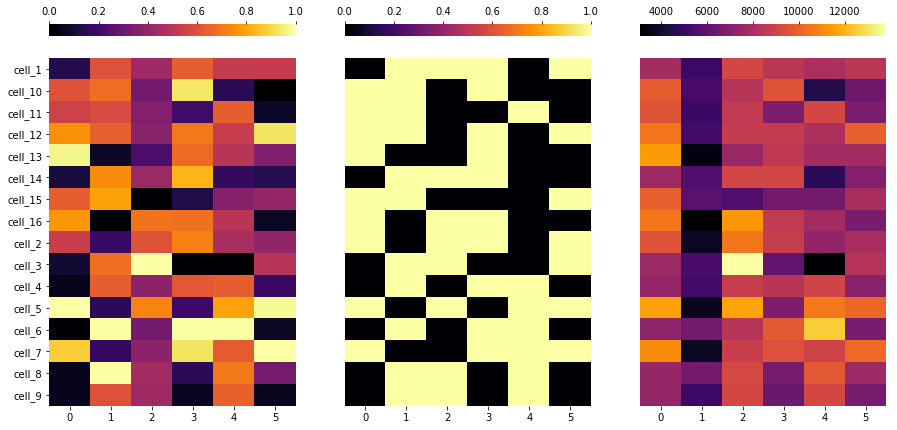

1


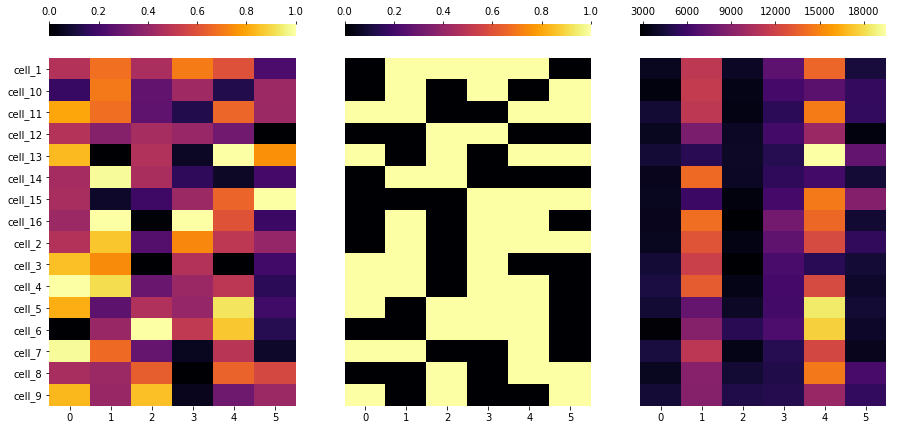

2


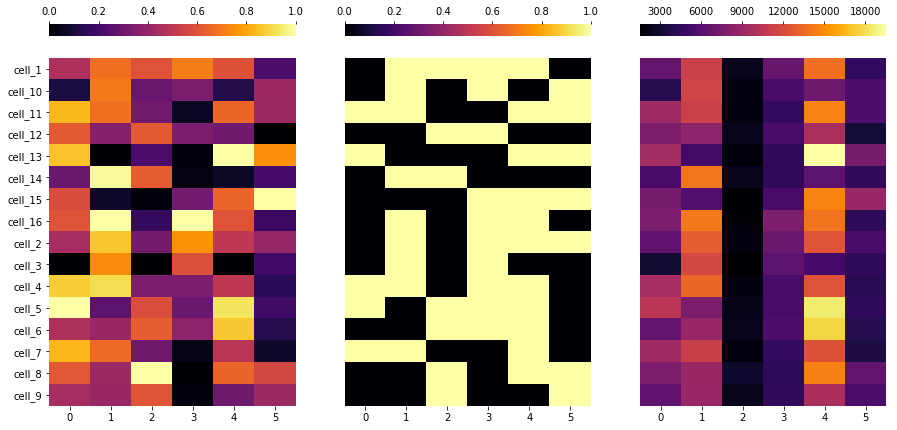

3


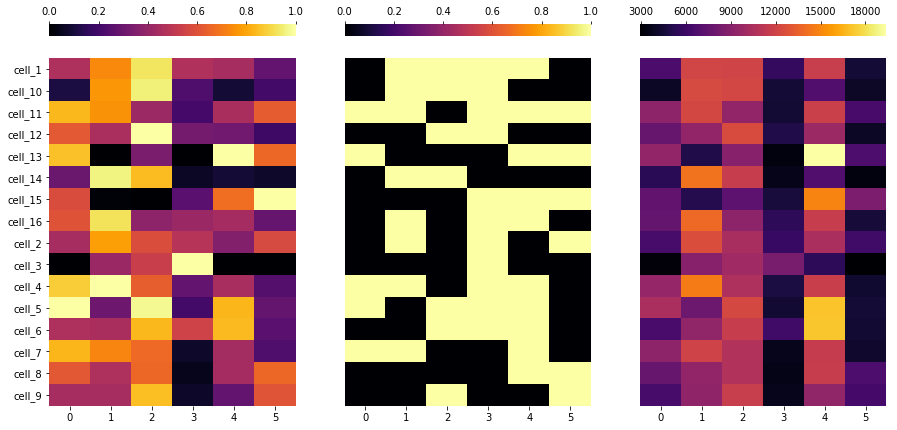

4


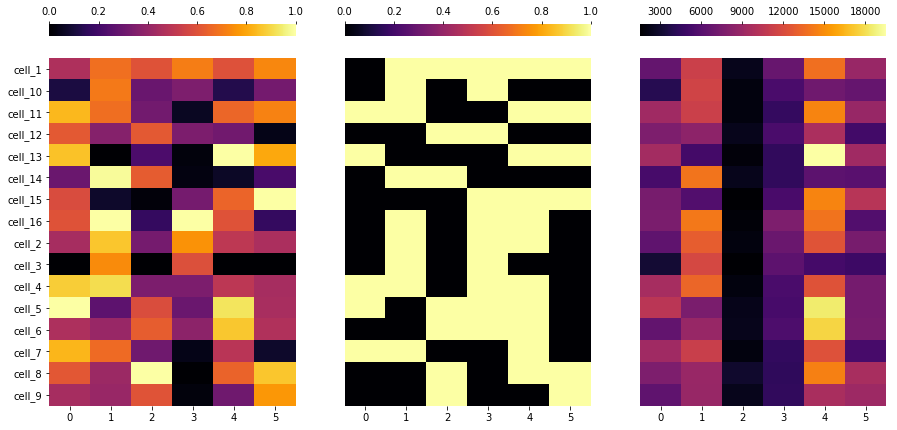

5


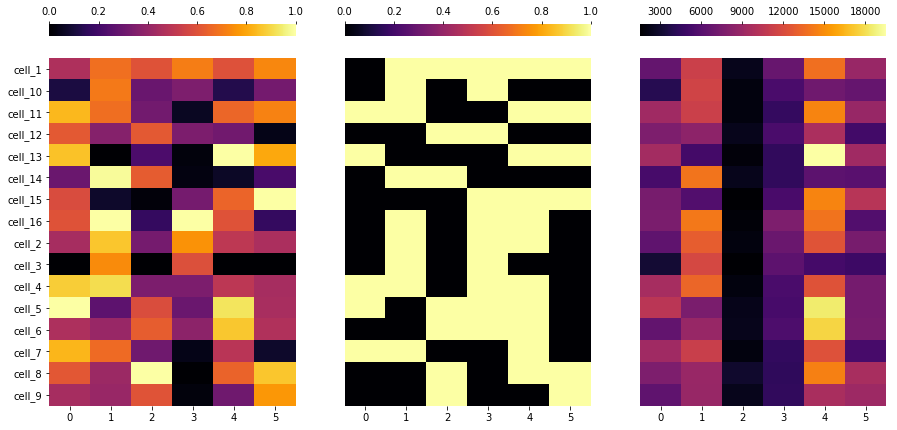

6


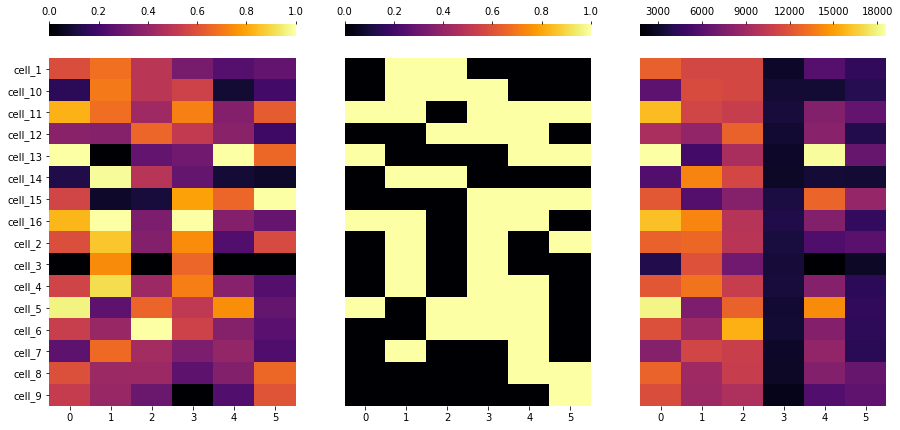

7


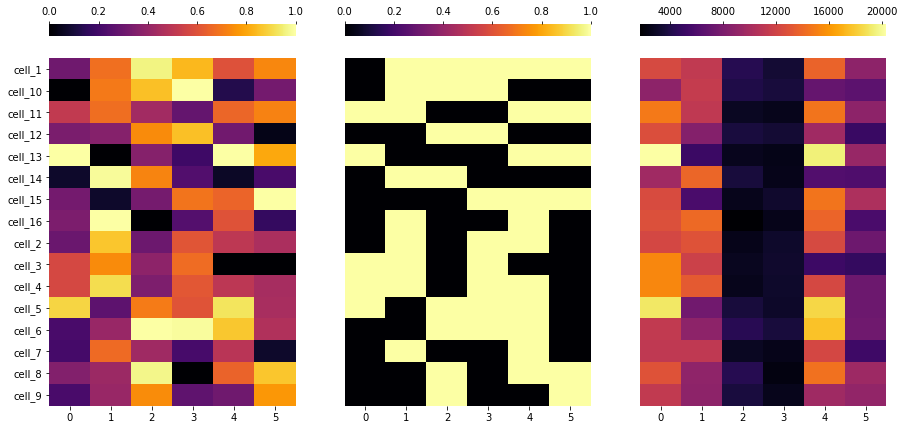

8


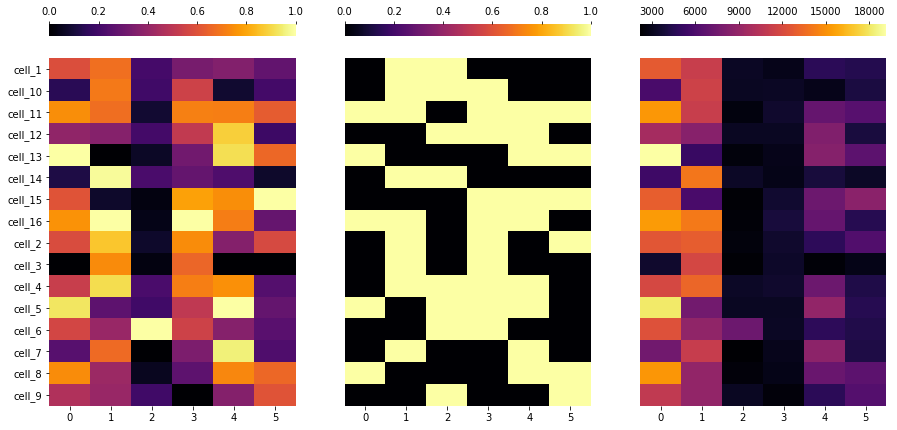

9


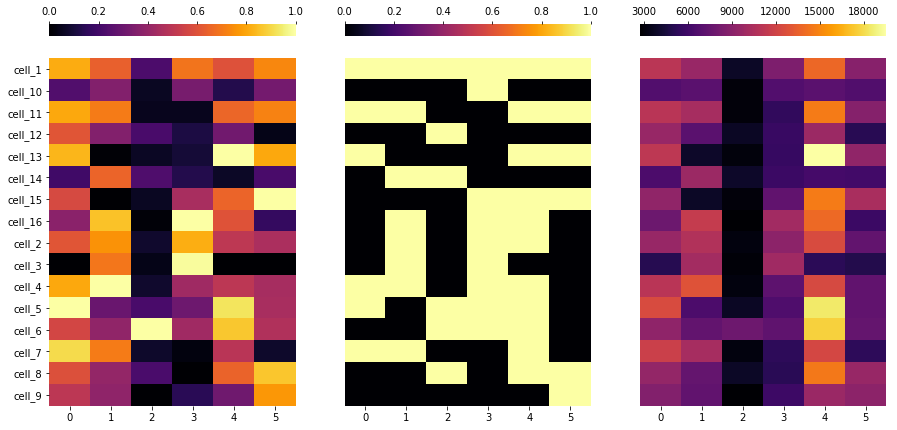

10


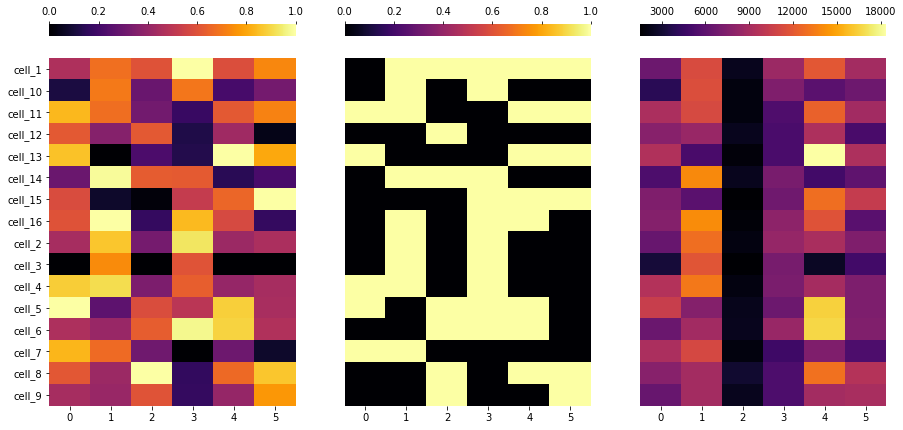

11


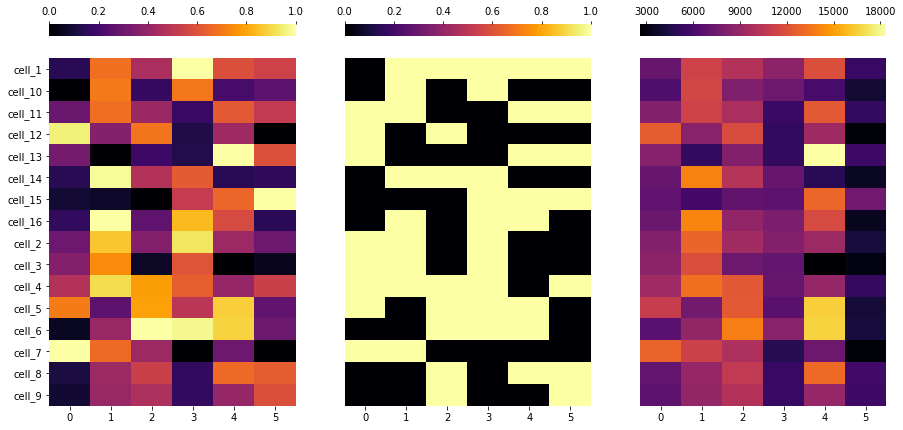

12


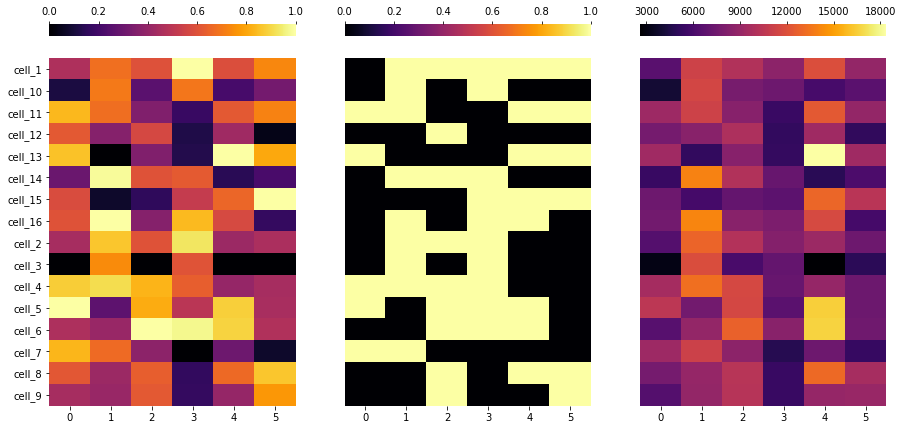

13


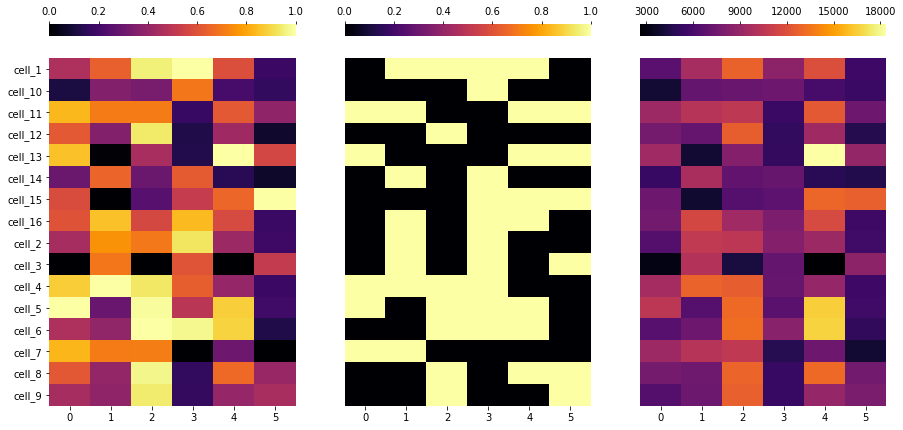

14


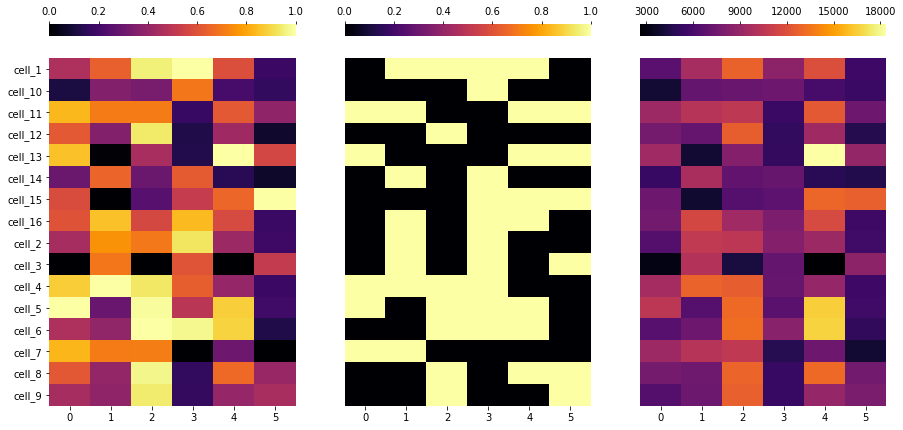

15


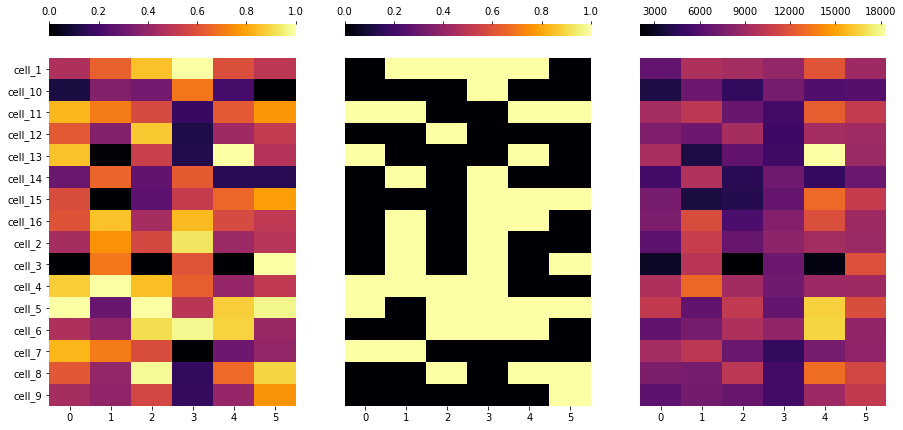

16


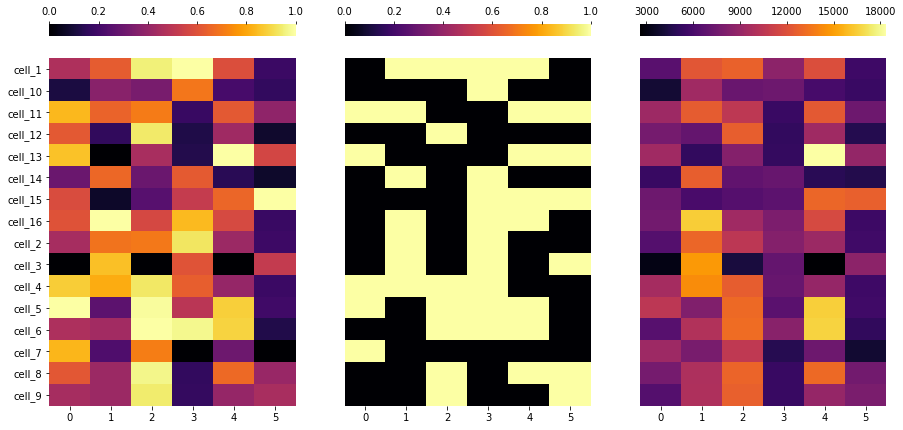

17


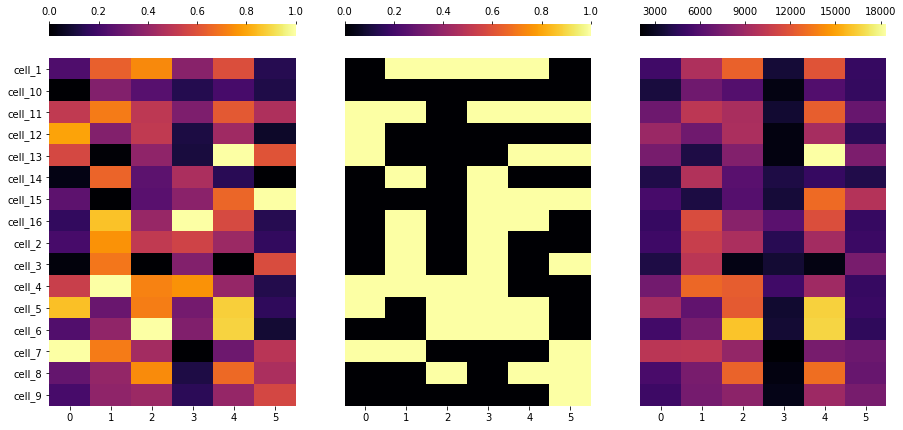

18


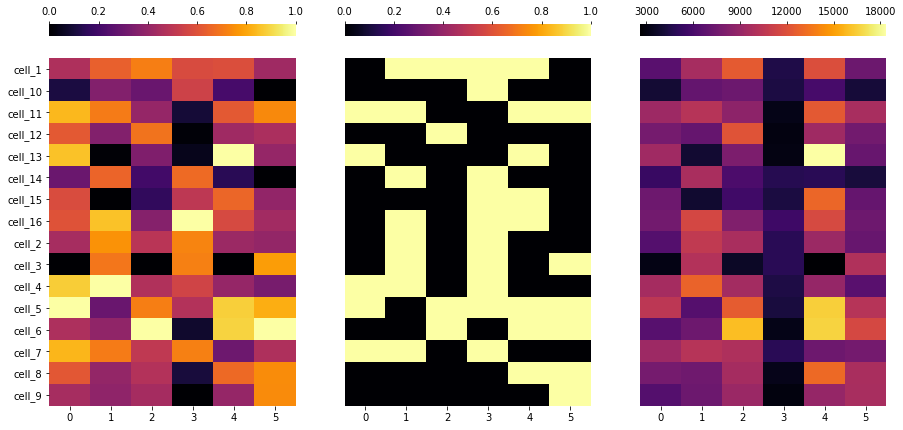

19


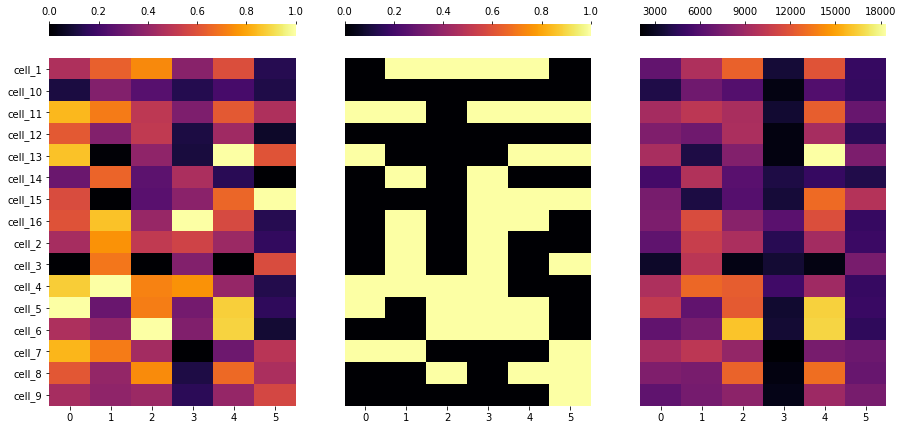

20


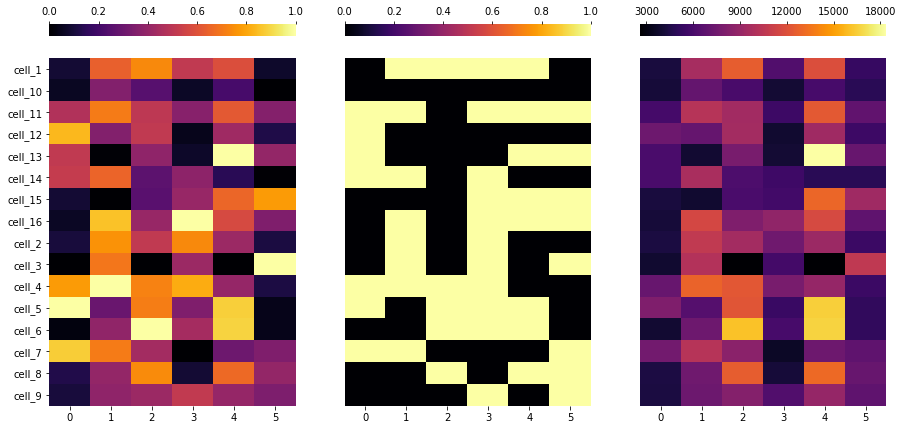

21


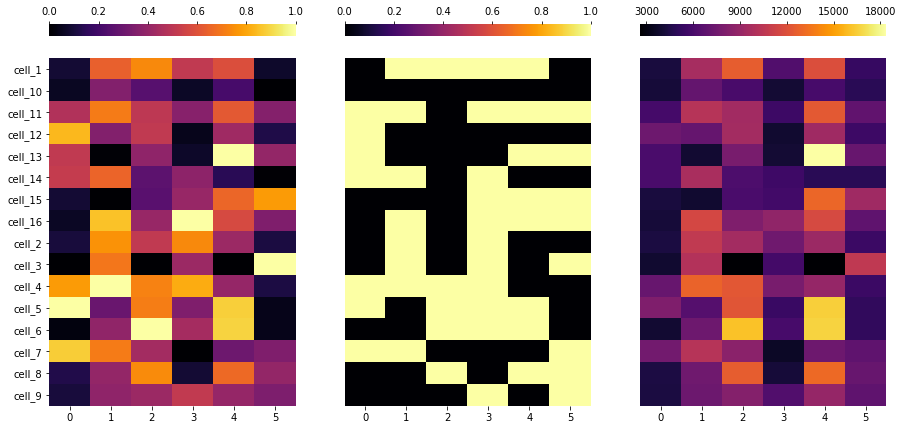

22


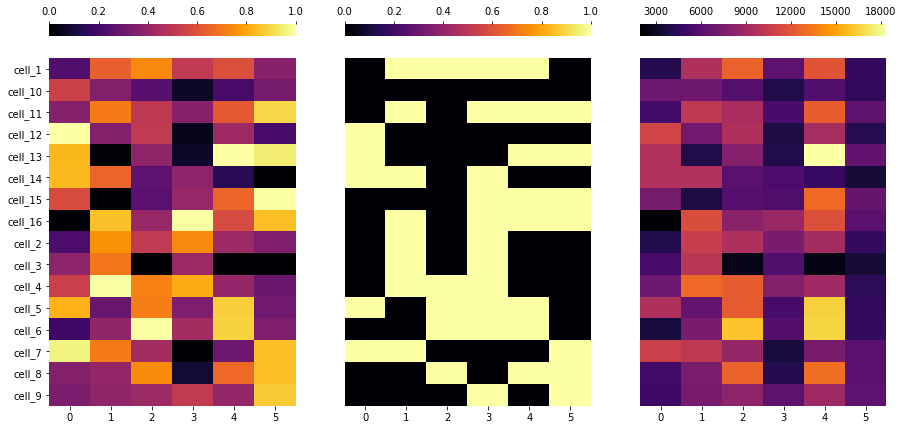

23


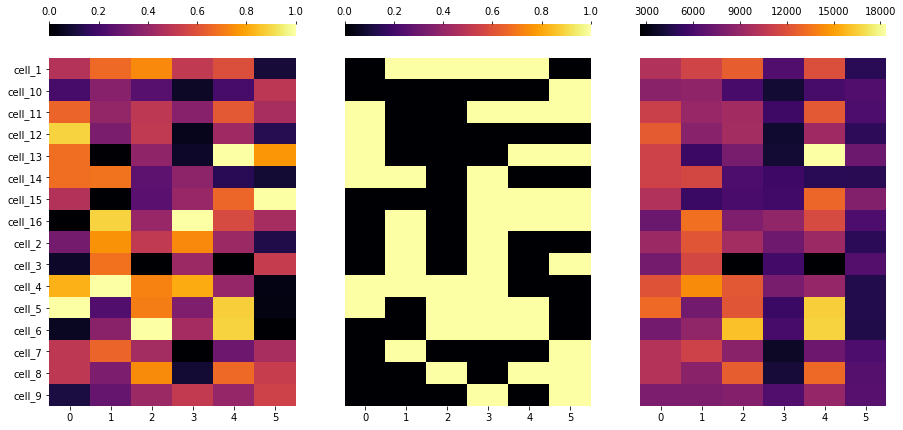

24


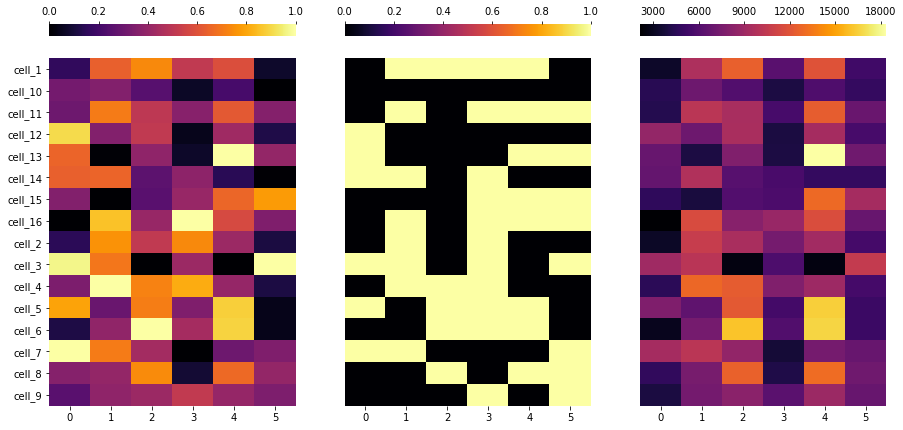

25


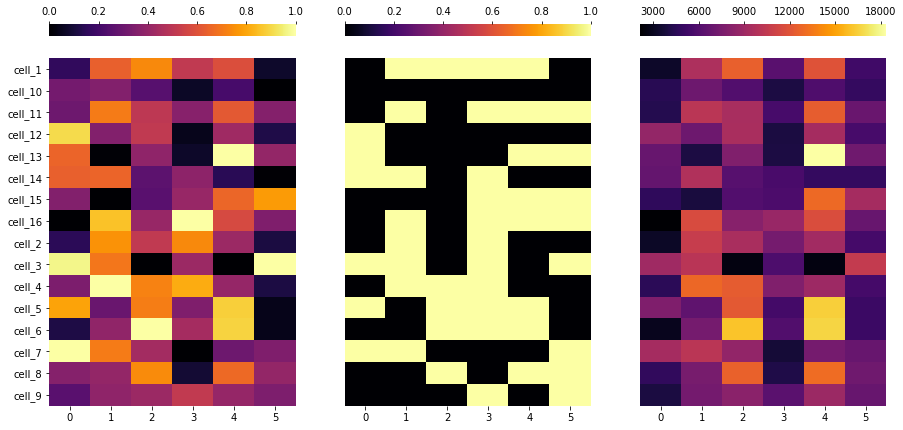

26


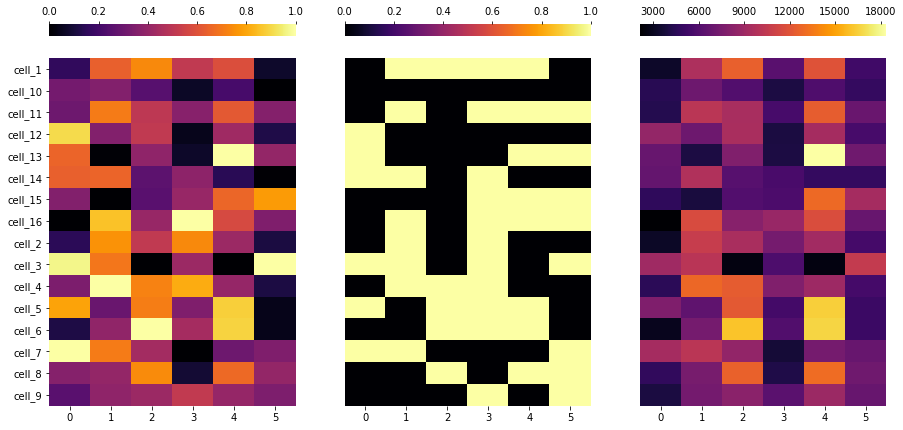

27


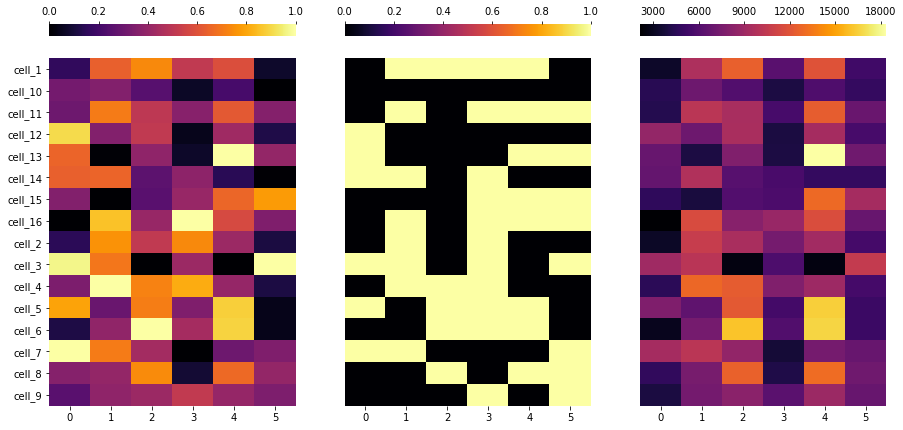

28


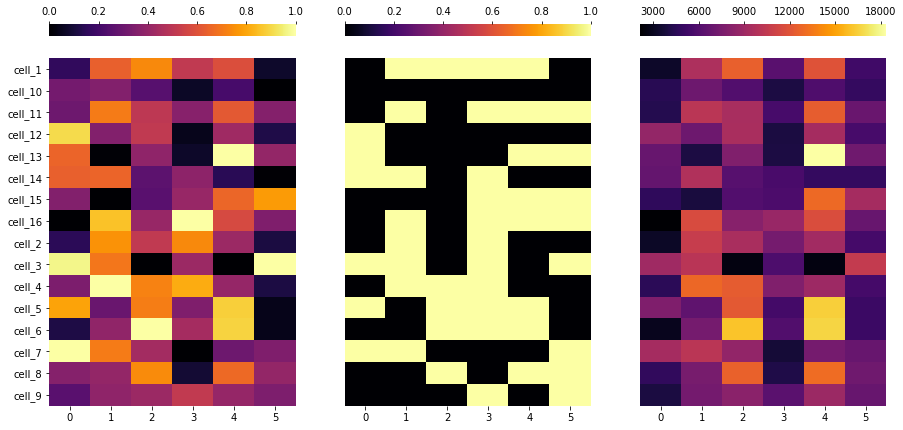

29


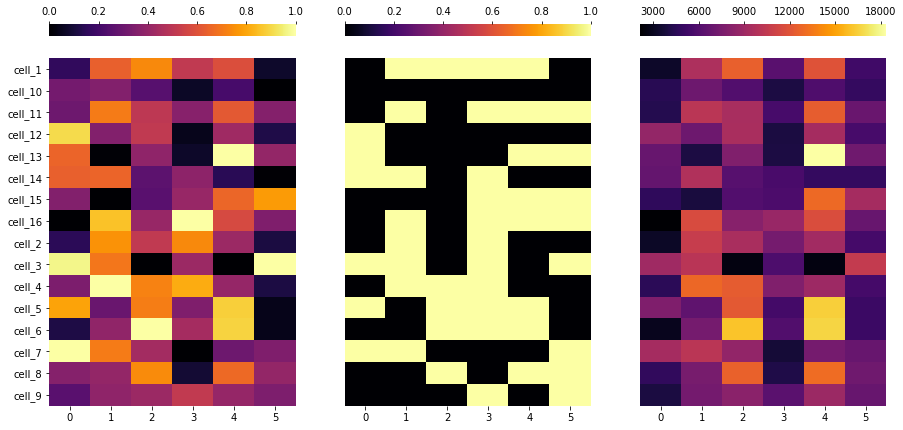

In [385]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
base = os.path.join(base_path,'Neuron_Results_SizeNorm_3','Results_2')
i=1
for I in range(100):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[i].drop(index='blank').copy()
        codebook_df = survivors[i].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)#,vmin=0,vmax=1)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0)#,vmax=50)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0,vmax=1)
        plt.show()
    except:
        break

0


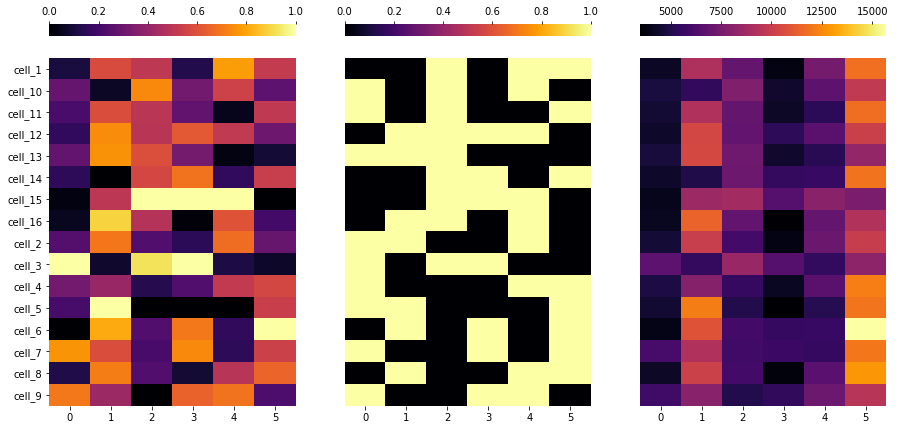

1


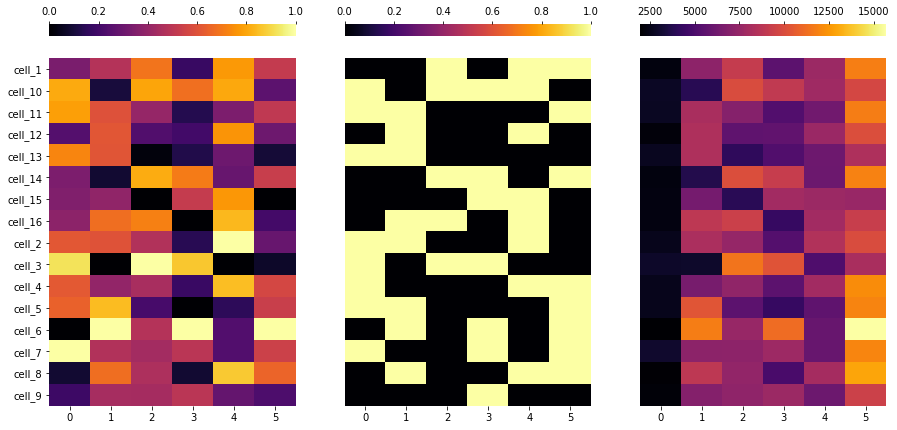

2


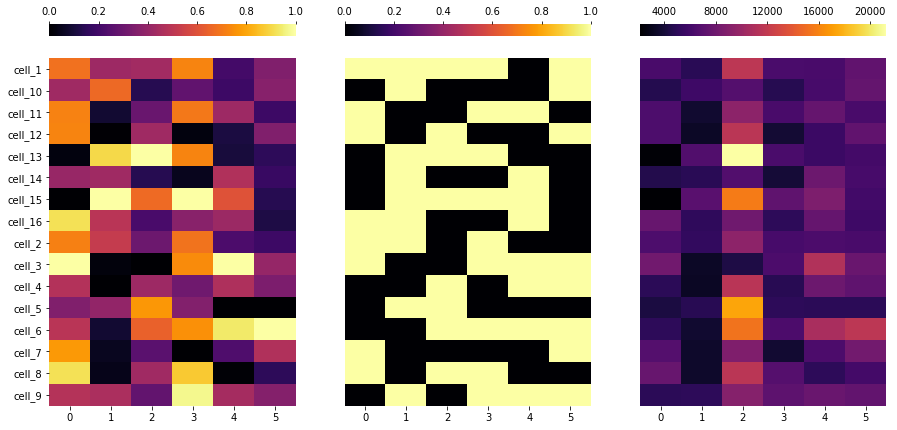

3


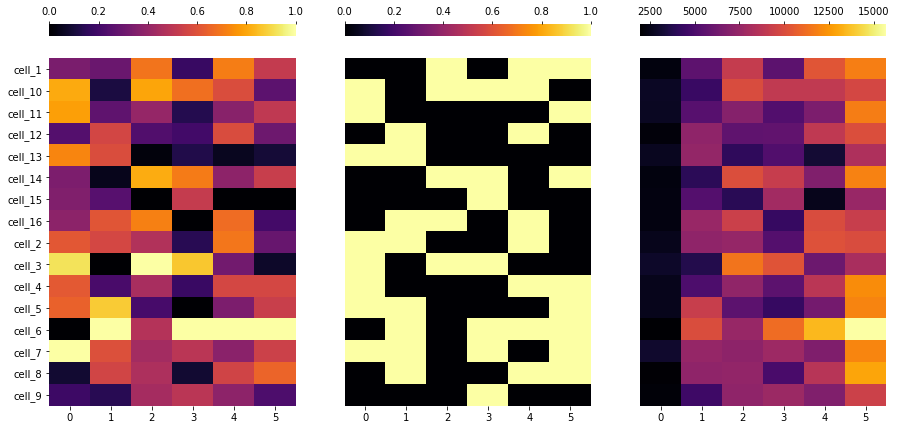

4


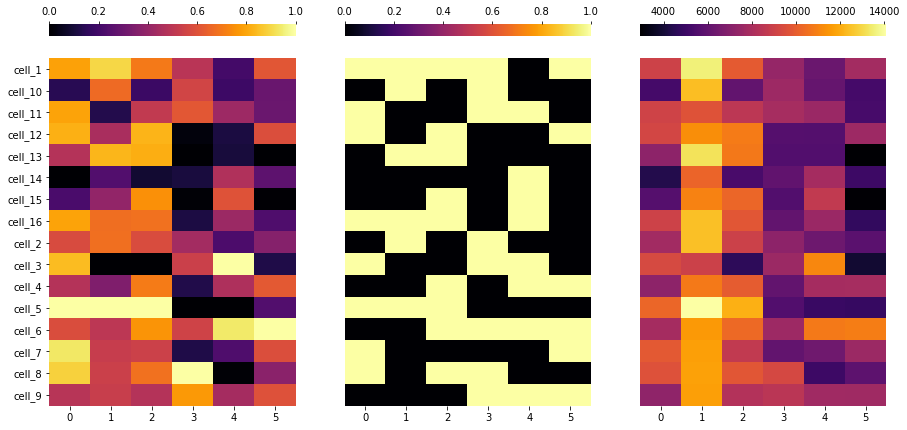

5


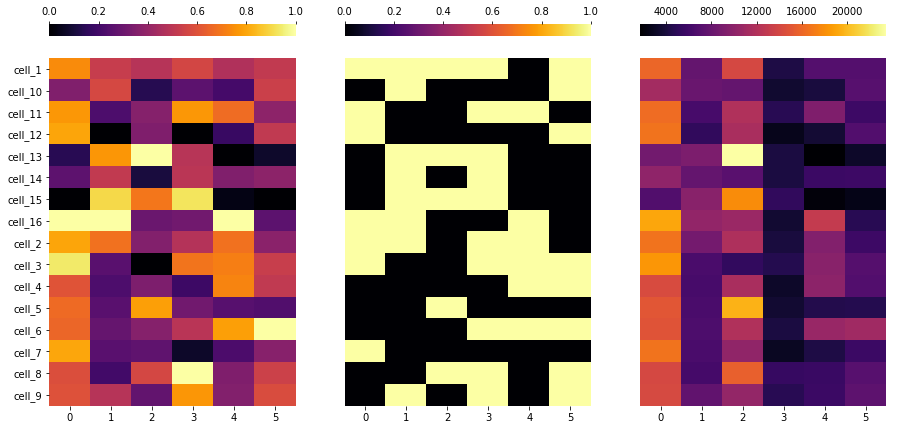

6


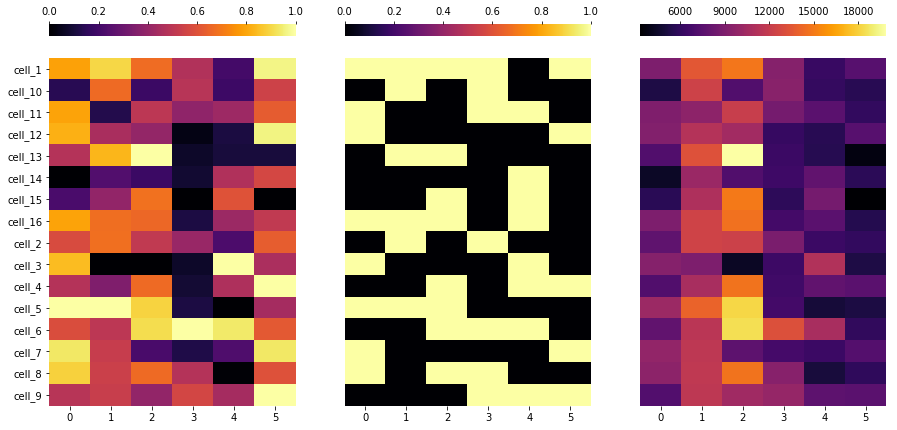

7


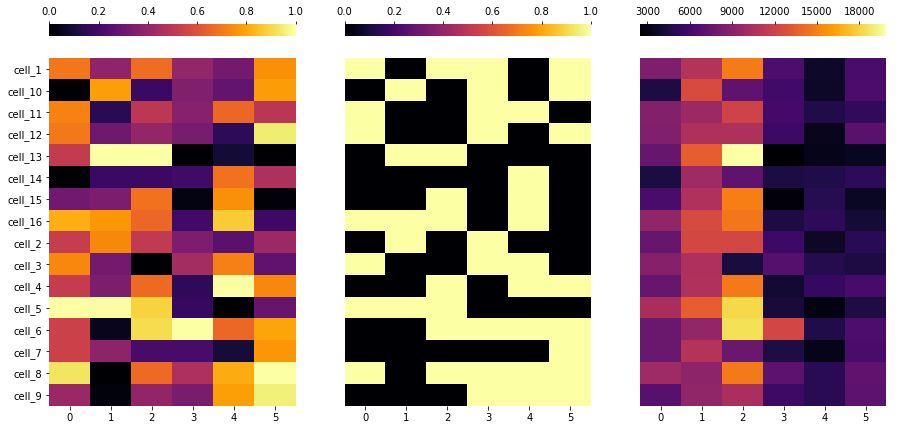

8


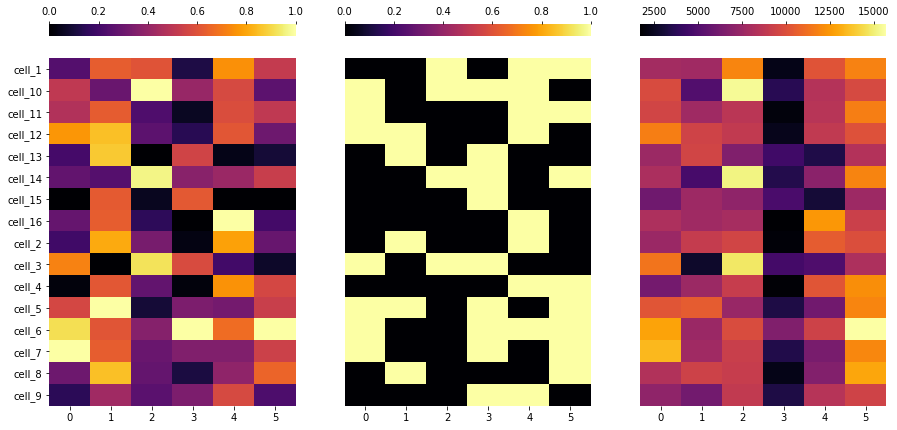

9


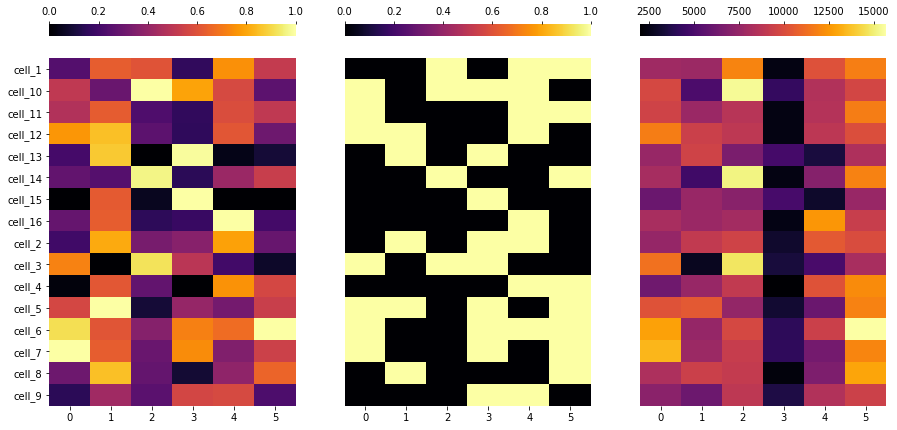

10


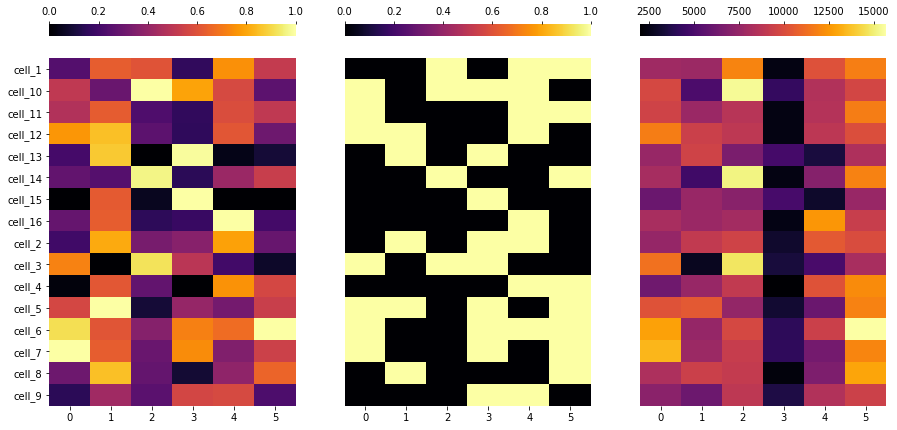

11


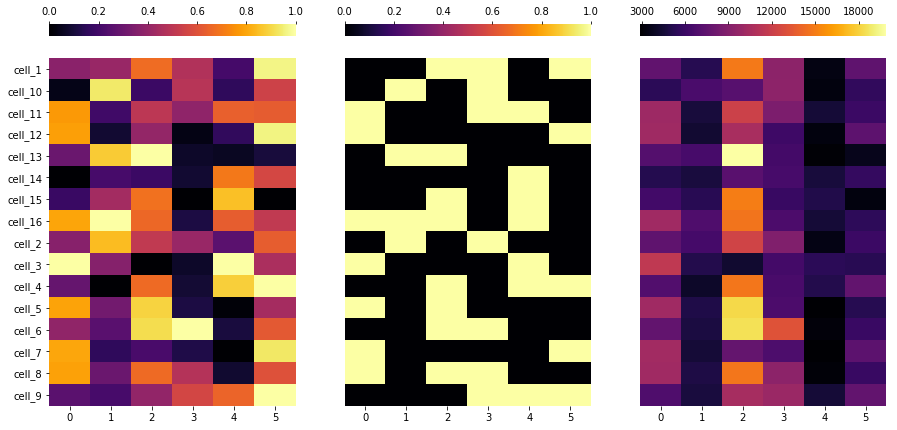

12


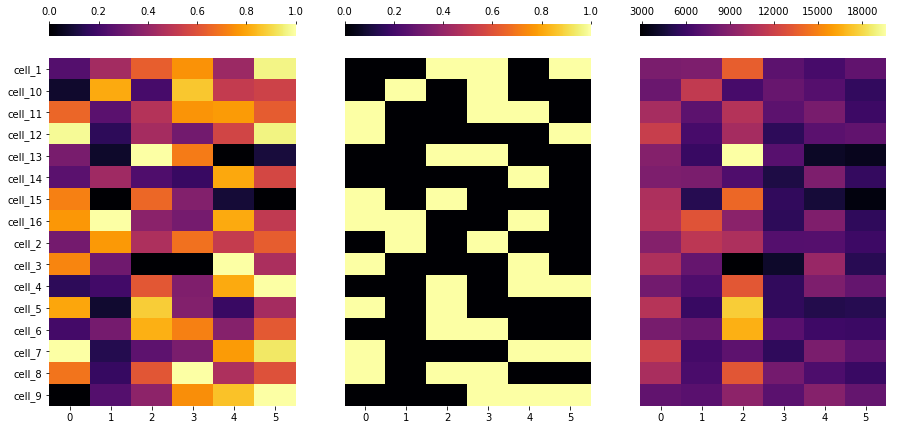

13


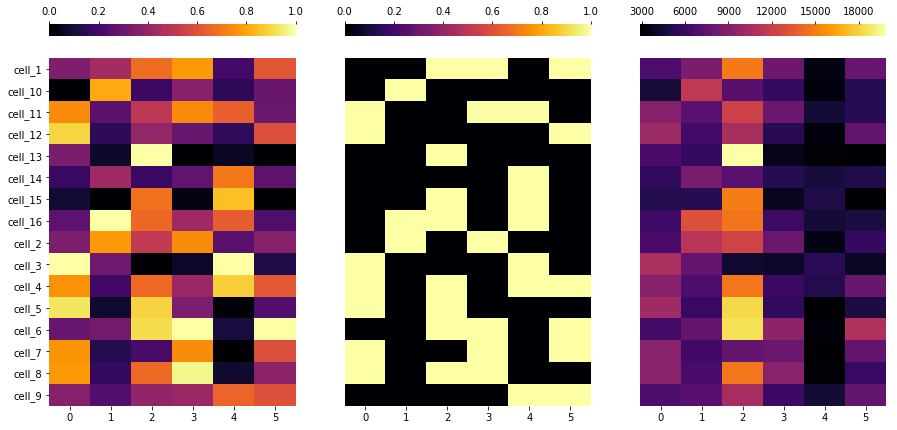

14


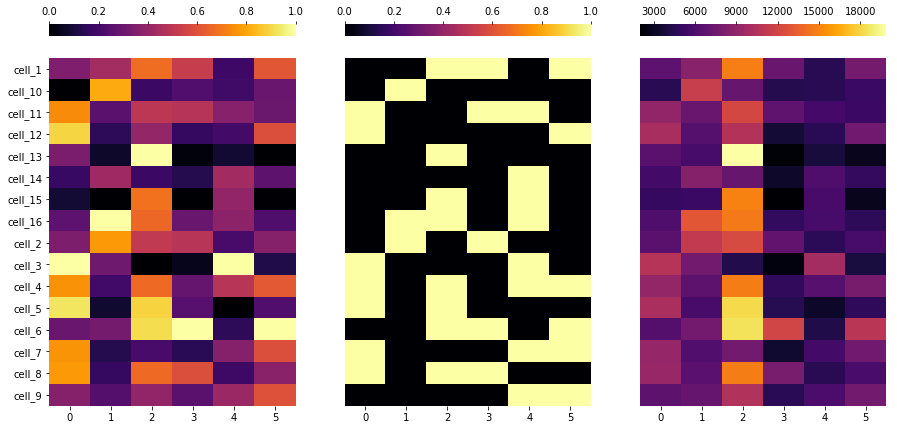

15


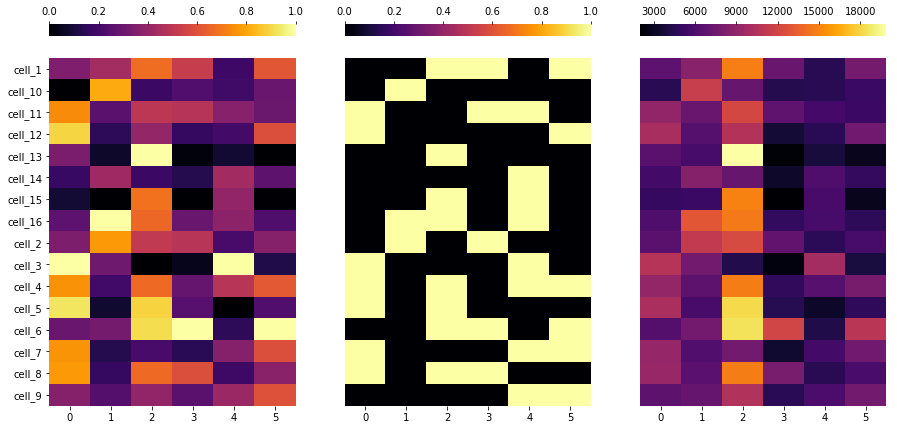

16


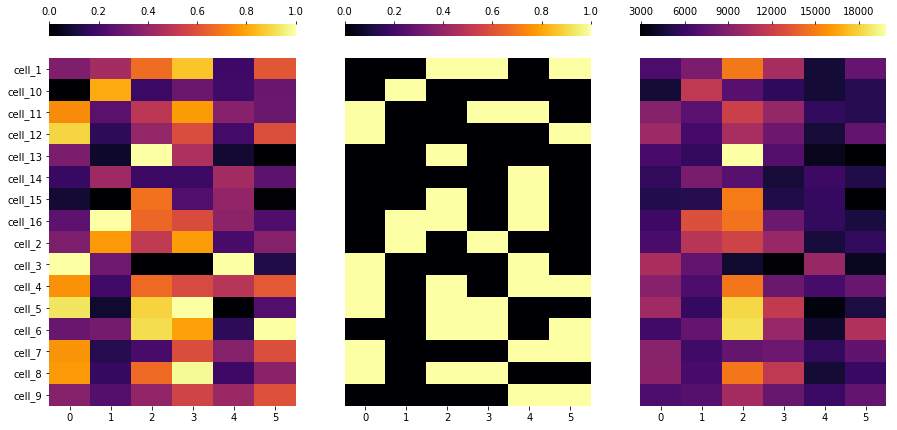

17


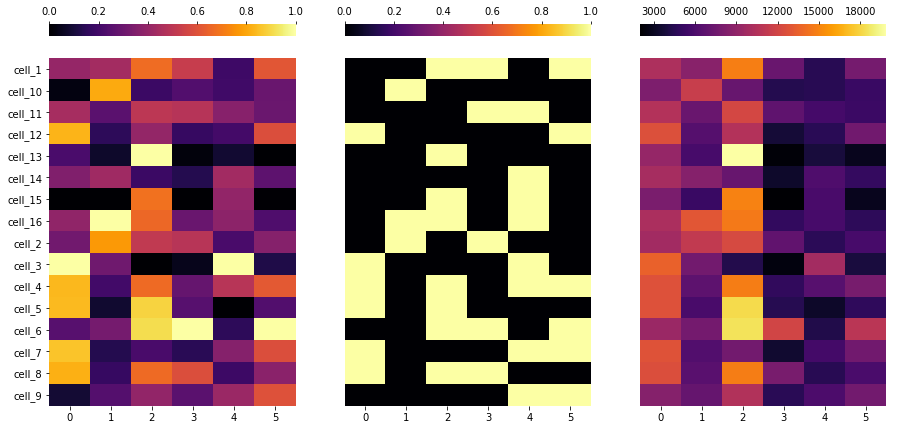

18


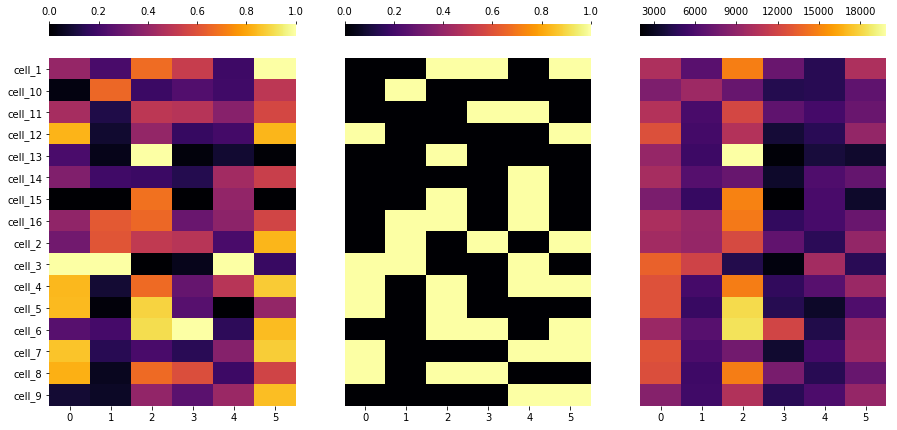

19


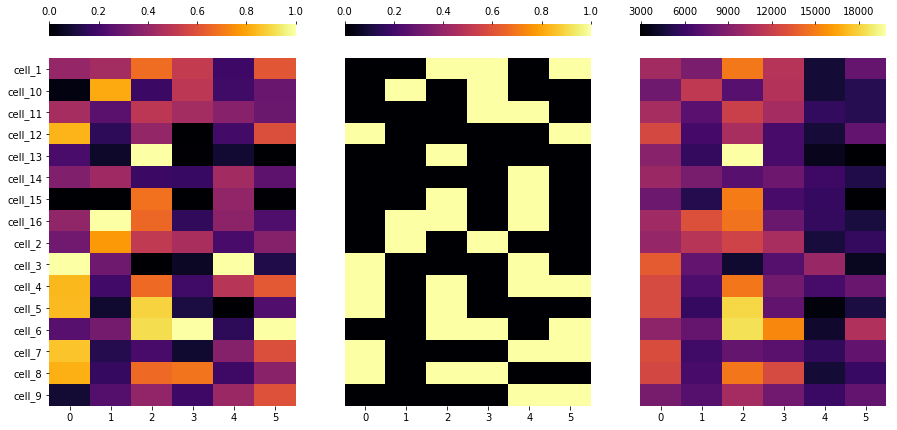

20


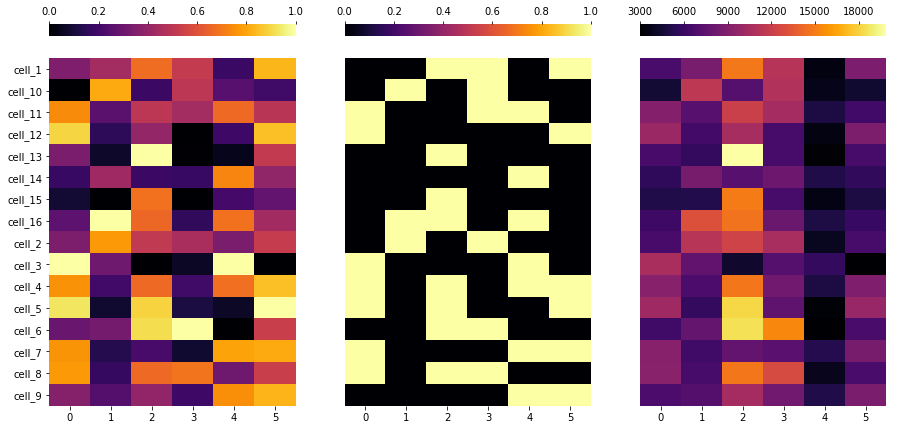

21


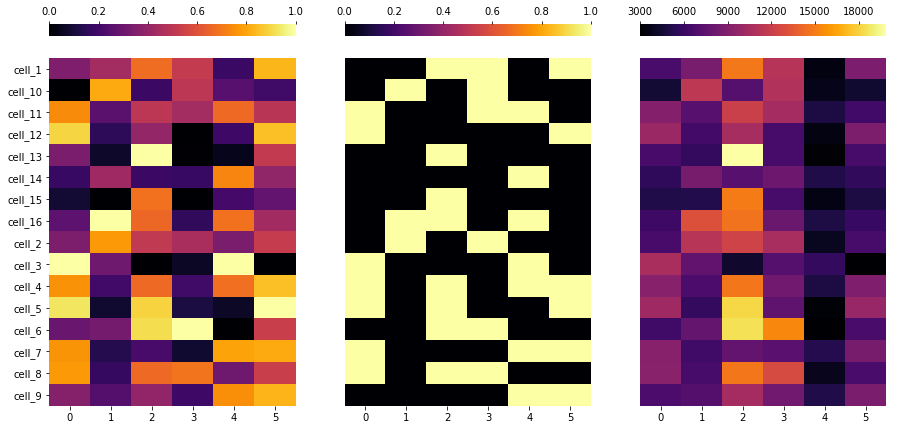

22


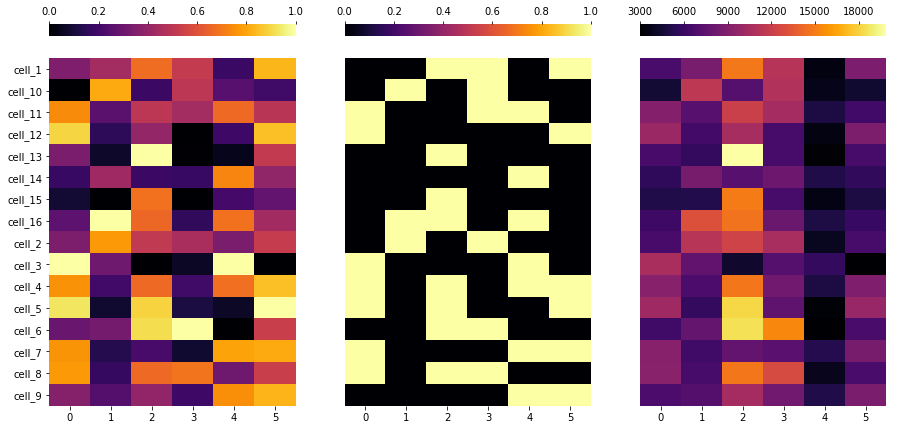

23


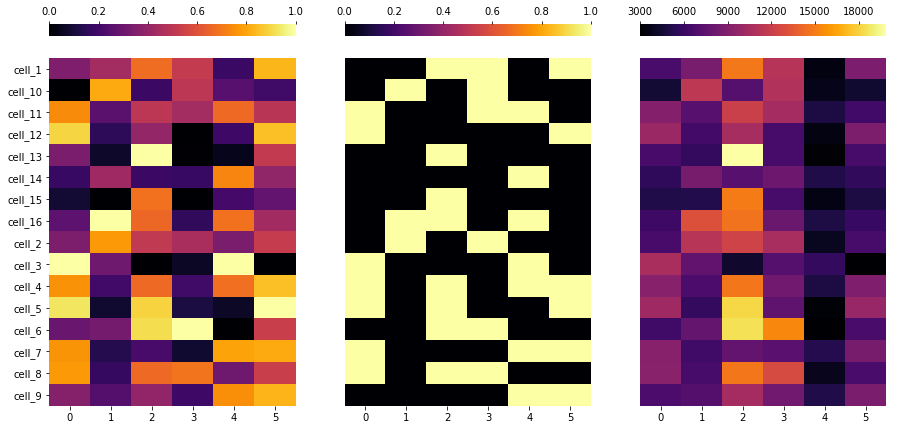

24


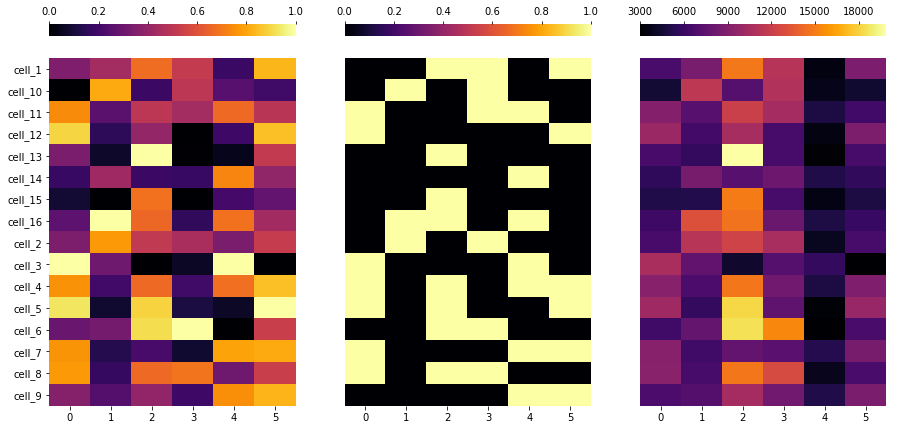

25


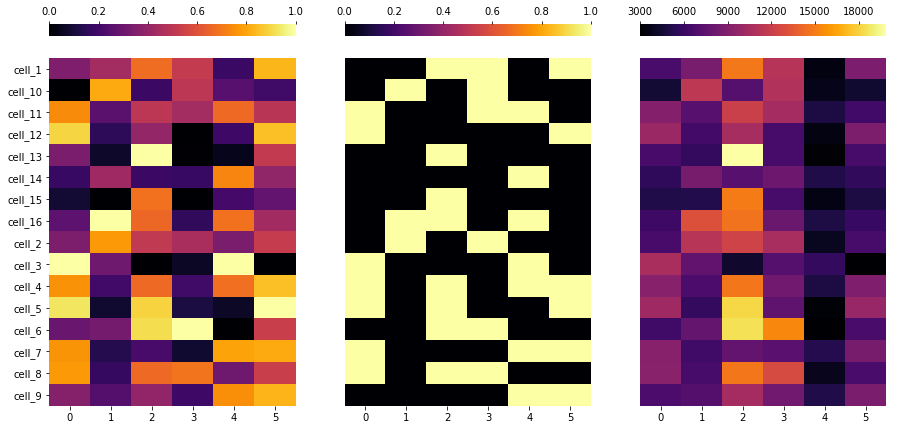

26


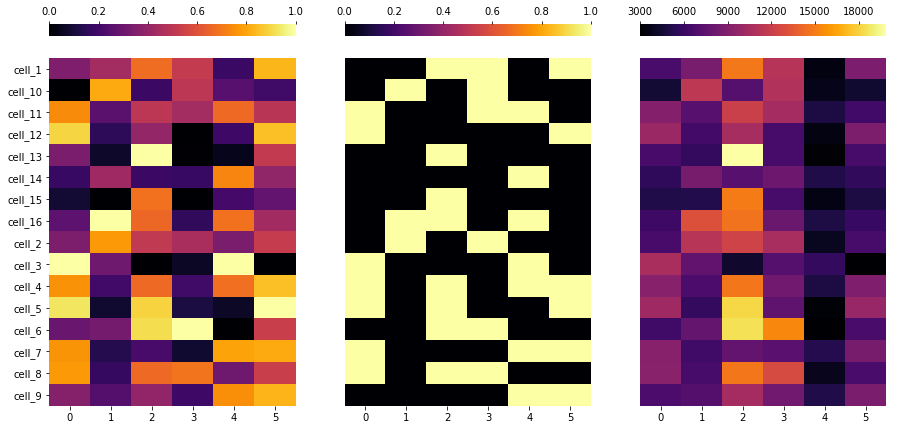

In [336]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
base = os.path.join(base_path,'Neuron_Results_SizeNorm_3','Results_1')
i=1
for I in range(100):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[i].drop(index='blank').copy()
        codebook_df = survivors[i].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)#,vmin=0,vmax=1)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0)#,vmax=50)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False)#,vmin=0,vmax=1)
        plt.show()
    except:
        break

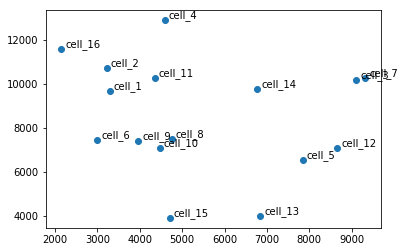

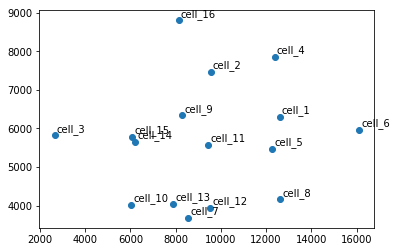

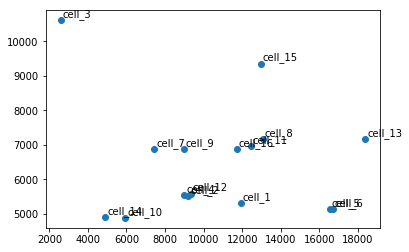

In [386]:
a=100
x = Readout_df[0]
y = Readout_df[1]
plt.scatter(x,y)
for i, txt in enumerate(Readout_df.index):
    plt.annotate(txt, (x[i]+a, y[i]+a))
plt.show()
x = Readout_df[2]
y = Readout_df[3]
plt.scatter(x,y)
for i, txt in enumerate(Readout_df.index):
    plt.annotate(txt, (x[i]+a, y[i]+a))
plt.show()
x = Readout_df[4]
y = Readout_df[5]
plt.scatter(x,y)
for i, txt in enumerate(Readout_df.index):
    plt.annotate(txt, (x[i]+a, y[i]+a))
plt.show()

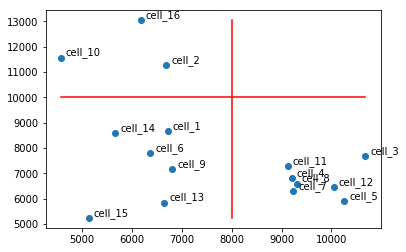

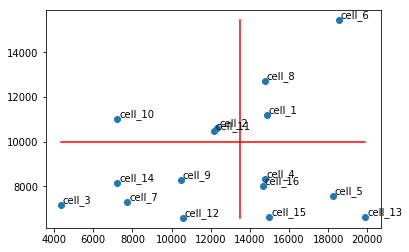

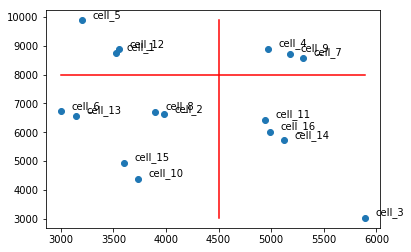

In [360]:
a=100
x = Readout_df[0]
y = Readout_df[1]
plt.scatter(x,y)
plt.plot([np.min(x),np.max(x)],[10000,10000],c='r')
plt.plot([8000,8000],[np.min(y),np.max(y)],c='r')
for i, txt in enumerate(Readout_df.index):
    plt.annotate(txt, (x[i]+a, y[i]+a))
plt.show()
x = Readout_df[2]
y = Readout_df[3]
plt.scatter(x,y)
plt.plot([np.min(x),np.max(x)],[10000,10000],c='r')
plt.plot([13500,13500],[np.min(y),np.max(y)],c='r')
for i, txt in enumerate(Readout_df.index):
    plt.annotate(txt, (x[i]+a, y[i]+a))
plt.show()
x = Readout_df[4]
y = Readout_df[5]
plt.scatter(x,y)
plt.plot([np.min(x),np.max(x)],[8000,8000],c='r')
plt.plot([4500,4500],[np.min(y),np.max(y)],c='r')
for i, txt in enumerate(Readout_df.index):
    plt.annotate(txt, (x[i]+a, y[i]+a))
plt.show()

In [249]:
gene_dict = {}
base = os.path.join(base_path,'Neuron_Results_SizeNorm_3')
for bit in codebook_df.columns:
    pos_cells = list(codebook_df[codebook_df[bit]==1].index)
    neg_cells = list(codebook_df[codebook_df[bit]!=1].index)
    cell_base = ''.join(i+'_' for i in sorted(pos_cells))
    genes = list(pd.read_csv(os.path.join(base,cell_base,'genes.csv'),header=None)[0])
    gene_dict[bit] = genes
    print(os.path.join(base,cell_base))

/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_SizeNorm_3/cell_11_cell_12_cell_3_cell_4_cell_5_cell_7_cell_8_
/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_SizeNorm_3/cell_10_cell_16_cell_2_
/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_SizeNorm_3/cell_1_cell_13_cell_15_cell_16_cell_4_cell_5_cell_6_cell_8_
/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_SizeNorm_3/cell_1_cell_10_cell_11_cell_2_cell_6_cell_8_
/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_SizeNorm_3/cell_11_cell_14_cell_16_cell_3_cell_4_cell_7_cell_9_
/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_SizeNorm_3/cell_1_cell_12_cell_4_cell_5_cell_7_cell_9_


In [250]:
MeA_Neurons_DGE_cluster_data = pd.read_csv(os.path.join(base_path,'MeA_Neurons_DGE_cluster_data.csv'),index_col=0)
MeA_Neurons_DGE_cluster_data_SizeNorm = (10**5)*(MeA_Neurons_DGE_cluster_data/np.sum(MeA_Neurons_DGE_cluster_data,axis=0))
MeA_Neurons_DGE_cluster_data_SizeNorm.head()

E40_GGATAGTCCAGA  E40_TAACGACATTCG  E40_CGTTCGTTCGAC  \
Npffr2                 0.000000               0.0               0.0   
Ibsp                   0.000000               0.0               0.0   
Tnmd                   0.000000               0.0               0.0   
D830015G02Rik          3.574492               0.0               0.0   
Neurod1                0.000000               0.0               0.0   

               E40_CTGCAGTATTTT  E40_CCTATGGGGATA  E40_TAGCGATTCTTG  \
Npffr2                      0.0          0.000000               0.0   
Ibsp                        0.0          0.000000               0.0   
Tnmd                        0.0          8.642295               0.0   
D830015G02Rik               0.0          0.000000               0.0   
Neurod1                     0.0          0.000000               0.0   

               E40_AATGACGTATAG  E40_AGTATCTTTATT  E40_GCTAGAACTTCG  \
Npffr2                 0.000000               0.0          0.000000   
Ibsp                   0.000000               0.0         41.296717   
Tnmd                   9.347542               0.0          0.000000   
D830015G02Rik          0.000000               0.0          0.000000   
Neurod1                0.000000               0.0          0.000000   

               E40_CTGCACGACACA        ...         E51_ACGGGCAGGTCA  \
Npffr2                      0.0        ...                      0.0   
Ibsp                        0.0        ...                      0.0   
Tnmd                        0.0        ...                      0.0   
D830015G02Rik               0.0        ...                      0.0   
Neurod1                     0.0        ...                      0.0   

               E51_ATTGACCCTCGA  E51_TGCAATCATTTA  E51_TGAAGCGGGCCA  \
Npffr2                      0.0               0.0               0.0   
Ibsp                        0.0               0.0               0.0   
Tnmd                        0.0               0.0               0.0   
D830015G02Rik               0.0               0.0               0.0   
Neurod1                     0.0               0.0               0.0   

               E51_GGAGTCGCCTAG  E51_AGATCTCACCTG  E51_GCGGTCGCGTTA  \
Npffr2                      0.0               0.0         671.14094   
Ibsp                        0.0               0.0           0.00000   
Tnmd                        0.0               0.0           0.00000   
D830015G02Rik               0.0               0.0           0.00000   
Neurod1                     0.0               0.0           0.00000   

               E51_GTCTTTGCGAGT  E51_CATGAAGATGCC  E51_CGATCGAGATAA  
Npffr2                      0.0               0.0               0.0  
Ibsp                        0.0               0.0               0.0  
Tnmd                        0.0               0.0               0.0  
D830015G02Rik               0.0               0.0               0.0  
Neurod1                     0.0               0.0               0.0  

[5 rows x 10123 columns]

In [256]:
MeA_Neurons_DGE_cluster_cluster = pd.read_csv(os.path.join(base_path,'MeA_Neurons_DGE_cluster_cluster.csv'),index_col=0)
info_df_Neuron = pd.DataFrame(index=MeA_Neurons_DGE_cluster_data.columns)
info_df_Neuron['cell_types'] = ['cell_'+str(i) for i in list(MeA_Neurons_DGE_cluster_cluster['x'])]
info_df_Neuron['cells'] = info_df_Neuron.index
info_df_Neuron['barcode'] = [i.split('_')[1] for i in info_df_Neuron['cells']]
info_df_Neuron.head()

cell_types             cells       barcode
E40_GGATAGTCCAGA    cell_14  E40_GGATAGTCCAGA  GGATAGTCCAGA
E40_TAACGACATTCG    cell_10  E40_TAACGACATTCG  TAACGACATTCG
E40_CGTTCGTTCGAC    cell_10  E40_CGTTCGTTCGAC  CGTTCGTTCGAC
E40_CTGCAGTATTTT    cell_10  E40_CTGCAGTATTTT  CTGCAGTATTTT
E40_CCTATGGGGATA     cell_2  E40_CCTATGGGGATA  CCTATGGGGATA

In [257]:
info_df_Neuron[info_df_Neuron.cell_types.isin(pos_cells)].head()

cell_types             cells       barcode
E40_AGTATCTTTATT    cell_12  E40_AGTATCTTTATT  AGTATCTTTATT
E40_CTGCACGACACA     cell_7  E40_CTGCACGACACA  CTGCACGACACA
E40_ACCGTACTATTT     cell_7  E40_ACCGTACTATTT  ACCGTACTATTT
E40_TGCGTATATTTN     cell_5  E40_TGCGTATATTTN  TGCGTATATTTN
E40_ACCAGCGTGGTG     cell_7  E40_ACCAGCGTGGTG  ACCAGCGTGGTG

In [267]:
x_pos_cells

['cell_11', 'cell_14', 'cell_16', 'cell_3', 'cell_4', 'cell_7', 'cell_9']

In [268]:
Gene_Matrix_Avg = pickle.load(open(os.path.join(base_path,'Gene_Matrix_Avg_Neuron_SizeNorm.pkl'),'rb'))
Gene_Matrix_std = pickle.load(open(os.path.join(base_path,'Gene_Matrix_std_Neuron_SizeNorm.pkl'),'rb'))
Gene_Matrix_Avg.head()

cell_1    cell_2    cell_3    cell_4    cell_5    cell_6  \
Npffr2         1.666554  0.000000  0.000000  0.000000  1.860573  0.000000   
Ibsp           1.205381  0.000000  0.000000  0.000000  0.773888  0.136964   
Tnmd           0.936987  1.376527  0.000000  0.551968  0.238211  0.000000   
D830015G02Rik  0.286076  0.119243  4.812169  0.000000  0.253997  0.000000   
Neurod1        0.765070  2.530700  0.000000  2.871058  3.135964  0.000000   

                  cell_7     cell_8    cell_9   cell_10    cell_11  cell_12  \
Npffr2          0.000000  23.481261  4.280033  0.369712   0.000000      0.0   
Ibsp            0.000000   0.000000  0.148273  1.329600   0.000000      0.0   
Tnmd            0.000000   0.000000  0.000000  0.043084   0.000000      0.0   
D830015G02Rik   0.300942   0.000000  0.000000  0.021066   0.000000      0.0   
Neurod1        13.778466   0.000000  8.326854  6.195791  13.435835      0.0   

                cell_13   cell_14    cell_15   cell_16  
Npffr2         0.000000  0.000000   0.000000  0.000000  
Ibsp           0.000000  0.000000   0.000000  5.039053  
Tnmd           0.375375  0.000000   0.000000  0.000000  
D830015G02Rik  5.690222  0.018331   0.000000  0.000000  
Neurod1        2.503243  1.576729  25.185737  0.000000

In [319]:
pos_cells = y_pos_cells
neg_cells = [i for i in Gene_Matrix_Avg.columns if not i in pos_cells]
signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
signal_df['pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
signal_df['neg'] = np.max(Gene_Matrix_Avg[neg_cells],axis=1)
signal_df['pos_std'] = np.max(Gene_Matrix_std[pos_cells],axis=1)
signal_df['neg_std'] = np.max(Gene_Matrix_std[neg_cells],axis=1)
signal_df['fold'] = signal_df['pos']/signal_df['neg']
signal_df['difference'] = signal_df['pos']-signal_df['neg']
signal_df['value'] = signal_df['difference']/(signal_df['pos_std']+signal_df['neg_std'])
signal_df = signal_df.sort_values(by='value',ascending=False)
signal_df.head()

pos         neg     pos_std     neg_std         fold  \
Ndnf           1312.488103   19.787001  775.181371   99.618799    66.330825   
Nhlh2           208.880543    1.424015  251.163008   24.336169   146.684273   
Trp73           163.733224    0.040263  246.709582    1.602949  4066.602788   
Atp1a3         1570.474448  567.729630  959.448731  596.046043     2.766237   
1500016L03Rik   199.340060    0.065232  311.582910    2.008579  3055.852105   

                difference     value  
Ndnf           1292.701102  1.477710  
Nhlh2           207.456529  0.753021  
Trp73           163.692961  0.659222  
Atp1a3         1002.744819  0.644647  
1500016L03Rik   199.274827  0.635460

In [320]:
signal_df = signal_df.sort_values(by='difference',ascending=False)
signal_df.head()

pos          neg      pos_std      neg_std       fold  \
Snhg11  5495.145529  4125.400341  2732.901342  2475.102572   1.332027   
Ndnf    1312.488103    19.787001   775.181371    99.618799  66.330825   
Atp1a3  1570.474448   567.729630   959.448731   596.046043   2.766237   
Gabra1  1030.924491   404.418262   773.160326   698.401722   2.549154   
Cck     1448.559263   854.316399  1003.677813  1086.714891   1.695577   

         difference     value  
Snhg11  1369.745188  0.263008  
Ndnf    1292.701102  1.477710  
Atp1a3  1002.744819  0.644647  
Gabra1   626.506229  0.425742  
Cck      594.242864  0.284273

In [324]:
signal_df = signal_df.sort_values(by='fold',ascending=False)
signal_df[signal_df.fold!=np.inf].head()

pos       neg     pos_std    neg_std         fold  \
Trp73          163.733224  0.040263  246.709582   1.602949  4066.602788   
1500016L03Rik  199.340060  0.065232  311.582910   2.008579  3055.852105   
Dsp            123.319448  0.752899  326.193059  25.041166   163.792768   
Gm15751         51.389161  0.320242  142.918215   6.759798   160.469698   
Nhlh2          208.880543  1.424015  251.163008  24.336169   146.684273   

               difference     value  
Trp73          163.692961  0.659222  
1500016L03Rik  199.274827  0.635460  
Dsp            122.566549  0.348960  
Gm15751         51.068919  0.341192  
Nhlh2          207.456529  0.753021

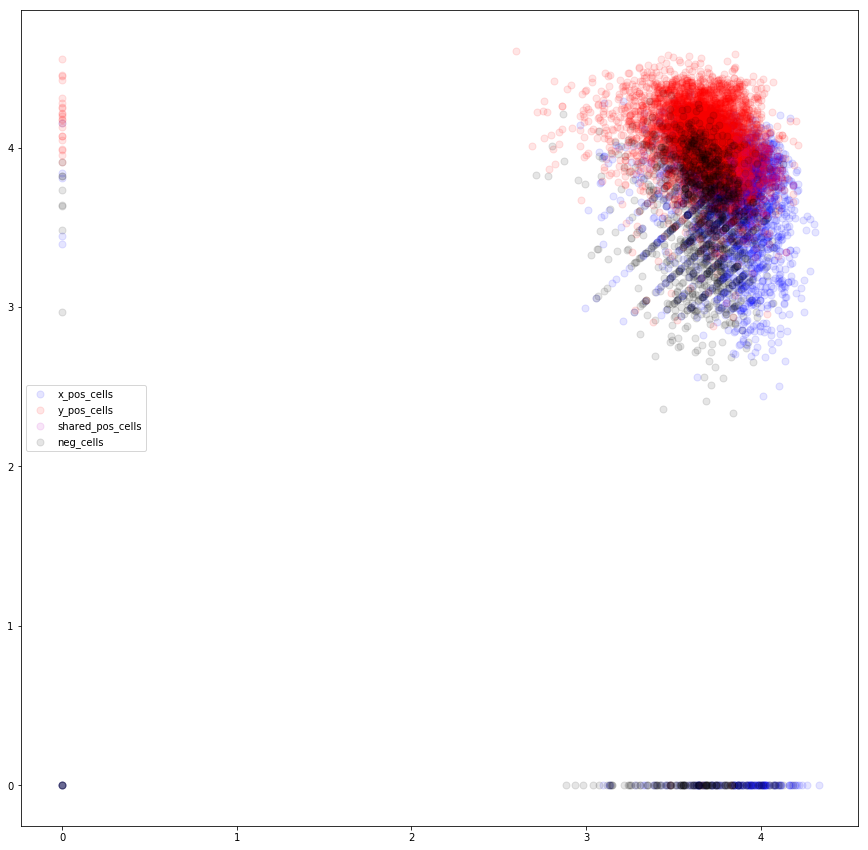

In [366]:
a=100
x_bit = 1
y_bit = 2
x_pos_cells = list(codebook_df[codebook_df[x_bit]==1].index)
y_pos_cells = list(codebook_df[codebook_df[y_bit]==1].index)
shared_pos_cells = [i for i in x_pos_cells if i in y_pos_cells]
neg_cells = []
for i in codebook_df.index:
    if not i in x_pos_cells:
        if not i in y_pos_cells:
            neg_cells.append(i)
x_genes = random.sample([i for i in gene_dict[x_bit] if i in MeA_Neurons_DGE_cluster_data_SizeNorm.index],50)
y_genes = random.sample([i for i in gene_dict[y_bit] if i in MeA_Neurons_DGE_cluster_data_SizeNorm.index],50)
# x_genes = random.sample(list(MeA_Neurons_DGE_cluster_data_SizeNorm.index),5)
# y_genes = random.sample(list(MeA_Neurons_DGE_cluster_data_SizeNorm.index),5)
# pos_cells = x_pos_cells
# neg_cells = [i for i in Gene_Matrix_Avg.columns if not i in pos_cells]
# signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
# signal_df['pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
# signal_df['neg'] = np.average(Gene_Matrix_Avg[neg_cells],axis=1)
# signal_df['pos_std'] = np.max(Gene_Matrix_std[pos_cells],axis=1)
# signal_df['neg_std'] = np.max(Gene_Matrix_std[neg_cells],axis=1)
# signal_df['fold'] = signal_df['pos']/signal_df['neg']
# signal_df = signal_df[signal_df.fold!=np.inf]
# signal_df['difference'] = signal_df['pos']-signal_df['neg']
# signal_df['value'] = signal_df['difference']/(signal_df['pos_std']+signal_df['neg_std'])
# signal_df = signal_df.sort_values(by='fold',ascending=False)
# x_genes = list(signal_df.index[:50])
# pos_cells = y_pos_cells
# neg_cells = [i for i in Gene_Matrix_Avg.columns if not i in pos_cells]
# signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
# signal_df['pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
# signal_df['neg'] = np.average(Gene_Matrix_Avg[neg_cells],axis=1)
# signal_df['pos_std'] = np.max(Gene_Matrix_std[pos_cells],axis=1)
# signal_df['neg_std'] = np.max(Gene_Matrix_std[neg_cells],axis=1)
# signal_df['fold'] = signal_df['pos']/signal_df['neg']
# signal_df = signal_df[signal_df.fold!=np.inf]
# signal_df['difference'] = signal_df['pos']-signal_df['neg']
# signal_df['value'] = signal_df['difference']/(signal_df['pos_std']+signal_df['neg_std'])
# signal_df = signal_df.sort_values(by='fold',ascending=False)
# y_genes = list(signal_df.index[:50])
plt.figure(figsize=[15,15])
size=50
alpha=0.1
s=1
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(x_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='x_pos_cells',c='b',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(y_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='y_pos_cells',c='r',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(shared_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='shared_pos_cells',c='m',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(neg_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data_SizeNorm[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='neg_cells',c='k',alpha=alpha,s=size)
# for i, txt in enumerate(Readout_df.index):
#     plt.annotate(txt, (x[i]+a, y[i]+a))
# plt.xlim([1.5,5])
# plt.ylim([1.5,5])
plt.legend()
plt.show()

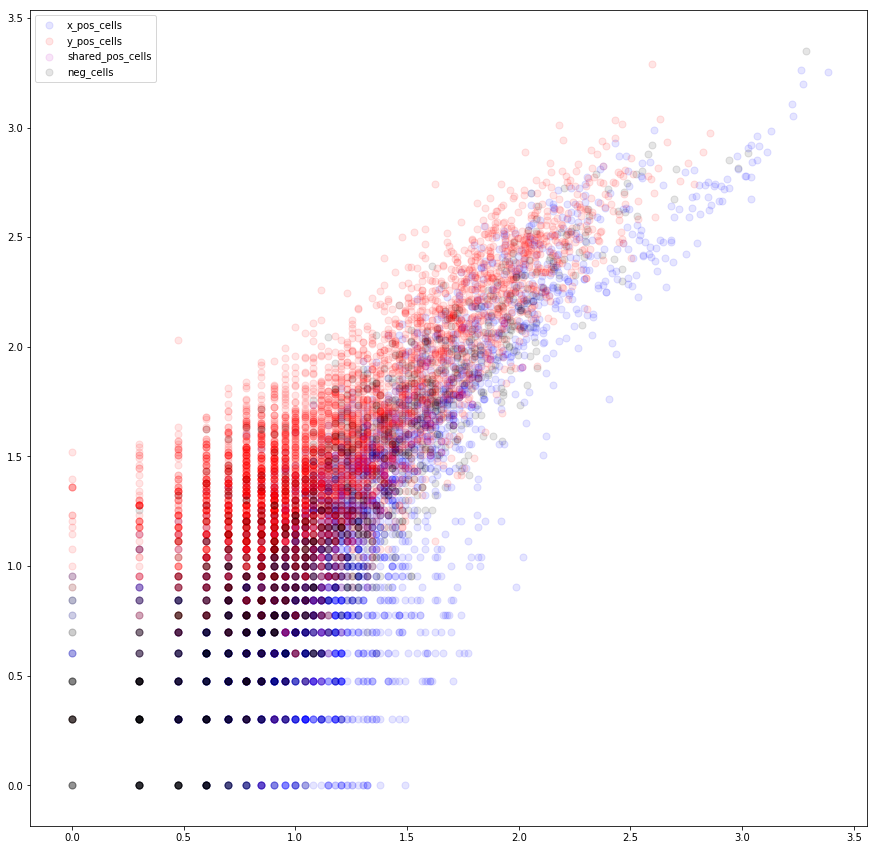

In [374]:
a=100
x_bit = 1
y_bit = 2
x_pos_cells = list(codebook_df[codebook_df[x_bit]==1].index)
y_pos_cells = list(codebook_df[codebook_df[y_bit]==1].index)
shared_pos_cells = [i for i in x_pos_cells if i in y_pos_cells]
neg_cells = []
for i in codebook_df.index:
    if not i in x_pos_cells:
        if not i in y_pos_cells:
            neg_cells.append(i)
x_genes = random.sample([i for i in gene_dict[x_bit] if i in MeA_Neurons_DGE_cluster_data.index],50)
y_genes = random.sample([i for i in gene_dict[y_bit] if i in MeA_Neurons_DGE_cluster_data.index],50)
# x_genes = random.sample(list(MeA_Neurons_DGE_cluster_data.index),5)
# y_genes = random.sample(list(MeA_Neurons_DGE_cluster_data.index),5)
# pos_cells = x_pos_cells

# neg_cells = [i for i in Gene_Matrix_Avg.columns if not i in pos_cells]
# signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
# signal_df['pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
# signal_df['neg'] = np.average(Gene_Matrix_Avg[neg_cells],axis=1)
# signal_df['pos_std'] = np.max(Gene_Matrix_std[pos_cells],axis=1)
# signal_df['neg_std'] = np.max(Gene_Matrix_std[neg_cells],axis=1)
# signal_df['fold'] = signal_df['pos']/signal_df['neg']
# signal_df = signal_df[signal_df.fold!=np.inf]
# signal_df['difference'] = signal_df['pos']-signal_df['neg']
# signal_df['value'] = signal_df['difference']/(signal_df['pos_std']+signal_df['neg_std'])
# signal_df = signal_df.sort_values(by='fold',ascending=False)
# x_genes = list(signal_df.index[:50])
# pos_cells = y_pos_cells
# neg_cells = [i for i in Gene_Matrix_Avg.columns if not i in pos_cells]
# signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
# signal_df['pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
# signal_df['neg'] = np.average(Gene_Matrix_Avg[neg_cells],axis=1)
# signal_df['pos_std'] = np.max(Gene_Matrix_std[pos_cells],axis=1)
# signal_df['neg_std'] = np.max(Gene_Matrix_std[neg_cells],axis=1)
# signal_df['fold'] = signal_df['pos']/signal_df['neg']
# signal_df = signal_df[signal_df.fold!=np.inf]
# signal_df['difference'] = signal_df['pos']-signal_df['neg']
# signal_df['value'] = signal_df['difference']/(signal_df['pos_std']+signal_df['neg_std'])
# signal_df = signal_df.sort_values(by='fold',ascending=False)
# y_genes = list(signal_df.index[:50])
plt.figure(figsize=[15,15])
size=50
alpha=0.1
s=1
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(x_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='x_pos_cells',c='b',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(y_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='y_pos_cells',c='r',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(shared_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='shared_pos_cells',c='m',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(neg_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='neg_cells',c='k',alpha=alpha,s=size)
# for i, txt in enumerate(Readout_df.index):
#     plt.annotate(txt, (x[i]+a, y[i]+a))
# plt.xlim([1.5,5])
# plt.ylim([1.5,5])
plt.legend()
plt.show()

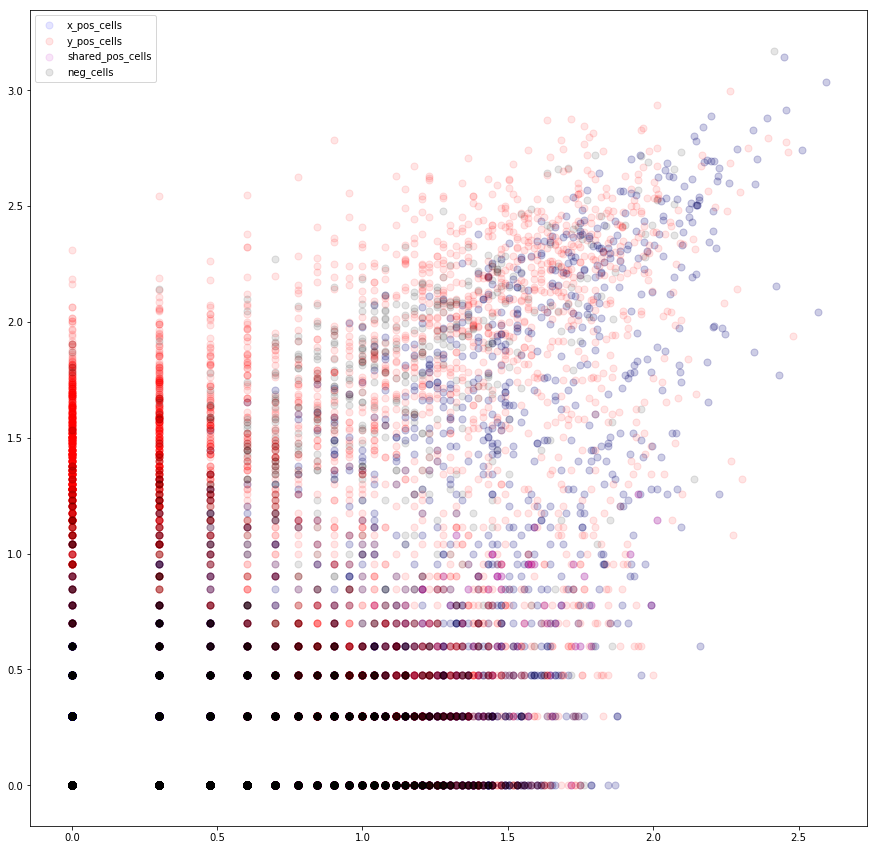

In [383]:
a=100
x_bit = 1
y_bit = 2
x_pos_cells = list(codebook_df[codebook_df[x_bit]==1].index)
y_pos_cells = list(codebook_df[codebook_df[y_bit]==1].index)
shared_pos_cells = [i for i in x_pos_cells if i in y_pos_cells]
neg_cells = []
for i in codebook_df.index:
    if not i in x_pos_cells:
        if not i in y_pos_cells:
            neg_cells.append(i)
x_genes = random.sample([i for i in gene_dict[x_bit] if i in MeA_Neurons_DGE_cluster_data.index],50)
y_genes = random.sample([i for i in gene_dict[y_bit] if i in MeA_Neurons_DGE_cluster_data.index],50)
# x_genes = random.sample(list(MeA_Neurons_DGE_cluster_data.index),5)
# y_genes = random.sample(list(MeA_Neurons_DGE_cluster_data.index),5)
# pos_cells = x_pos_cells
Gene_Matrix_Avg = pickle.load(open(os.path.join(base_path,'Gene_Matrix_Avg_Neuron.pkl'),'rb'))
Gene_Matrix_std = pickle.load(open(os.path.join(base_path,'Gene_Matrix_std_Neuron.pkl'),'rb'))
Gene_Matrix_Avg.columns = ['cell_'+str(i) for i in Gene_Matrix_Avg.columns]
Gene_Matrix_std.columns = ['cell_'+str(i) for i in Gene_Matrix_std.columns]
pos_cells = x_pos_cells
neg_cells = [i for i in Gene_Matrix_Avg.columns if not i in pos_cells]
signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
signal_df['pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
signal_df['neg'] = np.average(Gene_Matrix_Avg[neg_cells],axis=1)
signal_df['pos_std'] = np.max(Gene_Matrix_std[pos_cells],axis=1)
signal_df['neg_std'] = np.max(Gene_Matrix_std[neg_cells],axis=1)
signal_df['fold'] = signal_df['pos']/signal_df['neg']
signal_df = signal_df[signal_df.fold!=np.inf]
signal_df['difference'] = signal_df['pos']-signal_df['neg']
signal_df['value'] = signal_df['difference']/(signal_df['pos_std']+signal_df['neg_std'])
signal_df = signal_df.sort_values(by='value',ascending=False)
x_genes = list(signal_df.index[:10])
pos_cells = y_pos_cells
neg_cells = [i for i in Gene_Matrix_Avg.columns if not i in pos_cells]
signal_df = pd.DataFrame(index=Gene_Matrix_Avg.index)
signal_df['pos'] = np.max(Gene_Matrix_Avg[pos_cells],axis=1)
signal_df['neg'] = np.average(Gene_Matrix_Avg[neg_cells],axis=1)
signal_df['pos_std'] = np.max(Gene_Matrix_std[pos_cells],axis=1)
signal_df['neg_std'] = np.max(Gene_Matrix_std[neg_cells],axis=1)
signal_df['fold'] = signal_df['pos']/signal_df['neg']
signal_df = signal_df[signal_df.fold!=np.inf]
signal_df['difference'] = signal_df['pos']-signal_df['neg']
signal_df['value'] = signal_df['difference']/(signal_df['pos_std']+signal_df['neg_std'])
signal_df = signal_df.sort_values(by='value',ascending=False)
y_genes = list(signal_df.index[:10])
plt.figure(figsize=[15,15])
size=50
alpha=0.1
s=1
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(x_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='x_pos_cells',c='b',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(y_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='y_pos_cells',c='r',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(shared_pos_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='shared_pos_cells',c='m',alpha=alpha,s=size)
cells = list(info_df_Neuron[info_df_Neuron.cell_types.isin(neg_cells)].index)
if isinstance(x_genes,str):
    x = MeA_Neurons_DGE_cluster_data[cells].loc[x_genes]
else:
    x = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[x_genes],axis=0)
if isinstance(y_genes,str):
    y = MeA_Neurons_DGE_cluster_data[cells].loc[y_genes]
else:
    y = np.sum(MeA_Neurons_DGE_cluster_data[cells].loc[y_genes],axis=0)
plt.scatter(np.log10(x+s),np.log10(y+s),label='neg_cells',c='k',alpha=alpha,s=size)
# for i, txt in enumerate(Readout_df.index):
#     plt.annotate(txt, (x[i]+a, y[i]+a))
# plt.xlim([1.5,5])
# plt.ylim([1.5,5])
plt.legend()
plt.show()

In [382]:
shared_pos_cells

['cell_16']

In [368]:
x_pos_cells

['cell_10', 'cell_16', 'cell_2']

In [369]:
y_pos_cells

['cell_1',
 'cell_13',
 'cell_15',
 'cell_16',
 'cell_4',
 'cell_5',
 'cell_6',
 'cell_8']

In [311]:
x

[7.148984844152131,
 24.70355731225296,
 0.0,
 61.46281499692685,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.900025900025902,
 0.0,
 203.94289598912306,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 147.27540500736376,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 495.0495049504951,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2040.816326530612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 653.5947712418301,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [309]:
x_genes

'Lmln'

In [303]:
x

66651.93143899913

In [203]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_SizeNorm_2/'

13.668060302734375

In [ ]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
base = os.path.join(base_path,'Neuron_Results_SizeNorm_1')
for I in range(20):
    try:
        elite_survivor = pickle.load(open(os.path.join(base,'elite_survivor_'+str(I)+'.pkl'),'rb'))
        survivors = pickle.load(open(os.path.join(base,'survivors_'+str(I)+'.pkl'),'rb'))
        readouts = pickle.load(open(os.path.join(base,'readouts_'+str(I)+'.pkl'),'rb'))
        readout_stds = pickle.load(open(os.path.join(base,'readout_stds_'+str(I)+'.pkl'),'rb'))
        print(I)
        Readout_df = readouts[0].drop(index='blank').copy()
        codebook_df = survivors[0].drop(index='blank').copy()
        norm_Readout_df = Readout_df-np.min(Readout_df,axis=0)
        norm_Readout_df = norm_Readout_df/np.max(norm_Readout_df,axis=0)
        fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
        ax2,ax3,ax4 = axes
    #     im1 = sns.heatmap(np.log10(Readout_df),cmap='inferno',ax=ax1,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True)
        im2 = sns.heatmap(norm_Readout_df,cmap='inferno',ax=ax2,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=True,vmin=0,vmax=1)
        im3 = sns.heatmap(Readout_df,cmap='inferno',ax=ax4,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False,vmin=0,vmax=50)
        im4 = sns.heatmap(codebook_df,cmap='inferno',ax=ax3,cbar_kws = dict(use_gridspec=False,location="top"),yticklabels=False,vmin=0,vmax=1)
        plt.show()
    except:
        break

In [88]:
Readout_df[0]

cell_1     183.293350
cell_10     86.303733
cell_11    339.392045
cell_12    146.651163
cell_13     42.620833
cell_14    103.456410
cell_15     28.078947
cell_16     98.481481
cell_2     164.535939
cell_3      13.502882
cell_4     178.685185
cell_5     264.465812
cell_6     179.274914
cell_7     127.378723
cell_8     177.433673
cell_9     126.602273
Name: 0, dtype: float64

In [195]:
metrics = list(Readout_df[0])[0:16]
sample = random.sample(metrics,len(metrics))
sample.append(10000)
sort = np.sort(sample)
value = -1
Y = [(i+1)**(value) for i in range(len(sort))]
Y = [i/np.sum(Y) for i in Y]
print('weights')
print([str(round(100*i,2))+'%' for i in Y])
print('value('+str(value)+')',round(np.sum(sort*Y),2))
print('min(inf)',round(np.min(sort),2))
print('average(0)',round(np.average(sort),2))
print('max(-inf)',round(np.max(sort),2))

weights
['29.07%', '14.54%', '9.69%', '7.27%', '5.81%', '4.85%', '4.15%', '3.63%', '3.23%', '2.91%', '2.64%', '2.42%', '2.24%', '2.08%', '1.94%', '1.82%', '1.71%']
value(-1) 3516.24
min(inf) 2722.68
average(0) 4453.38
max(-inf) 10000.0


In [220]:
value = -3#-(1/10)
Y = [(i+1)**(value) for i in range(5)]
Y = [i/np.sum(Y) for i in Y]
print('weights')
print([str(round(100*i,2))+'%' for i in Y])

weights
['84.34%', '10.54%', '3.12%', '1.32%', '0.67%']


In [196]:
Readout_df

0             1             2             3             4  \
cell_1   3827.412030   8450.167182   6635.236279   5990.015014   7171.456044   
cell_10  3689.170493   5044.790018   6388.828490   4330.939420   9432.100677   
cell_11  4368.727482   7782.448211   9093.544057   5512.693808   4529.364928   
cell_12  3962.771287   5198.410138   7662.655275   6969.017060   6950.666639   
cell_13  3032.901719   4004.019184  19702.695493   5929.111851   5853.462867   
cell_14  3214.269470   7594.712812   8371.208032   4376.019759   9494.714886   
cell_15  4524.185388   7881.320490  15846.652772   4029.174668   4653.932774   
cell_16  4305.362286  11340.598518   8455.100722   5242.338622   7629.958680   
cell_2   3260.614790   9106.451301   6732.326612   5396.897570   6559.621582   
cell_3   9306.880292   4554.193043   5663.606986  13787.297414  15869.883725   
cell_4   4054.157058  10157.685592   7268.731754   5137.135403   4421.933854   
cell_5   3673.790542   5266.612341  14709.904416   9027.605372   4834.444569   
cell_6   3270.988346   7989.091994   5912.442340  10656.707025  13285.250703   
cell_7   2722.679165   7625.996960   6582.309590   9105.322999   9389.019480   
cell_8   4478.420893   5437.170378   8931.726836   6146.612207   5619.141122   
cell_9   4015.179642   7336.748338   7204.999441   8042.444551   4668.994918   

                   5  
cell_1   6674.927217  
cell_10  6375.204559  
cell_11  6938.427427  
cell_12  6834.374255  
cell_13  2490.775529  
cell_14  5859.834887  
cell_15  2302.468160  
cell_16  5408.989706  
cell_2   6827.170878  
cell_3   3844.078869  
cell_4   6750.101321  
cell_5   4567.587571  
cell_6   5498.722603  
cell_7   8655.233660  
cell_8   7511.037128  
cell_9   4818.552172

In [199]:
Readout_df.sort_values(0,ascending=False)

0             1             2             3             4  \
cell_3   9306.880292   4554.193043   5663.606986  13787.297414  15869.883725   
cell_15  4524.185388   7881.320490  15846.652772   4029.174668   4653.932774   
cell_8   4478.420893   5437.170378   8931.726836   6146.612207   5619.141122   
cell_11  4368.727482   7782.448211   9093.544057   5512.693808   4529.364928   
cell_16  4305.362286  11340.598518   8455.100722   5242.338622   7629.958680   
cell_4   4054.157058  10157.685592   7268.731754   5137.135403   4421.933854   
cell_9   4015.179642   7336.748338   7204.999441   8042.444551   4668.994918   
cell_12  3962.771287   5198.410138   7662.655275   6969.017060   6950.666639   
cell_1   3827.412030   8450.167182   6635.236279   5990.015014   7171.456044   
cell_10  3689.170493   5044.790018   6388.828490   4330.939420   9432.100677   
cell_5   3673.790542   5266.612341  14709.904416   9027.605372   4834.444569   
cell_6   3270.988346   7989.091994   5912.442340  10656.707025  13285.250703   
cell_2   3260.614790   9106.451301   6732.326612   5396.897570   6559.621582   
cell_14  3214.269470   7594.712812   8371.208032   4376.019759   9494.714886   
cell_13  3032.901719   4004.019184  19702.695493   5929.111851   5853.462867   
cell_7   2722.679165   7625.996960   6582.309590   9105.322999   9389.019480   

                   5  
cell_3   3844.078869  
cell_15  2302.468160  
cell_8   7511.037128  
cell_11  6938.427427  
cell_16  5408.989706  
cell_4   6750.101321  
cell_9   4818.552172  
cell_12  6834.374255  
cell_1   6674.927217  
cell_10  6375.204559  
cell_5   4567.587571  
cell_6   5498.722603  
cell_2   6827.170878  
cell_14  5859.834887  
cell_13  2490.775529  
cell_7   8655.233660

In [142]:
sort

array([ 13.50288184,  28.07894737,  42.62083333,  86.30373303,
        98.48148148, 103.45641026, 146.65116279, 164.53593947,
       183.29335017, 339.39204545])

In [124]:
np.sum(Y)

1648744615941998731279688

In [112]:
len(sort)

16

In [94]:
np.min(metrics)

13.502881844380404

In [95]:
np.average(metrics)

141.25983537755752

In [121]:
np.max(metrics)

339.3920454545455

In [91]:
sort

array([ 13.50288184,  28.07894737,  42.62083333,  86.30373303,
        98.48148148, 103.45641026, 126.60227273, 127.3787234 ,
       146.65116279, 164.53593947, 177.43367347, 178.68518519,
       179.27491409, 183.29335017, 264.46581197, 339.39204545])

In [93]:
np.sum(sort*Y)

78.02086332845062

In [137]:
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/Neuron_Results_1/cell_1_cell_10_cell_11_cell_12_cell_3_cell_4_cell_6_cell_8_/'
pickle.load(open(os.path.join(base_path,'signal.pkl'),'rb'))

cell_1     20.339226
cell_2     10.733291
cell_3     15.936599
cell_4     16.473064
cell_5     12.367521
cell_6     72.759450
cell_7     10.663830
cell_8     21.326531
cell_9     12.761364
cell_10    16.434955
cell_11    22.715909
cell_12    22.302326
cell_13     1.585417
cell_14    12.266667
cell_15     1.789474
cell_16     4.716049
blank       0.000000
dtype: float64